# Проект Dota 2: игровая аналитика.

**Описание данных:**
    
Информация об игроках (df_players.csv), postgre: 

- 0 Match_id - Идентификатор матча
- 1 Player_slot - Слот игрока в матче
- 2 Steam_id - Идентификатор аккаунта игрока
- 3 Personaname - Имя игрока
- 4 Assists - Количество ассистов в матче (помощь в убийстве)
- 5 Deaths - Количество смертей в матче
- 6 Denies -  Количество убитых союзных мобов
- 7 Gold_per_min - Количество золота, которое игрок получает за минуту в матче
- 8 Hero_id - Идентификатор героя игрока
- 9 Item_0 - Предмет 1
- 10 Item_1 - Предмет 2
- 11 Item_2 - Предмет 3
- 12 Item_3 - Предмет 4
- 13 Item_4 - Предмет 5
- 14 Item_5 - Предмет 6
- 15 Kills - Количество убийств в матче
- 16 Xp_per_min - Количество опыта за минуту в матче
- 17 isRadiant - Фракция: radiant / dire
- 18 Win - Победа 0 / 1 (да или нет)
- 19 Kills_per_min - Количество убийств за минуту матча
- 20 Last_hits_per_min - Количество последних ударов по мобам за минуту матча (влияет на золото)
- 21 Hero_damage_per_min - Средний урон героя в минуту матча
- 22 Hero_healing_per_min - Среднее лечение героя в минуту матча
- 23 Tower_damage_per_min - Количество урона башен в минуту матча

 
Информация о матчах (df_matches.csv), postgre: matches

- 0 Match_id - Идентификатор матча
- 1 Duration - Длительность матча в секундах
- 2 First_blood_time - Время до первого убийства
- 3 Radiant_win - Какая фракция победила
- 4 Region - Идентификатор региона

 
Информация о героях (df_heroes.csv), postgre: heroes

- 0 Id - Идентификатор героя
- 1 Localized_name - Имя героя
- 2 Attack_type - Тип атаки героя
- 3 Primary_attr - Основной атрибут героя
- 4 Roles - Роли героя
- 5 Base_health - Базовое здоровье
- 6 Base_health_rege - Базовая регенерация здоровья
- 7 Base_mana - Базовая мана
- 8 Base_mana_regen - Базовая регенерация маны
- 9 Base_armor - Базовая броня
- 10 Base_mr - Сопротивляемость магии (magic resist)
- 11 Base_attack_min - Базовая минимальная атака (урон)
- 12 Base_attack_max - Базовая максимальная атака (урон)
- 13 Base_str - Базовая сила
- 14 Base_agi - Базовая ловкость
- 15 Base_int - Базовый интеллект 
- 16 Str_gain - Рост силы с уровнем
- 17 Agi_gain - Рост ловкости с уровнем
- 18 Int_gain - Рост интеллекта с уровнем
- 19 Attack_range - Дистанция атаки
- 20 Projectile_speed - Скорость стрельбы
- 21 Attack_rate - Скорость атаки
- 22 Base_attack_time - Время базовой атаки
- 23 Attack_point - Время до начала атаки героя
- 24 Move_speed - Скорость передвижения
- 25 Turn_rate - Скорость поворота
- 26 Cm_enabled - Капитанский режим (включен/выключен)
- 27 Legs - Количество ног 
- 28 Day_vision - Радиус видимости днем
- 29 Night_vision - Радиус видимости ночью

**Варианты гипотез:**
- есть ли отличия в параметрах игроков у победивших и проигравших команд


**План работы**

1. [Загрузка данных](#view)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ](#analiz)
4. [Проверка гипотез](#statanaliz)
5. [ОБЩИЕ ВЫВОДЫ](#resumefinal)

##  Загрузка данных <a name="view"></a>

In [1]:
!pip install psycopg2 -q

In [72]:
#Загрузим необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math
from scipy import stats as st
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import matplotlib
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.options.display.max_colwidth = 110
%config InlineBackend.figure_format = 'retina' 
matplotlib.style.use('ggplot')
#plt.rc('figure', figsize=(15, 6))
import warnings
warnings.filterwarnings('ignore')

from time import time

try:
    import phik
except:
    !pip install phik -q

    
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sqlalchemy import create_engine
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# устанавливаем параметры
db_config = {'user': 'student', # имя пользователя
            'pwd': 'uvBbBm8gn', # пароль
            'host': '158.160.146.146',
            'port': 5432, # порт подключения
            'db': 'dota_2'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [4]:
def descr (df):
    display(df.head(5))
    print('---------------------------------------------------------------------------------------------------------')
    display(df.info()) 
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество пропусков:  {df.isna().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Описание: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Размер: {df.shape}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Признаки: {df.columns}')

### Загрузим  таблицу players

In [5]:
query_players = '''
           SELECT *
           FROM players
        '''

players = pd.io.sql.read_sql(query_players, con = engine)
descr(players)

index    match_id  player_slot    steam_id personaname  assists  deaths  \
0      0  7723956234            0  1533145710     Snémaât       10       3   
1      1  7723956234            1  1300455837       BeNnS        4       2   
2      2  7723956234            2   288327980      Flint-       10       8   
3      3  7723956234            3  1479402527    shogeyuu        9       3   
4      4  7723956234            4  1479790131      sonlin       12       6   

   denies  gold_per_min  hero_id  ...                 item_5 kills xp_per_min  \
0       7           615      123  ...               Mjollnir     6        696   
1       7           532       86  ...             Phylactery     9        611   
2       2           551       52  ...  Aegis of the Immortal     4        608   
3       8           383       51  ...           Arcane Boots     5        463   
4       3           336       88  ...           Unknown Item     5        417   

  isRadiant win kills_per_min  last_hits_per_min  hero_damage_per_min  \
0      True   1      0.195334           9.050461           585.545307   
1      True   1      0.293001           6.348345           622.333152   
2      True   1      0.130222           7.357569           478.567553   
3      True   1      0.162778           3.516007           313.640803   
4      True   1      0.162778           2.278893           521.345632   

   hero_healing_per_min  tower_damage_per_min  
0              0.000000            304.069452  
1              0.000000             41.280521  
2              0.000000            209.169832  
3              4.069452             45.968530  
4              0.000000             15.496473  

[5 rows x 25 columns]

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18020 entries, 0 to 18019
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 18020 non-null  int64  
 1   match_id              18020 non-null  int64  
 2   player_slot           18020 non-null  int64  
 3   steam_id              18020 non-null  int64  
 4   personaname           17896 non-null  object 
 5   assists               18020 non-null  int64  
 6   deaths                18020 non-null  int64  
 7   denies                18020 non-null  int64  
 8   gold_per_min          18020 non-null  int64  
 9   hero_id               18020 non-null  int64  
 10  item_0                18020 non-null  object 
 11  item_1                18020 non-null  object 
 12  item_2                18020 non-null  object 
 13  item_3         

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  index                     0
match_id                  0
player_slot               0
steam_id                  0
personaname             124
assists                   0
deaths                    0
denies                    0
gold_per_min              0
hero_id                   0
item_0                    0
item_1                    0
item_2                    0
item_3                    0
item_4                    0
item_5                    0
kills                     0
xp_per_min                0
isRadiant                 0
win                       0
kills_per_min             0
last_hits_per_min         0
hero_damage_per_min       0
hero_healing_per_min      0
tower_damage_per_min      0
dtype: int64
---------------------------

index      match_id   player_slot      steam_id       assists  \
count  18020.000000  1.802000e+04  18020.000000  1.802000e+04  18020.000000   
mean    9009.500000  7.700249e+09     66.000000  7.717578e+08     11.995228   
std     5202.070261  1.316649e+07     64.017399  6.078909e+08      7.215363   
min        0.000000  7.678783e+09      0.000000  5.150808e+06      0.000000   
25%     4504.750000  7.688494e+09      2.000000  1.811442e+08      6.000000   
50%     9009.500000  7.700435e+09     66.000000  4.223519e+08     11.000000   
75%    13514.250000  7.711457e+09    130.000000  1.290724e+09     16.000000   
max    18019.000000  7.723956e+09    132.000000  1.722513e+09     48.000000   

             deaths        denies  gold_per_min       hero_id         kills  \
count  18020.000000  18020.000000  18020.000000  18020.000000  18020.000000   
mean       5.990677      5.905216    493.108602     61.572420      5.874972   
std        3.489501      5.895807    167.802659     38.554475      4.513586   
min        0.000000      0.000000    104.000000      1.000000      0.000000   
25%        3.000000      2.000000    357.000000     23.000000      3.000000   
50%        6.000000      4.000000    480.000000     58.000000      5.000000   
75%        8.000000      9.000000    618.000000     94.000000      8.000000   
max       22.000000     54.000000   1151.000000    138.000000     34.000000   

         xp_per_min           win  kills_per_min  last_hits_per_min  \
count  18020.000000  18020.000000   18020.000000       18020.000000   
mean     640.271365      0.500000       0.180732           5.389472   
std      222.925936      0.500014       0.142795           3.571521   
min       62.000000      0.000000       0.000000           0.086957   
25%      476.000000      0.000000       0.076336           1.943426   
50%      615.000000      0.500000       0.146610           5.415878   
75%      784.000000      1.000000       0.250302           8.052153   
max     1782.000000      1.000000       1.344000          22.076821   

       hero_damage_per_min  hero_healing_per_min  tower_damage_per_min  
count         18020.000000          18020.000000          18020.000000  
mean            565.770087             25.553990             72.161158  
std             287.267922             85.460828            117.794596  
min              25.456919              0.000000              0.000000  
25%             355.809536              0.000000              3.251167  
50%             508.879737              0.000000             22.081720  
75%             716.188552              4.215852             81.750038  
max            2397.967033           1427.106095            932.782258

---------------------------------------------------------------------------------------------------------
Размер: (18020, 25)
---------------------------------------------------------------------------------------------------------
Признаки: Index(['index', 'match_id', 'player_slot', 'steam_id', 'personaname',
       'assists', 'deaths', 'denies', 'gold_per_min', 'hero_id', 'item_0',
       'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'kills', 'xp_per_min',
       'isRadiant', 'win', 'kills_per_min', 'last_hits_per_min',
       'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min'],
      dtype='object')


**После загрузки таблицы players получили следующие данные:**
- Размер: (18020, 25)
- Количество дубликатов: 0
- Количество пропусков: personaname - 124

### Загрузим  таблицу matches

In [6]:
query_matches = '''
           SELECT *
           FROM matches
        '''

matches = pd.io.sql.read_sql(query_matches, con = engine)
descr(matches)

index    match_id  duration  first_blood_time  radiant_win region
0      0  7723956234      1843                 0         True      3
1      1  7723925265      1782                74        False      5
2      2  7723923401      2054                71        False      3
3      3  7723905806      2066                40        False      3
4      4  7723895005      1804               169        False      3

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1802 non-null   int64 
 1   match_id          1802 non-null   int64 
 2   duration          1802 non-null   int64 
 3   first_blood_time  1802 non-null   int64 
 4   radiant_win       1802 non-null   bool  
 5   region            1802 non-null   object
dtypes: bool(1), int64(4), object(1)
memory usage: 72.3+ KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  index               0
match_id            0
duration            0
first_blood_time    0
radiant_win         0
region              0
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


index      match_id     duration  first_blood_time
count  1802.00000  1.802000e+03  1802.000000       1802.000000
mean    900.50000  7.700249e+09  2013.289678        125.867370
std     520.33691  1.316978e+07   563.853904        113.444724
min       0.00000  7.678783e+09   439.000000          0.000000
25%     450.25000  7.688496e+09  1637.000000         23.000000
50%     900.50000  7.700435e+09  1892.000000        110.000000
75%    1350.75000  7.711442e+09  2287.000000        188.000000
max    1801.00000  7.723956e+09  4730.000000        703.000000

---------------------------------------------------------------------------------------------------------
Размер: (1802, 6)
---------------------------------------------------------------------------------------------------------
Признаки: Index(['index', 'match_id', 'duration', 'first_blood_time', 'radiant_win',
       'region'],
      dtype='object')


**После загрузки таблицы matches получили следующие данные:**
- Размер: (1802, 6)
- Количество дубликатов: 0
- Количество пропусков: 0

### Загрузим  таблицу heroes

In [7]:
query_heroes = '''
           SELECT *
           FROM heroes
        '''

heroes = pd.io.sql.read_sql(query_heroes, con = engine)
descr(heroes)

index   id localized_name attack_type primary_attr  \
0      0  123       Hoodwink      Ranged          agi   
1      1   86         Rubick      Ranged          int   
2      2   52        Leshrac      Ranged          int   
3      3   51      Clockwerk       Melee          all   
4      4   88   Nyx Assassin       Melee          all   

                                                 roles  base_health  \
0           ['Support', 'Nuker', 'Escape', 'Disabler']          120   
1                     ['Support', 'Disabler', 'Nuker']          120   
2  ['Carry', 'Support', 'Nuker', 'Pusher', 'Disabler']          120   
3        ['Initiator', 'Disabler', 'Durable', 'Nuker']          120   
4         ['Disabler', 'Nuker', 'Initiator', 'Escape']          120   

   base_health_regen  base_mana  base_mana_regen  ...  projectile_speed  \
0               0.25         75              0.0  ...              1800   
1               0.25         75              0.5  ...              1125   
2               0.25         75              0.0  ...               900   
3               0.50         75              0.0  ...               900   
4               2.00         75              0.0  ...               900   

   attack_rate  base_attack_time  attack_point  move_speed  turn_rate  \
0          2.0               100          0.40         310        0.9   
1          1.7               100          0.40         290        0.7   
2          1.7               100          0.40         325        NaN   
3          1.7               100          0.33         310        NaN   
4          1.7               100          0.46         310        NaN   

   cm_enabled  legs  day_vision  night_vision  
0        True     4        1800           800  
1        True     2        1800           800  
2        True     4        1800           800  
3        True     2        1800           800  
4        True     6        1800           800  

[5 rows x 31 columns]

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18020 entries, 0 to 18019
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18020 non-null  int64  
 1   id                 18020 non-null  int64  
 2   localized_name     18020 non-null  object 
 3   attack_type        18020 non-null  object 
 4   primary_attr       18020 non-null  object 
 5   roles              18020 non-null  object 
 6   base_health        18020 non-null  int64  
 7   base_health_regen  18020 non-null  float64
 8   base_mana          18020 non-null  int64  
 9   base_mana_regen    18020 non-null  float64
 10  base_armor         18020 non-null  float64
 11  base_mr            18020 non-null  int64  
 12  base_attack_min    18020 non-null  int64  
 13  base_attack_max    18020 non-null  int64  
 14  base_str    

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  index                    0
id                       0
localized_name           0
attack_type              0
primary_attr             0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_mr                  0
base_attack_min          0
base_attack_max          0
base_str                 0
base_agi                 0
base_int                 0
str_gain                 0
agi_gain                 0
int_gain                 0
attack_range             0
projectile_speed         0
attack_rate              0
base_attack_time         0
attack_point             0
move_speed               0
turn_rate            11375
cm_enabled 

index            id  base_health  base_health_regen  \
count  18020.000000  18020.000000      18020.0       18020.000000   
mean    9009.500000     61.572420        120.0           0.618049   
std     5202.070261     38.554475          0.0           0.733725   
min        0.000000      1.000000        120.0          -0.250000   
25%     4504.750000     23.000000        120.0           0.250000   
50%     9009.500000     58.000000        120.0           0.250000   
75%    13514.250000     94.000000        120.0           0.750000   
max    18019.000000    138.000000        120.0           5.000000   

          base_mana  base_mana_regen    base_armor  base_mr  base_attack_min  \
count  18020.000000     18020.000000  18020.000000  18020.0     18020.000000   
mean      75.524417         0.136029      0.524223     25.0        21.803219   
std        4.829602         0.231943      1.303380      0.0        11.706168   
min       75.000000         0.000000     -3.000000     25.0        -5.000000   
25%       75.000000         0.000000      0.000000     25.0         9.000000   
50%       75.000000         0.000000      0.000000     25.0        26.000000   
75%       75.000000         0.250000      1.000000     25.0        30.000000   
max      120.000000         1.000000      5.000000     25.0        60.000000   

       base_attack_max  ...  attack_range  projectile_speed   attack_rate  \
count     18020.000000  ...  18020.000000      18020.000000  18020.000000   
mean         28.146448  ...    361.667314       1013.564095      1.694967   
std          12.229525  ...    193.585238        488.341320      0.087695   
min          -1.000000  ...    150.000000          0.000000      1.400000   
25%          18.000000  ...    150.000000        900.000000      1.700000   
50%          32.000000  ...    365.000000        900.000000      1.700000   
75%          36.000000  ...    550.000000       1125.000000      1.700000   
max          68.000000  ...    700.000000       3000.000000      2.000000   

       base_attack_time  attack_point    move_speed    turn_rate  \
count      18020.000000  18020.000000  18020.000000  6645.000000   
mean         101.242786      0.396222    300.912597     0.781971   
std            6.818518      0.092056     14.552956     0.094155   
min           90.000000      0.170000    275.000000     0.600000   
25%          100.000000      0.330000    290.000000     0.700000   
50%          100.000000      0.400000    300.000000     0.800000   
75%          100.000000      0.460000    315.000000     0.900000   
max          125.000000      0.650000    330.000000     0.900000   

               legs    day_vision  night_vision  
count  18020.000000  18020.000000  18020.000000  
mean       2.082464   1794.728080    819.156493  
std        1.059668     58.515957    114.372355  
min        0.000000    800.000000    800.000000  
25%        2.000000   1800.000000    800.000000  
50%        2.000000   1800.000000    800.000000  
75%        2.000000   1800.000000    800.000000  
max        8.000000   1800.000000   1800.000000  

[8 rows x 26 columns]

---------------------------------------------------------------------------------------------------------
Размер: (18020, 31)
---------------------------------------------------------------------------------------------------------
Признаки: Index(['index', 'id', 'localized_name', 'attack_type', 'primary_attr', 'roles',
       'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen',
       'base_armor', 'base_mr', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed', 'turn_rate', 'cm_enabled', 'legs',
       'day_vision', 'night_vision'],
      dtype='object')


**После загрузки таблицы heroes получили следующие данные:**
- Размер: (18020, 6)
- Количество дубликатов: 0
- Количество пропусков: turn_rate - 11375

##  Предобработка данных <a name="preprocessing"></a>

###  Предобработка players

In [8]:
players.head()

index    match_id  player_slot    steam_id personaname  assists  deaths  \
0      0  7723956234            0  1533145710     Snémaât       10       3   
1      1  7723956234            1  1300455837       BeNnS        4       2   
2      2  7723956234            2   288327980      Flint-       10       8   
3      3  7723956234            3  1479402527    shogeyuu        9       3   
4      4  7723956234            4  1479790131      sonlin       12       6   

   denies  gold_per_min  hero_id  ...                 item_5 kills xp_per_min  \
0       7           615      123  ...               Mjollnir     6        696   
1       7           532       86  ...             Phylactery     9        611   
2       2           551       52  ...  Aegis of the Immortal     4        608   
3       8           383       51  ...           Arcane Boots     5        463   
4       3           336       88  ...           Unknown Item     5        417   

  isRadiant win kills_per_min  last_hits_per_min  hero_damage_per_min  \
0      True   1      0.195334           9.050461           585.545307   
1      True   1      0.293001           6.348345           622.333152   
2      True   1      0.130222           7.357569           478.567553   
3      True   1      0.162778           3.516007           313.640803   
4      True   1      0.162778           2.278893           521.345632   

   hero_healing_per_min  tower_damage_per_min  
0              0.000000            304.069452  
1              0.000000             41.280521  
2              0.000000            209.169832  
3              4.069452             45.968530  
4              0.000000             15.496473  

[5 rows x 25 columns]

In [9]:
pd.DataFrame(round(players.isna().mean()*100,1)).style.background_gradient('coolwarm')

В  personaname - 124 пропуска, в процентном выражением всего 0,7 удалим их

In [10]:
players = players.dropna(subset = ['personaname'])
players['personaname'].isna().sum()

0

In [11]:
players.columns = [c.lower().replace(' ','_') for c in players.columns]

In [12]:
players.rename(columns = {'personaname':'persona_name'}, inplace=True)
players.rename(columns = {'isradiant':'is_radiant'}, inplace=True)
players.columns

Index(['index', 'match_id', 'player_slot', 'steam_id', 'persona_name',
       'assists', 'deaths', 'denies', 'gold_per_min', 'hero_id', 'item_0',
       'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'kills', 'xp_per_min',
       'is_radiant', 'win', 'kills_per_min', 'last_hits_per_min',
       'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min'],
      dtype='object')

###  Предобработка matches

In [13]:
matches.head()

index    match_id  duration  first_blood_time  radiant_win region
0      0  7723956234      1843                 0         True      3
1      1  7723925265      1782                74        False      5
2      2  7723923401      2054                71        False      3
3      3  7723905806      2066                40        False      3
4      4  7723895005      1804               169        False      3

In [14]:
pd.DataFrame(round(matches.isna().mean()*100,1)).style.background_gradient('coolwarm')

In [15]:
matches['region'].unique()

array(['3', '5', '8', '17', '13', '38', '2', 'unknown', '15'],
      dtype=object)

In [16]:
matches.query('region=="unknown"')

index    match_id  duration  first_blood_time  radiant_win   region
506     506  7710754545      3885               128         True  unknown
516     516  7710407901      3188                70         True  unknown
519     519  7710290849      1608                51        False  unknown
613     613  7706408676      2579               263        False  unknown
752     752  7703270583      2915                 3         True  unknown
767     767  7702992543      3062                32         True  unknown
846     846  7701648008      2065                 0         True  unknown
849     849  7701598136       553                 0         True  unknown
933     933  7699982747      1946               105         True  unknown
1079   1079  7695720177      2102                97         True  unknown
1195   1195  7692002811      1747                 0        False  unknown
1200   1200  7691887822      2304                16         True  unknown
1252   1252  7690914192      3700                 0        False  unknown
1260   1260  7690770084      2403               204        False  unknown
1263   1263  7690723800      1058                57         True  unknown
1394   1394  7688014871      1506                82         True  unknown
1402   1402  7687774565      3200                58         True  unknown
1404   1404  7687678198      2228                 0         True  unknown
1464   1464  7686395200      3908               319         True  unknown
1466   1466  7686324334      1631                89        False  unknown
1471   1471  7686237791      1307                26         True  unknown
1585   1585  7682860792      1138               195         True  unknown
1587   1587  7682759622      2018                23        False  unknown
1655   1655  7681449074      1827               118        False  unknown
1657   1657  7681279327      2014                13         True  unknown
1722   1722  7680136245      2375                 6         True  unknown
1724   1724  7680067534      2750                 4        False  unknown

###  Предобработка  heroes

In [17]:
heroes.head()

index   id localized_name attack_type primary_attr  \
0      0  123       Hoodwink      Ranged          agi   
1      1   86         Rubick      Ranged          int   
2      2   52        Leshrac      Ranged          int   
3      3   51      Clockwerk       Melee          all   
4      4   88   Nyx Assassin       Melee          all   

                                                 roles  base_health  \
0           ['Support', 'Nuker', 'Escape', 'Disabler']          120   
1                     ['Support', 'Disabler', 'Nuker']          120   
2  ['Carry', 'Support', 'Nuker', 'Pusher', 'Disabler']          120   
3        ['Initiator', 'Disabler', 'Durable', 'Nuker']          120   
4         ['Disabler', 'Nuker', 'Initiator', 'Escape']          120   

   base_health_regen  base_mana  base_mana_regen  ...  projectile_speed  \
0               0.25         75              0.0  ...              1800   
1               0.25         75              0.5  ...              1125   
2               0.25         75              0.0  ...               900   
3               0.50         75              0.0  ...               900   
4               2.00         75              0.0  ...               900   

   attack_rate  base_attack_time  attack_point  move_speed  turn_rate  \
0          2.0               100          0.40         310        0.9   
1          1.7               100          0.40         290        0.7   
2          1.7               100          0.40         325        NaN   
3          1.7               100          0.33         310        NaN   
4          1.7               100          0.46         310        NaN   

   cm_enabled  legs  day_vision  night_vision  
0        True     4        1800           800  
1        True     2        1800           800  
2        True     4        1800           800  
3        True     2        1800           800  
4        True     6        1800           800  

[5 rows x 31 columns]

In [18]:
pd.DataFrame(round(heroes.isna().mean()*100,1)).style.background_gradient('coolwarm')

In [19]:
heroes['localized_name'].unique()

array(['Hoodwink', 'Rubick', 'Leshrac', 'Clockwerk', 'Nyx Assassin',
       'Earth Spirit', 'Mars', 'Ancient Apparition', 'Shadow Demon',
       'Lifestealer', 'Void Spirit', 'Morphling', 'Mirana',
       'Vengeful Spirit', 'Timbersaw', 'Ursa', 'Dark Seer', 'Pangolier',
       'Disruptor', 'Tiny', 'Windranger', 'Lina', 'Doom', 'Undying',
       'Centaur Warrunner', 'Monkey King', 'Broodmother', 'Pudge',
       'Ogre Magi', 'Slark', 'Venomancer', 'Primal Beast', 'Brewmaster',
       'Ember Spirit', 'Meepo', 'Dazzle', 'Dragon Knight', 'Chen',
       'Razor', 'Puck', 'Gyrocopter', 'Enchantress', 'Visage', 'Riki',
       'Luna', 'Troll Warlord', 'Batrider', 'Warlock', 'Huskar',
       'Shadow Shaman', 'Lone Druid', 'Storm Spirit', 'Dark Willow',
       'Sven', 'Crystal Maiden', 'Zeus', 'Magnus', 'Earthshaker',
       'Snapfire', 'Marci', 'Lycan', 'Jakiro', "Nature's Prophet",
       'Drow Ranger', 'Tidehunter', 'Faceless Void', 'Witch Doctor',
       'Spectre', 'Queen of Pain', 'Bounty Hun

In [20]:
heroes['base_health'].unique()

array([120], dtype=int64)

In [21]:
heroes['base_mana'].unique()

array([ 75, 120], dtype=int64)

In [22]:
heroes['attack_type'].unique()

array(['Ranged', 'Melee'], dtype=object)

In [23]:
heroes['primary_attr'].unique()

array(['agi', 'int', 'all', 'str'], dtype=object)

In [24]:
heroes['roles'].unique()

array(["['Support', 'Nuker', 'Escape', 'Disabler']",
       "['Support', 'Disabler', 'Nuker']",
       "['Carry', 'Support', 'Nuker', 'Pusher', 'Disabler']",
       "['Initiator', 'Disabler', 'Durable', 'Nuker']",
       "['Disabler', 'Nuker', 'Initiator', 'Escape']",
       "['Nuker', 'Escape', 'Disabler', 'Initiator', 'Durable']",
       "['Carry', 'Initiator', 'Disabler', 'Durable']",
       "['Support', 'Disabler', 'Initiator', 'Nuker']",
       "['Carry', 'Durable', 'Escape', 'Disabler']",
       "['Carry', 'Escape', 'Nuker', 'Disabler']",
       "['Carry', 'Escape', 'Durable', 'Nuker', 'Disabler']",
       "['Carry', 'Support', 'Escape', 'Nuker', 'Disabler']",
       "['Support', 'Initiator', 'Disabler', 'Nuker', 'Escape']",
       "['Nuker', 'Durable', 'Escape']",
       "['Carry', 'Durable', 'Disabler']",
       "['Initiator', 'Escape', 'Disabler']",
       "['Carry', 'Nuker', 'Disabler', 'Durable', 'Escape', 'Initiator']",
       "['Support', 'Disabler', 'Nuker', 'Initiator']"

In [25]:
heroes['cm_enabled'].unique()

array([ True])

In [26]:
heroes['legs'].unique()

array([4, 2, 6, 0, 8], dtype=int64)

In [27]:
heroes['day_vision'].unique()

array([1800, 1600,  800], dtype=int64)

In [28]:
heroes['night_vision'].unique()

array([ 800, 1800, 1000, 1200, 1400], dtype=int64)

In [29]:
heroes.drop('turn_rate', axis= 1 , inplace= True )
heroes.columns

Index(['index', 'id', 'localized_name', 'attack_type', 'primary_attr', 'roles',
       'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen',
       'base_armor', 'base_mr', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed', 'cm_enabled', 'legs', 'day_vision',
       'night_vision'],
      dtype='object')

**Выводы**

Провели предобработку во всех 3 таблицах. Данные были предоставлены в хорошем качестве. Удалили пропуски в  personaname из таблицы  players а также привели название столбцов к PEP8

##  Исследовательский анализ <a name="analiz"></a>

###  Исследовательский анализ players/matches

In [30]:
df =players.merge(matches, on='match_id', how='left')
df.head()

index_x    match_id  player_slot    steam_id persona_name  assists  deaths  \
0        0  7723956234            0  1533145710      Snémaât       10       3   
1        1  7723956234            1  1300455837        BeNnS        4       2   
2        2  7723956234            2   288327980       Flint-       10       8   
3        3  7723956234            3  1479402527     shogeyuu        9       3   
4        4  7723956234            4  1479790131       sonlin       12       6   

   denies  gold_per_min  hero_id  ... kills_per_min last_hits_per_min  \
0       7           615      123  ...      0.195334          9.050461   
1       7           532       86  ...      0.293001          6.348345   
2       2           551       52  ...      0.130222          7.357569   
3       8           383       51  ...      0.162778          3.516007   
4       3           336       88  ...      0.162778          2.278893   

  hero_damage_per_min hero_healing_per_min tower_damage_per_min index_y  \
0          585.545307             0.000000           304.069452       0   
1          622.333152             0.000000            41.280521       0   
2          478.567553             0.000000           209.169832       0   
3          313.640803             4.069452            45.968530       0   
4          521.345632             0.000000            15.496473       0   

   duration  first_blood_time  radiant_win  region  
0      1843                 0         True       3  
1      1843                 0         True       3  
2      1843                 0         True       3  
3      1843                 0         True       3  
4      1843                 0         True       3  

[5 rows x 30 columns]

In [31]:
df['radiant_win'] = df['radiant_win'].astype('int64')
df = df.rename(columns={'index_x':'index'})
df = df.drop(['index_y'], axis=1)

In [32]:
descr(df)

index    match_id  player_slot    steam_id persona_name  assists  deaths  \
0      0  7723956234            0  1533145710      Snémaât       10       3   
1      1  7723956234            1  1300455837        BeNnS        4       2   
2      2  7723956234            2   288327980       Flint-       10       8   
3      3  7723956234            3  1479402527     shogeyuu        9       3   
4      4  7723956234            4  1479790131       sonlin       12       6   

   denies  gold_per_min  hero_id  ... win kills_per_min last_hits_per_min  \
0       7           615      123  ...   1      0.195334          9.050461   
1       7           532       86  ...   1      0.293001          6.348345   
2       2           551       52  ...   1      0.130222          7.357569   
3       8           383       51  ...   1      0.162778          3.516007   
4       3           336       88  ...   1      0.162778          2.278893   

  hero_damage_per_min hero_healing_per_min tower_damage_per_min  duration  \
0          585.545307             0.000000           304.069452      1843   
1          622.333152             0.000000            41.280521      1843   
2          478.567553             0.000000           209.169832      1843   
3          313.640803             4.069452            45.968530      1843   
4          521.345632             0.000000            15.496473      1843   

   first_blood_time  radiant_win  region  
0                 0            1       3  
1                 0            1       3  
2                 0            1       3  
3                 0            1       3  
4                 0            1       3  

[5 rows x 29 columns]

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17896 entries, 0 to 17895
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 17896 non-null  int64  
 1   match_id              17896 non-null  int64  
 2   player_slot           17896 non-null  int64  
 3   steam_id              17896 non-null  int64  
 4   persona_name          17896 non-null  object 
 5   assists               17896 non-null  int64  
 6   deaths                17896 non-null  int64  
 7   denies                17896 non-null  int64  
 8   gold_per_min          17896 non-null  int64  
 9   hero_id               17896 non-null  int64  
 10  item_0                17896 non-null  object 
 11  item_1                17896 non-null  object 
 12  item_2                17896 non-null  object 
 13  item_3         

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  index                   0
match_id                0
player_slot             0
steam_id                0
persona_name            0
assists                 0
deaths                  0
denies                  0
gold_per_min            0
hero_id                 0
item_0                  0
item_1                  0
item_2                  0
item_3                  0
item_4                  0
item_5                  0
kills                   0
xp_per_min              0
is_radiant              0
win                     0
kills_per_min           0
last_hits_per_min       0
hero_damage_per_min     0
hero_healing_per_min    0
tower_damage_per_min    0
duration                0
first_blood_time        0
radiant_win             0
region      

index      match_id   player_slot      steam_id       assists  \
count  17896.000000  1.789600e+04  17896.000000  1.789600e+04  17896.000000   
mean    9021.970161  7.700215e+09     65.970049  7.662812e+08     11.969155   
std     5193.201507  1.314073e+07     64.017758  6.057435e+08      7.190642   
min        0.000000  7.678783e+09      0.000000  5.150808e+06      0.000000   
25%     4533.750000  7.688494e+09      2.000000  1.799862e+08      6.000000   
50%     9019.500000  7.700425e+09      4.000000  4.189428e+08     11.000000   
75%    13514.250000  7.711358e+09    130.000000  1.260529e+09     16.000000   
max    18019.000000  7.723956e+09    132.000000  1.718659e+09     48.000000   

             deaths        denies  gold_per_min       hero_id         kills  \
count  17896.000000  17896.000000  17896.000000  17896.000000  17896.000000   
mean       5.973961      5.919256    493.778889     61.569289      5.878185   
std        3.477223      5.905611    167.729971     38.602354      4.512653   
min        0.000000      0.000000    110.000000      1.000000      0.000000   
25%        3.000000      2.000000    358.000000     23.000000      3.000000   
50%        6.000000      4.000000    481.000000     58.000000      5.000000   
75%        8.000000      9.000000    619.000000     94.000000      8.000000   
max       22.000000     54.000000   1151.000000    138.000000     34.000000   

         xp_per_min           win  kills_per_min  last_hits_per_min  \
count  17896.000000  17896.000000   17896.000000       17896.000000   
mean     641.055878      0.500168       0.180758           5.406105   
std      222.709602      0.500014       0.142625           3.573094   
min       84.000000      0.000000       0.000000           0.086957   
25%      477.000000      0.000000       0.076466           1.951693   
50%      616.000000      1.000000       0.146831           5.444642   
75%      785.000000      1.000000       0.250522           8.064074   
max     1782.000000      1.000000       1.344000          22.076821   

       hero_damage_per_min  hero_healing_per_min  tower_damage_per_min  \
count         17896.000000          17896.000000          17896.000000   
mean            565.516836             25.313147             72.367712   
std             286.893218             85.019439            118.022377   
min              25.456919              0.000000              0.000000   
25%             355.758510              0.000000              3.259662   
50%             508.552308              0.000000             22.177533   
75%             716.018980              4.157581             82.068278   
max            2397.967033           1427.106095            932.782258   

           duration  first_blood_time   radiant_win  
count  17896.000000      17896.000000  17896.000000  
mean    2013.753353        126.235192      0.507097  
std      563.339392        113.536452      0.499964  
min      439.000000          0.000000      0.000000  
25%     1637.000000         23.000000      0.000000  
50%     1892.000000        110.000000      1.000000  
75%     2287.000000        189.000000      1.000000  
max     4730.000000        703.000000      1.000000

---------------------------------------------------------------------------------------------------------
Размер: (17896, 29)
---------------------------------------------------------------------------------------------------------
Признаки: Index(['index', 'match_id', 'player_slot', 'steam_id', 'persona_name',
       'assists', 'deaths', 'denies', 'gold_per_min', 'hero_id', 'item_0',
       'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'kills', 'xp_per_min',
       'is_radiant', 'win', 'kills_per_min', 'last_hits_per_min',
       'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min',
       'duration', 'first_blood_time', 'radiant_win', 'region'],
      dtype='object')


In [33]:
new_col = []

for col in df:
    if df[col].dtype in ['int64', 'float64']:
        new_col.append(col)
new_col

['index',
 'match_id',
 'player_slot',
 'steam_id',
 'assists',
 'deaths',
 'denies',
 'gold_per_min',
 'hero_id',
 'kills',
 'xp_per_min',
 'win',
 'kills_per_min',
 'last_hits_per_min',
 'hero_damage_per_min',
 'hero_healing_per_min',
 'tower_damage_per_min',
 'duration',
 'first_blood_time',
 'radiant_win']

In [34]:
df[new_col].corr()[['radiant_win', 'win']].round(3).style.background_gradient(cmap='Blues')

In [35]:
# создадим список с числовыми переменными
num_col=['assists', 'deaths', 'denies', 'gold_per_min','kills', 'xp_per_min','kills_per_min', 'last_hits_per_min',
      'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min', 'duration', 'first_blood_time']
titles_num = ['Количество ассистов в матче', 'Количество смертей в матче', ' Количество убитых союзных мобов', 
              'Количество золота, которое игрок получает за минуту в матче', 'Количество убийств в матче', 
              'Количество опыта за минуту в матче', 'Количество убийств за минуту матча', 
              'Количество последних ударов по мобам за минуту', 'Средний урон героя в минуту матча', 
              'Среднее лечение героя в минуту матча', 'Количество урона башен в минуту матча', 
              'Длительность матча в секундах', 'Время до первого убийства']

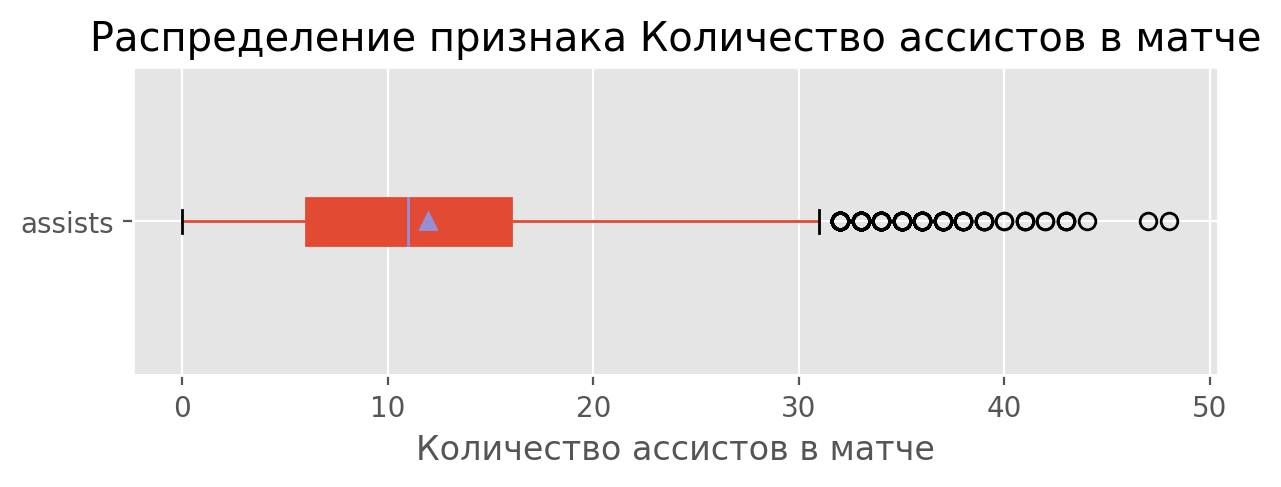

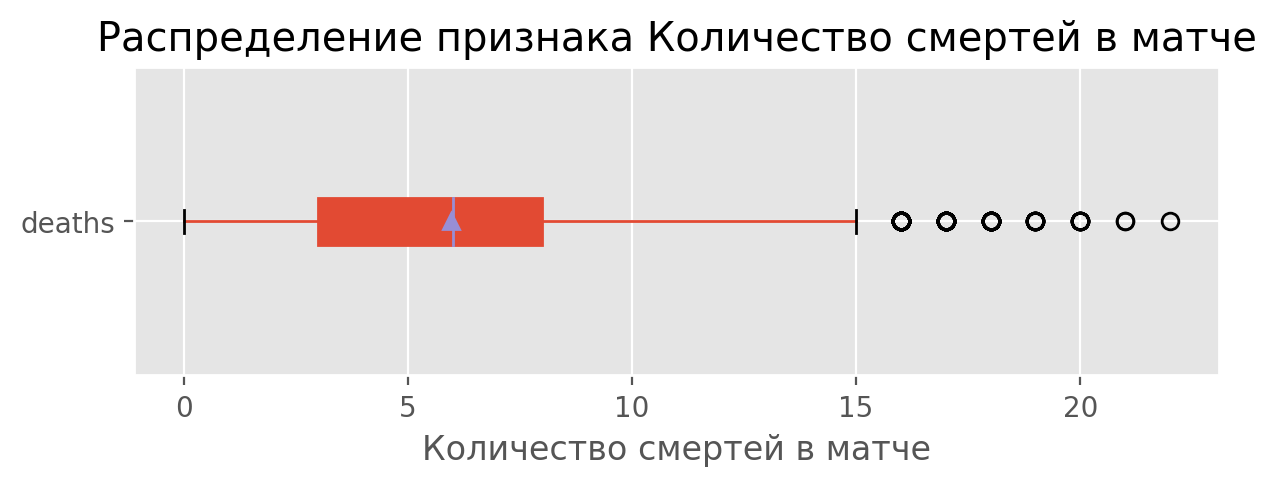

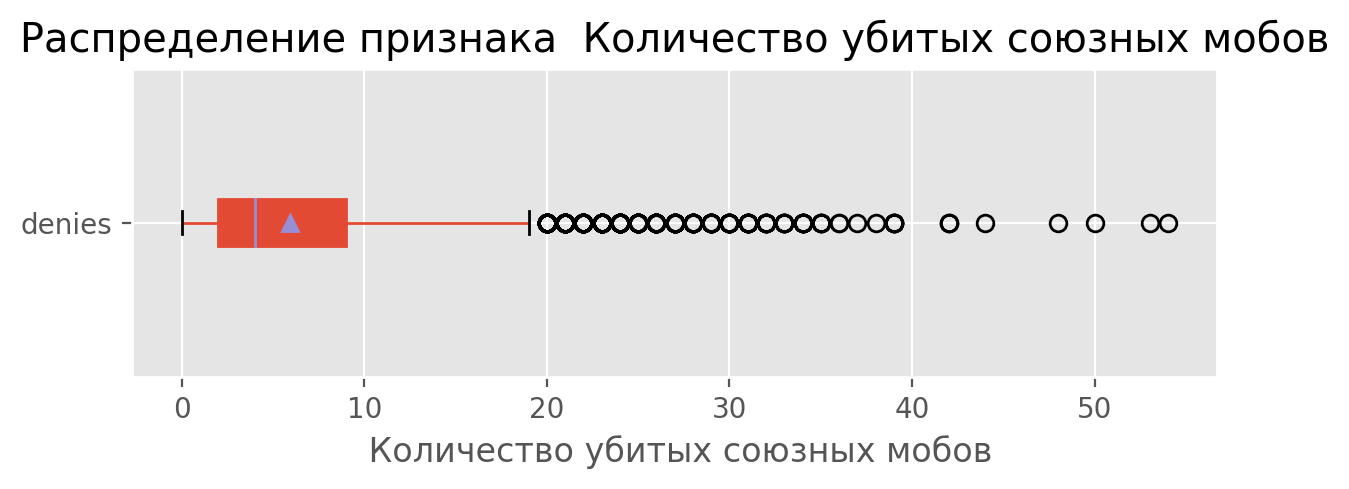

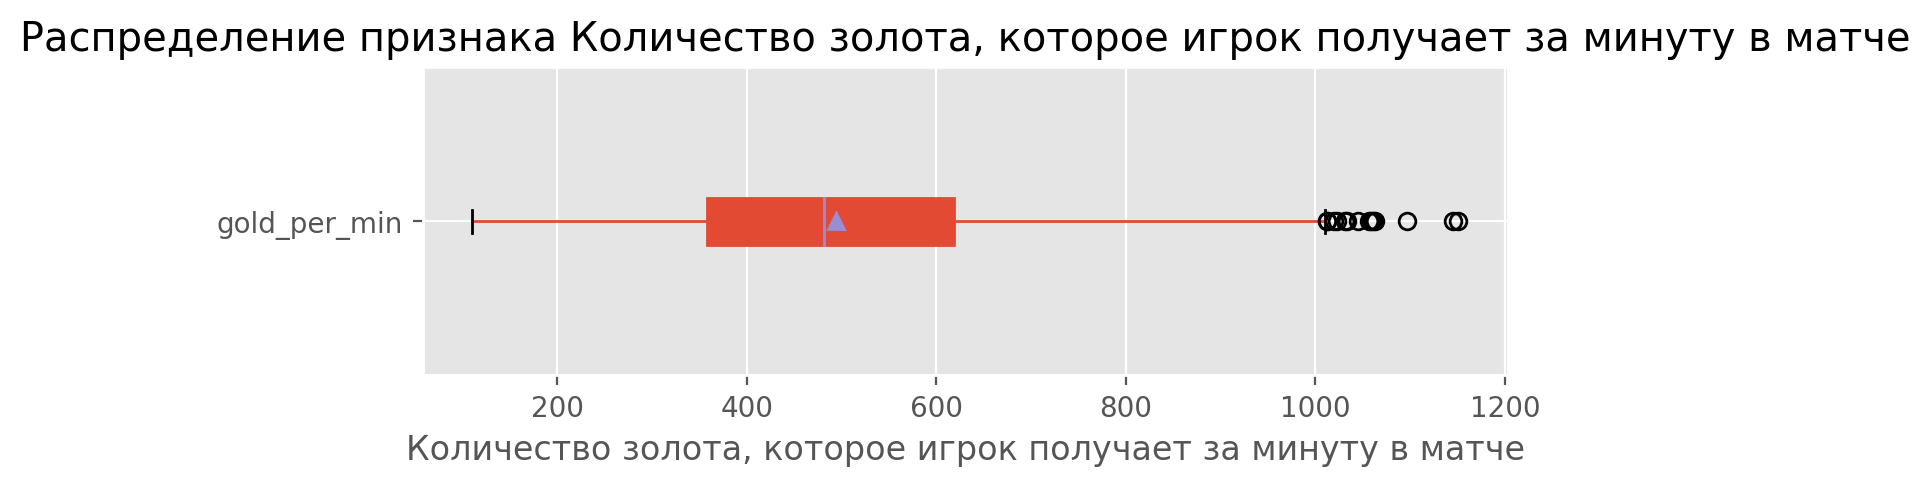

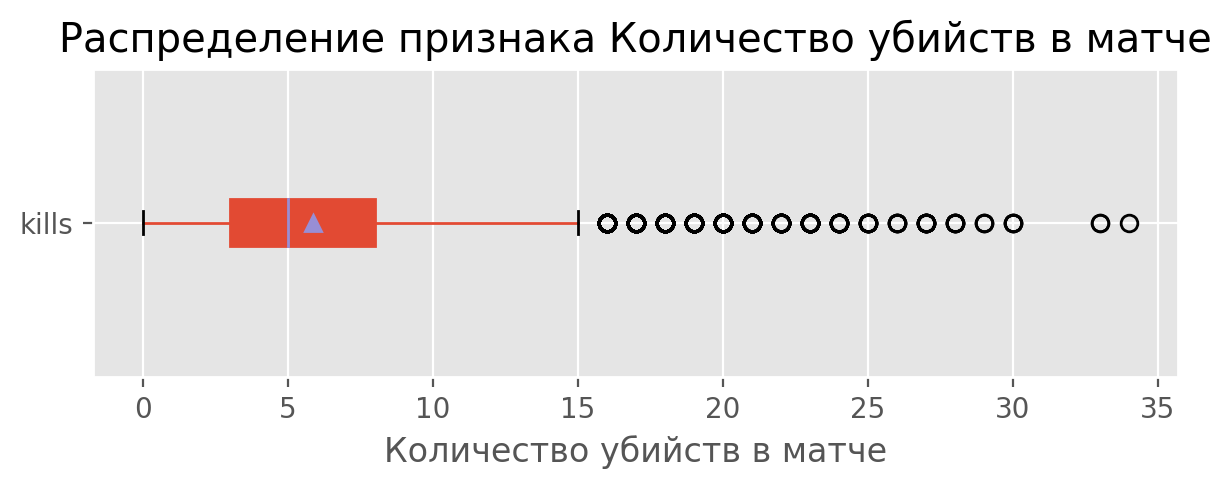

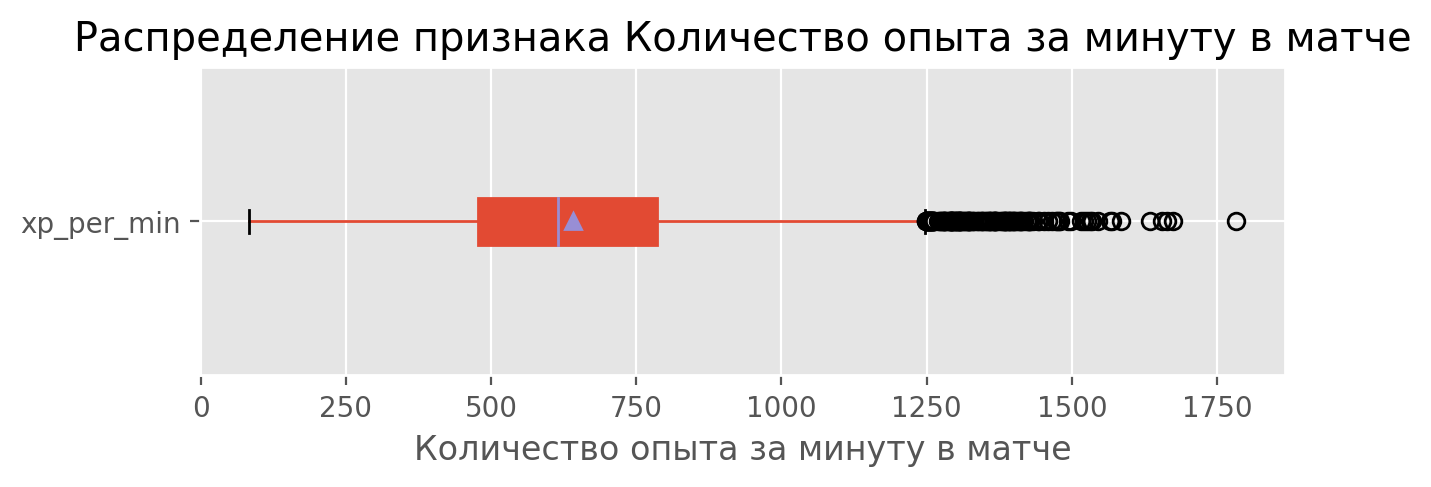

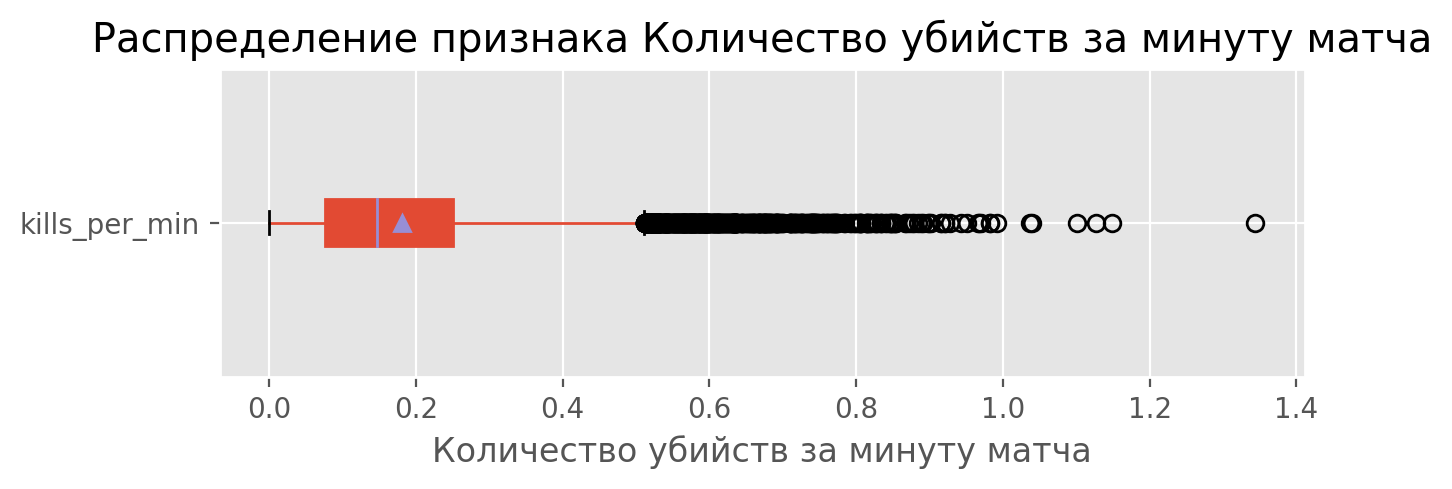

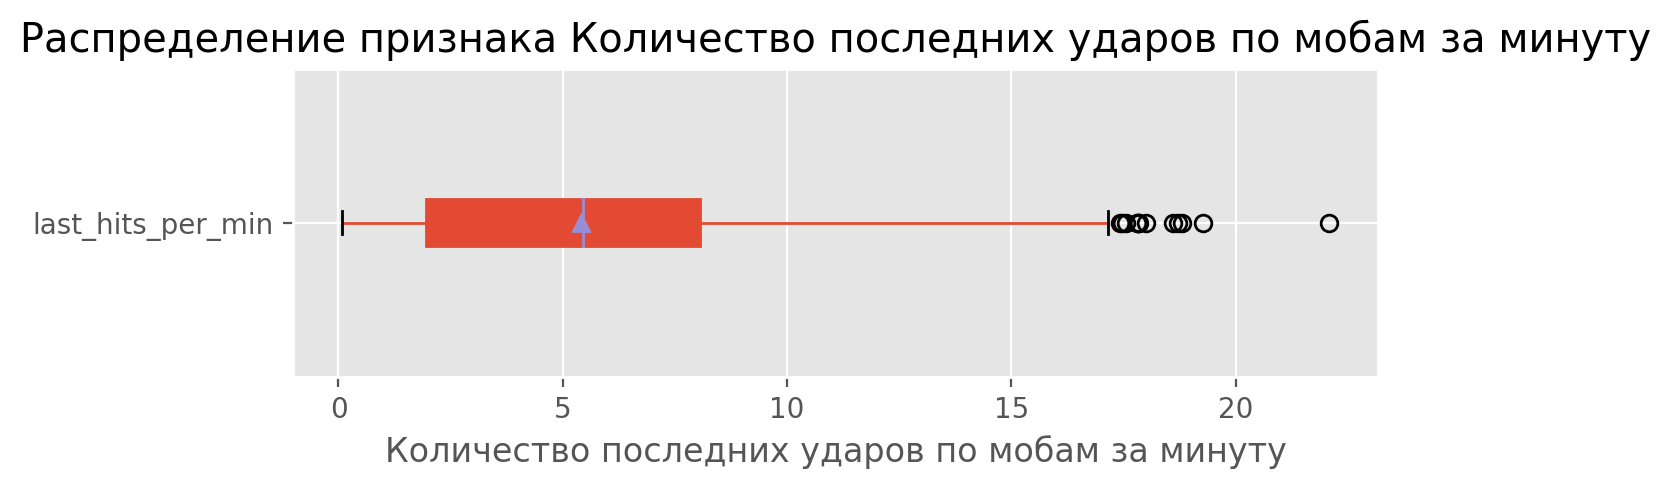

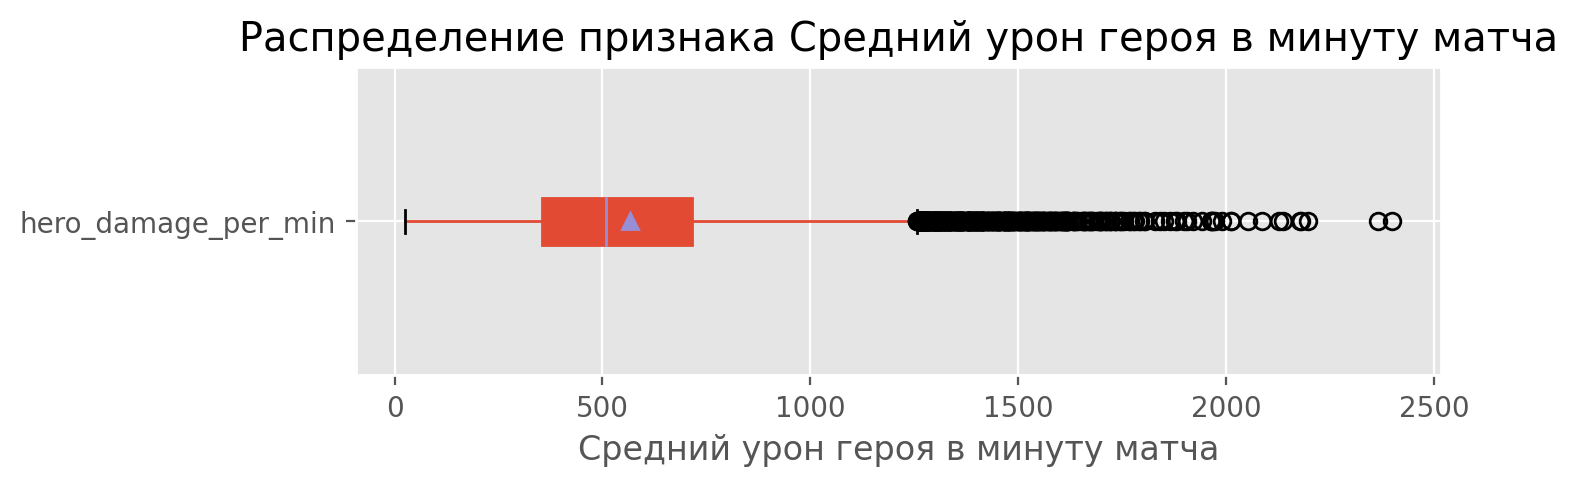

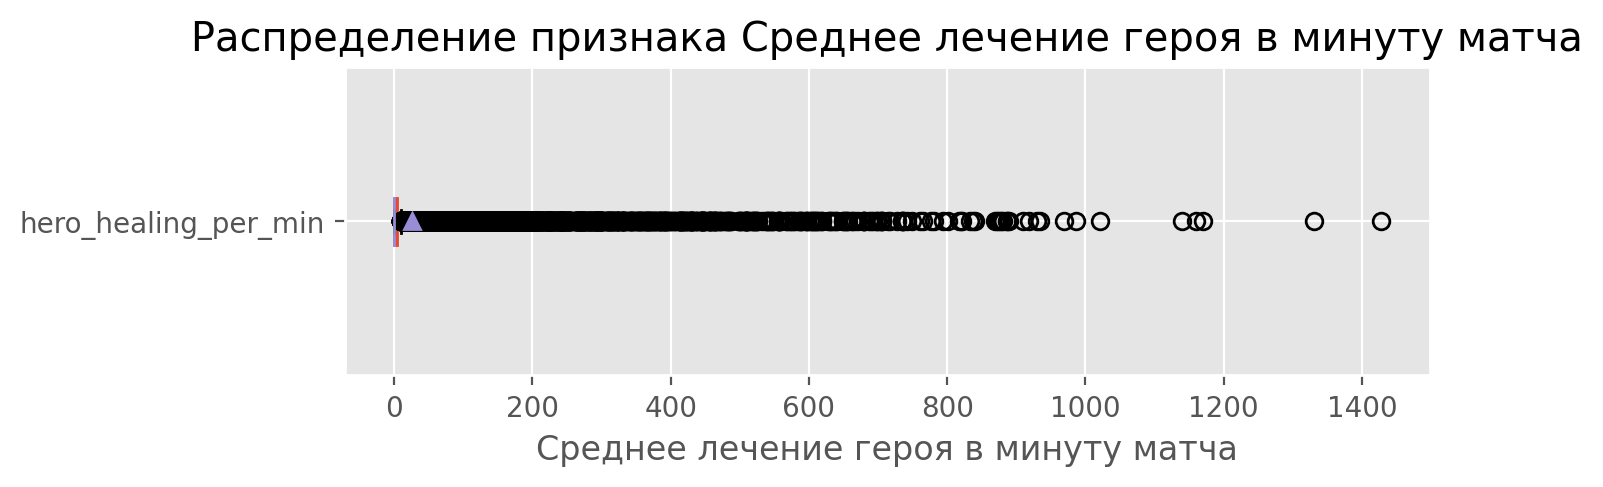

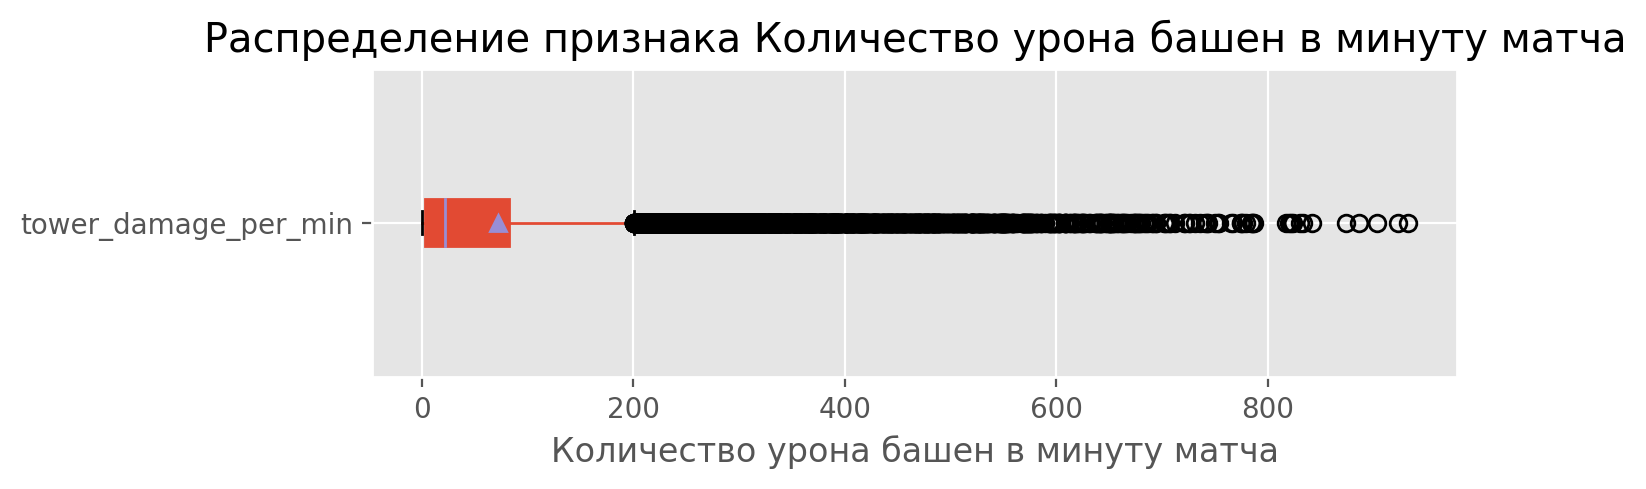

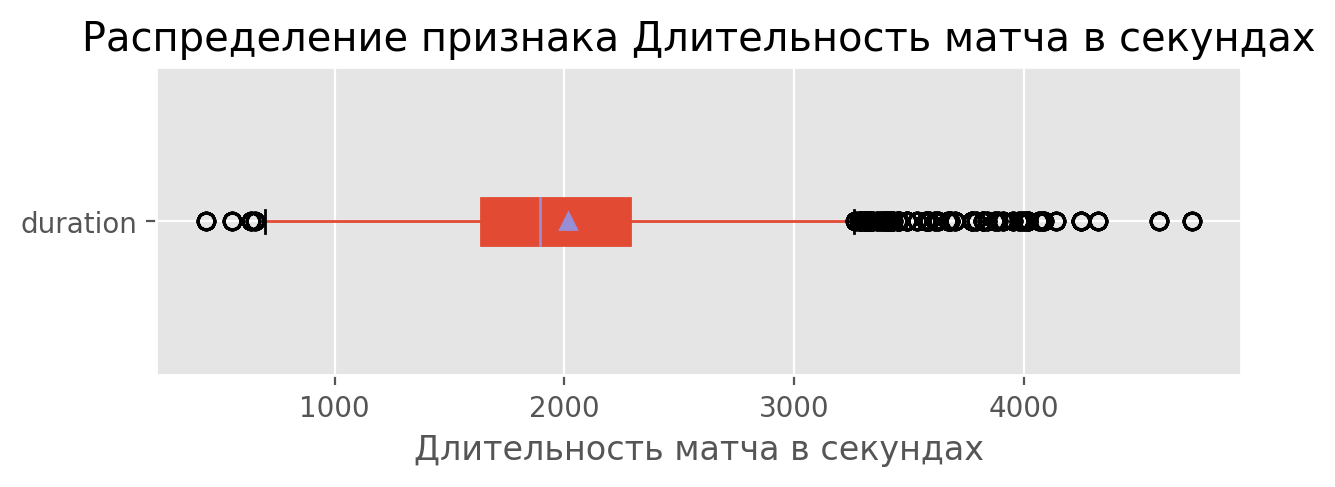

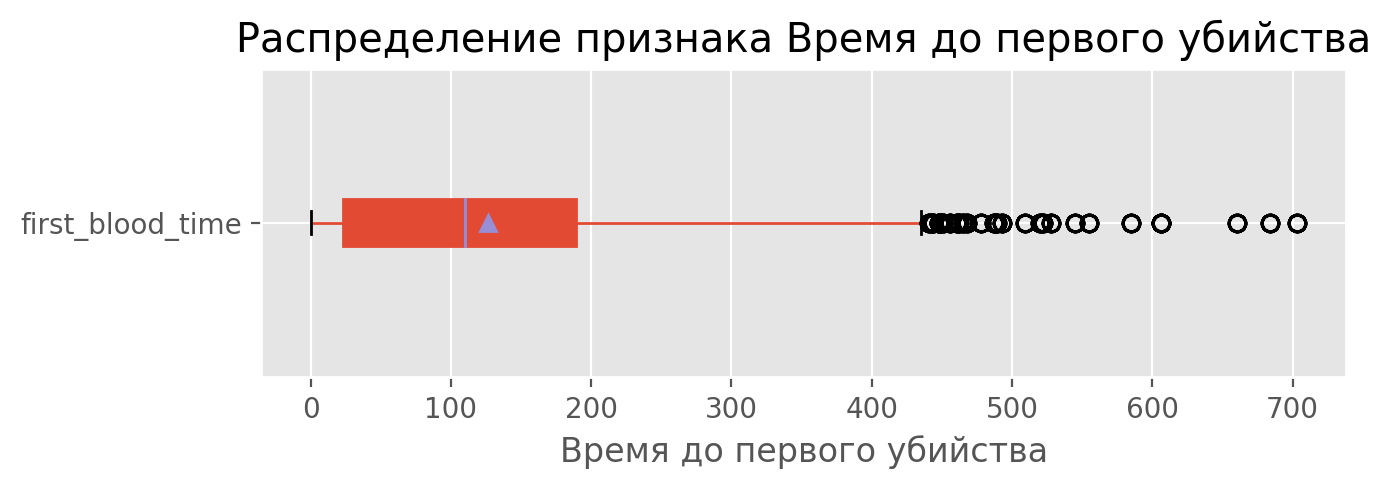

In [36]:
for i in range(len(num_col)):
    plt.figure(figsize=(7, 2))
    df.boxplot(num_col[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.xlabel(titles_num[i])
    plt.show()

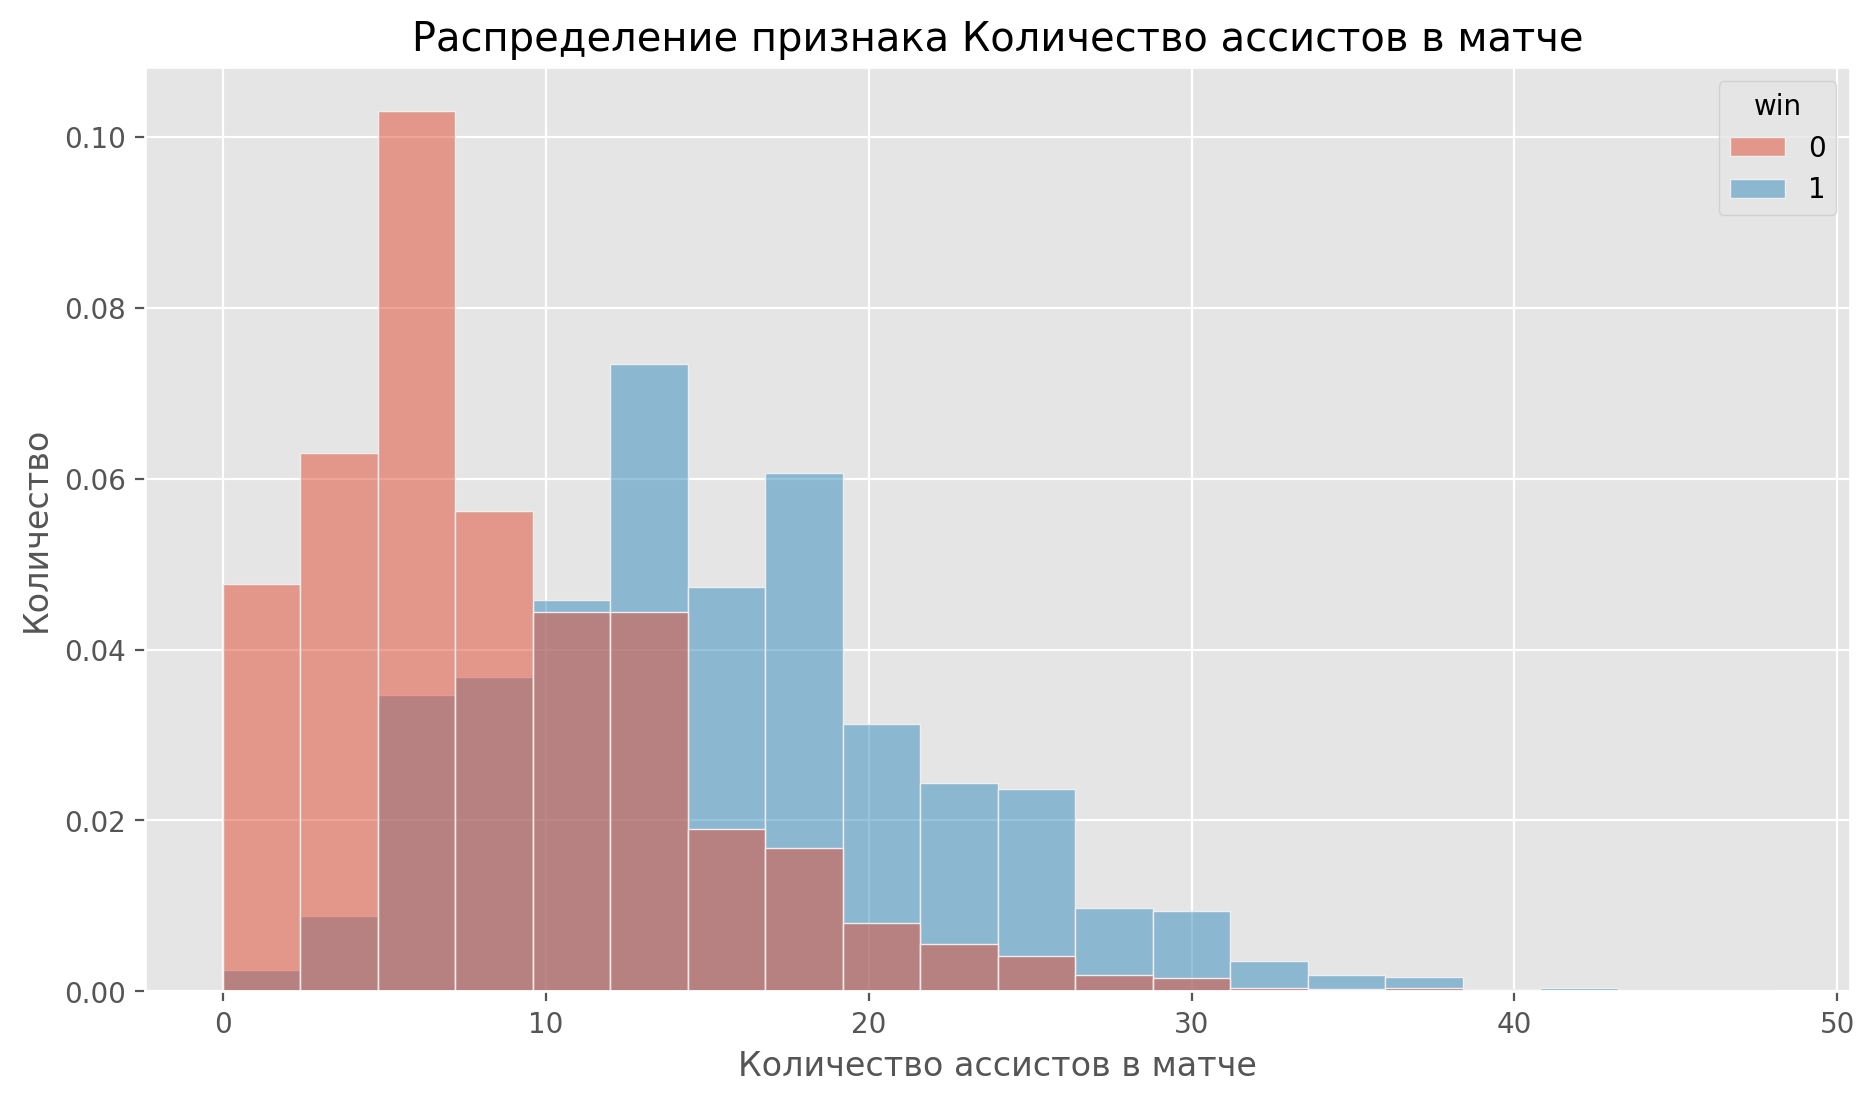

count    17896.000000
mean        11.969155
std          7.190642
min          0.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         48.000000
Name: assists, dtype: float64


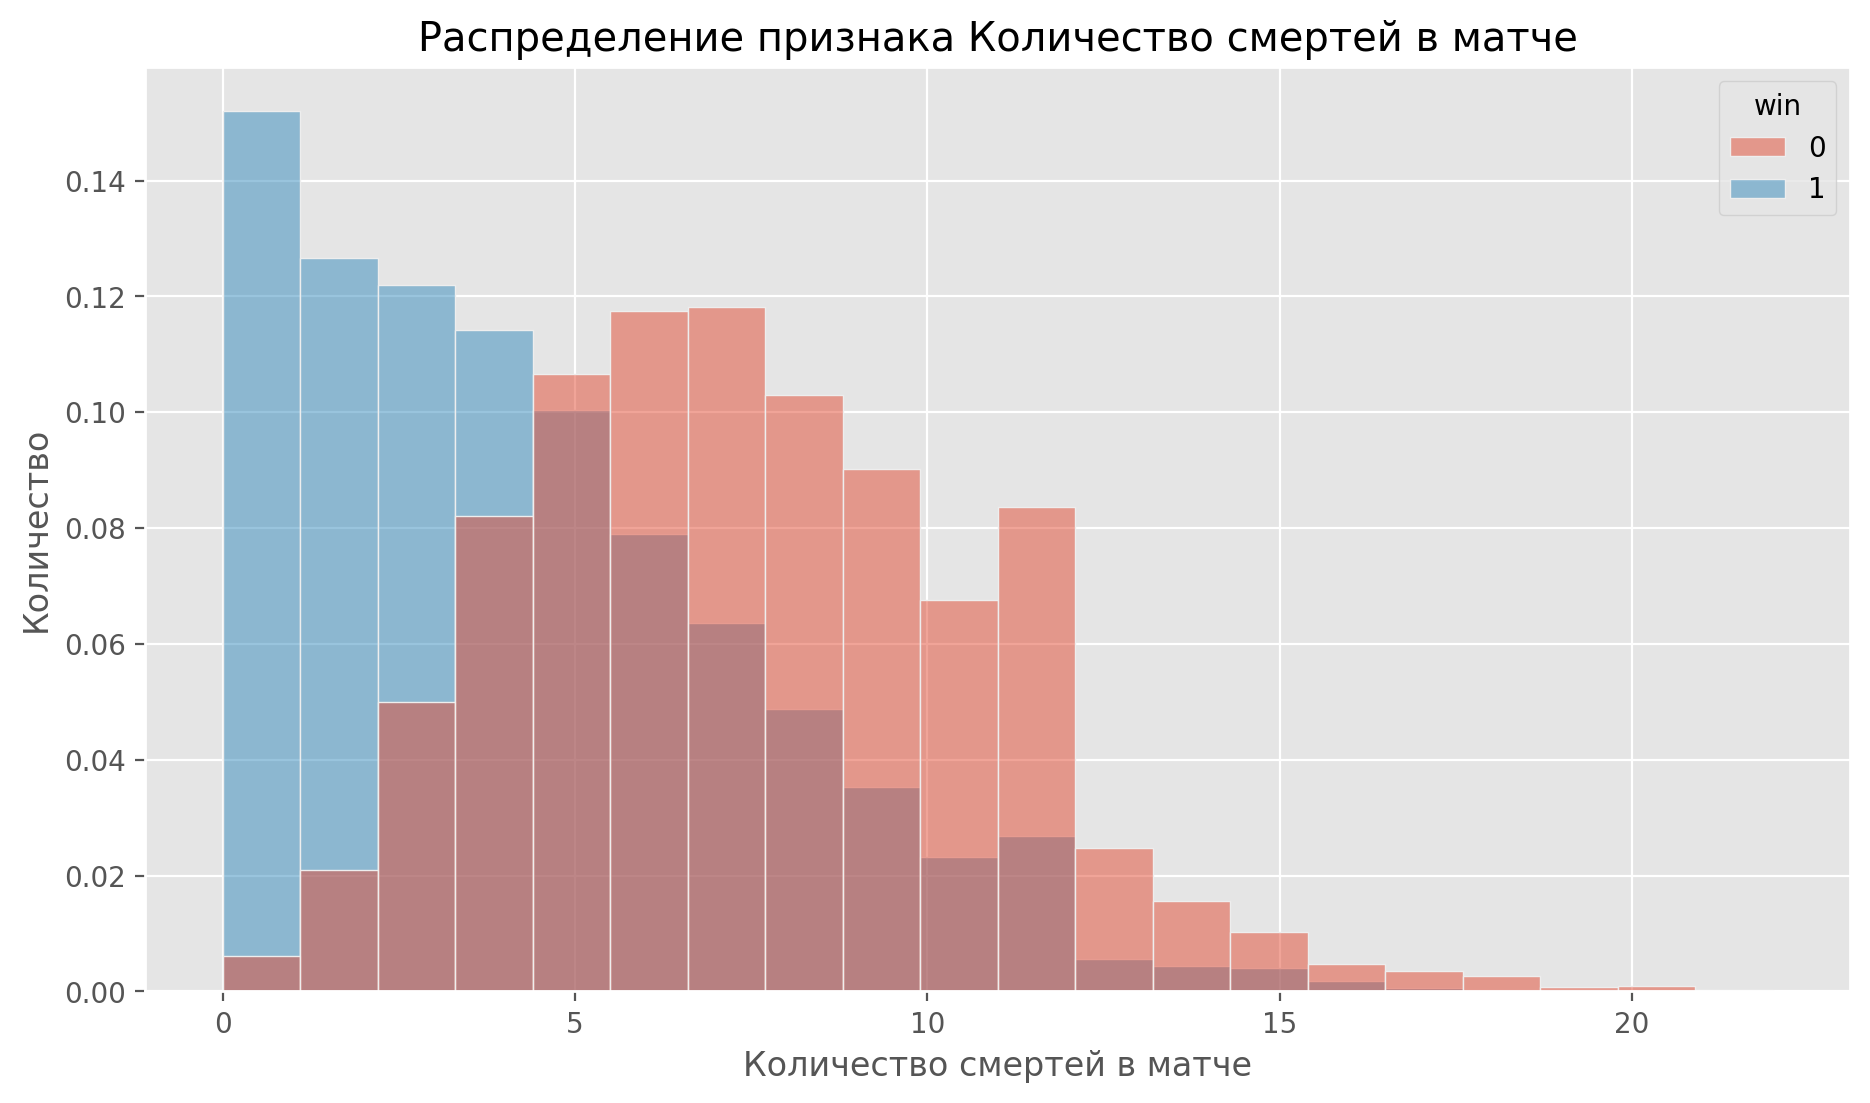

count    17896.000000
mean         5.973961
std          3.477223
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         22.000000
Name: deaths, dtype: float64


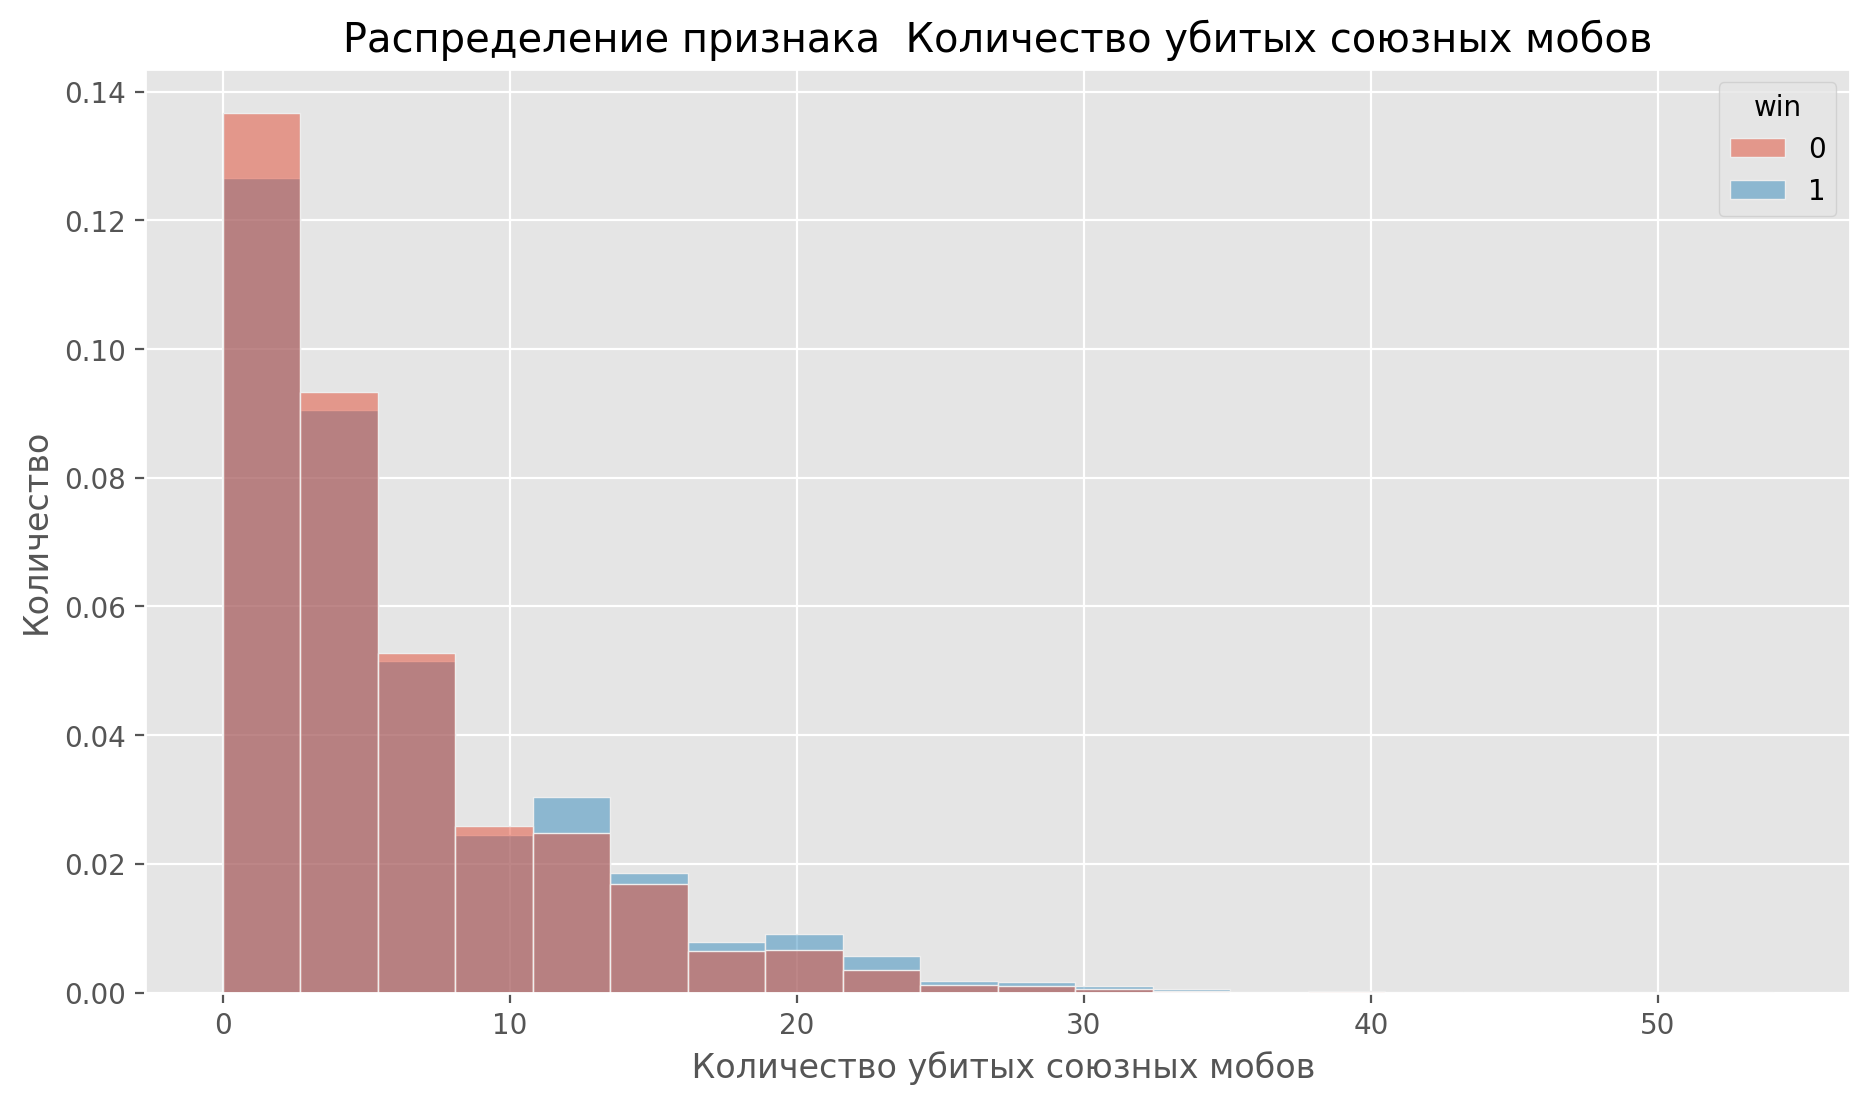

count    17896.000000
mean         5.919256
std          5.905611
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         54.000000
Name: denies, dtype: float64


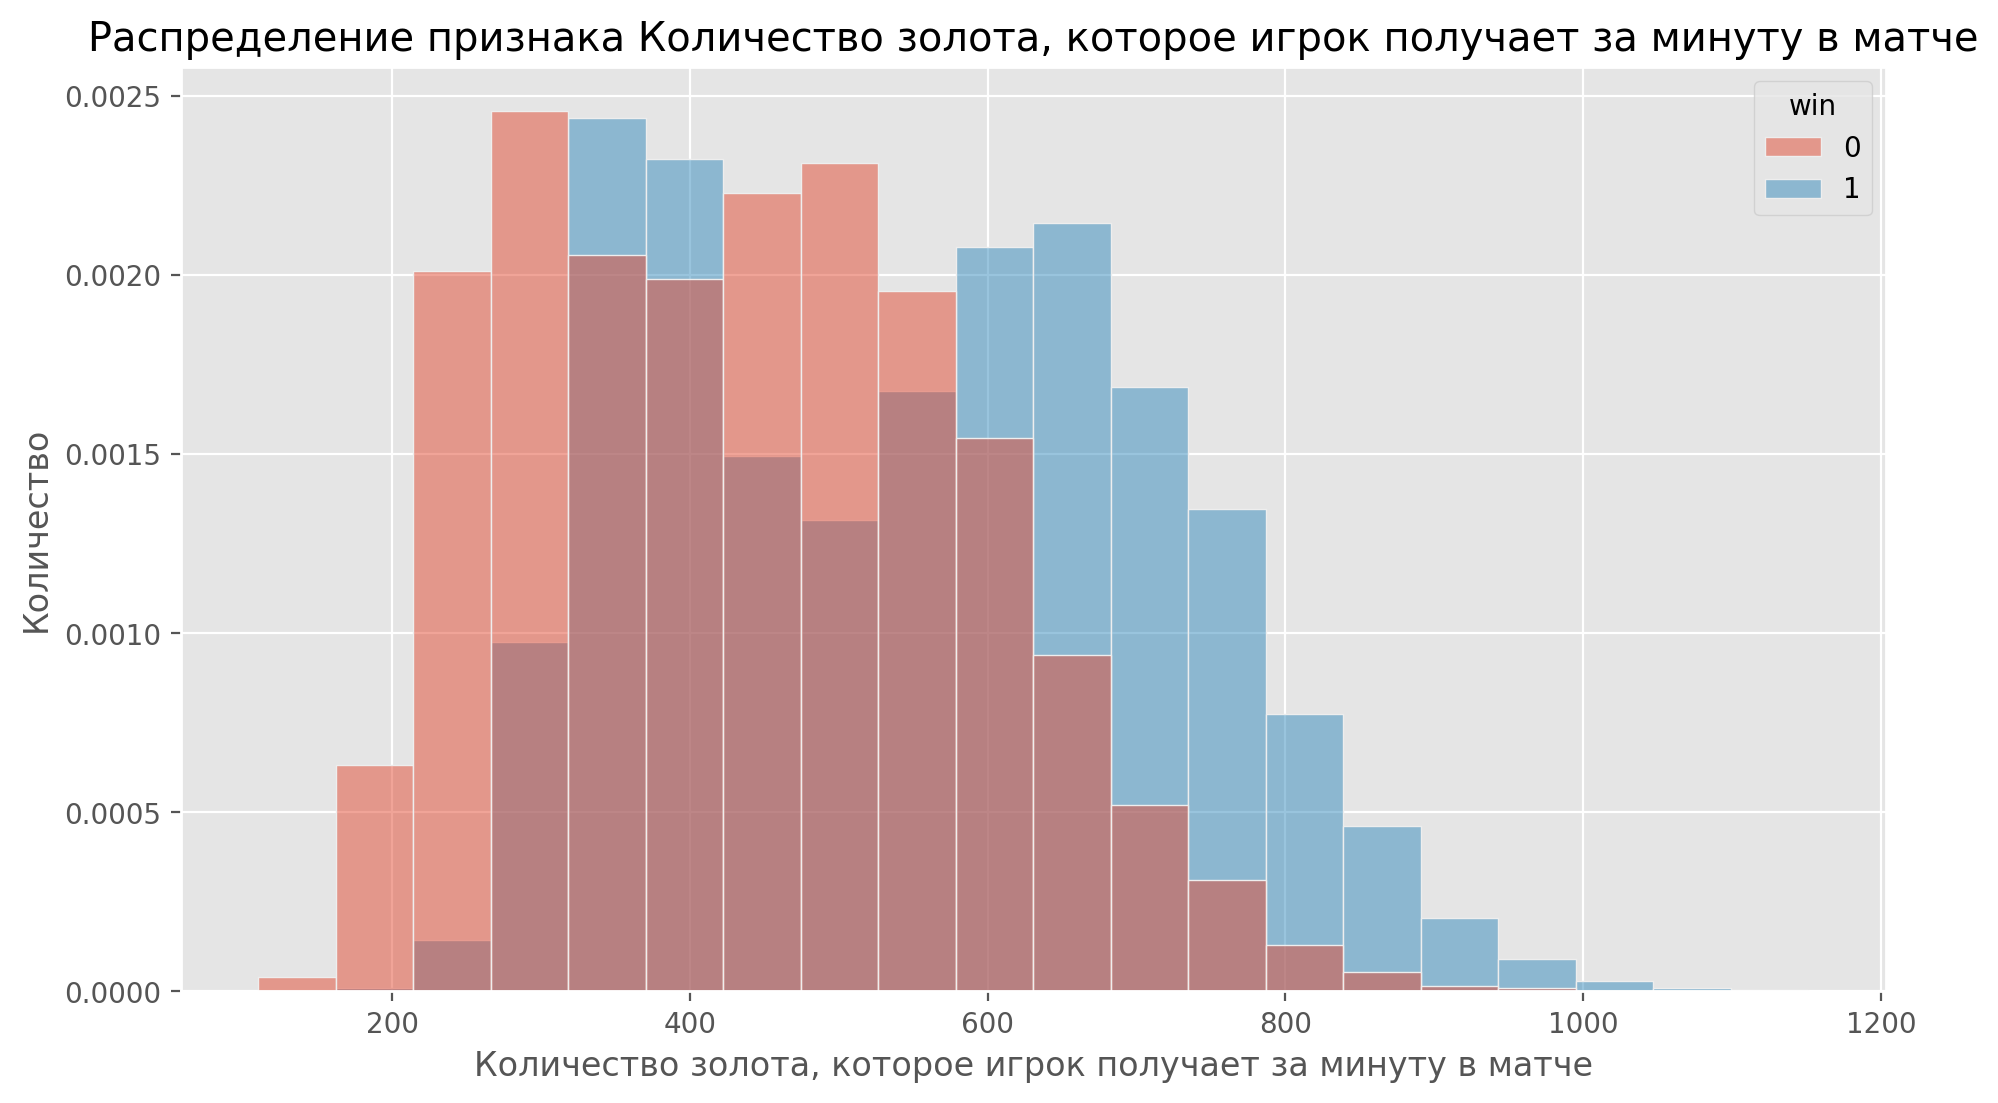

count    17896.000000
mean       493.778889
std        167.729971
min        110.000000
25%        358.000000
50%        481.000000
75%        619.000000
max       1151.000000
Name: gold_per_min, dtype: float64


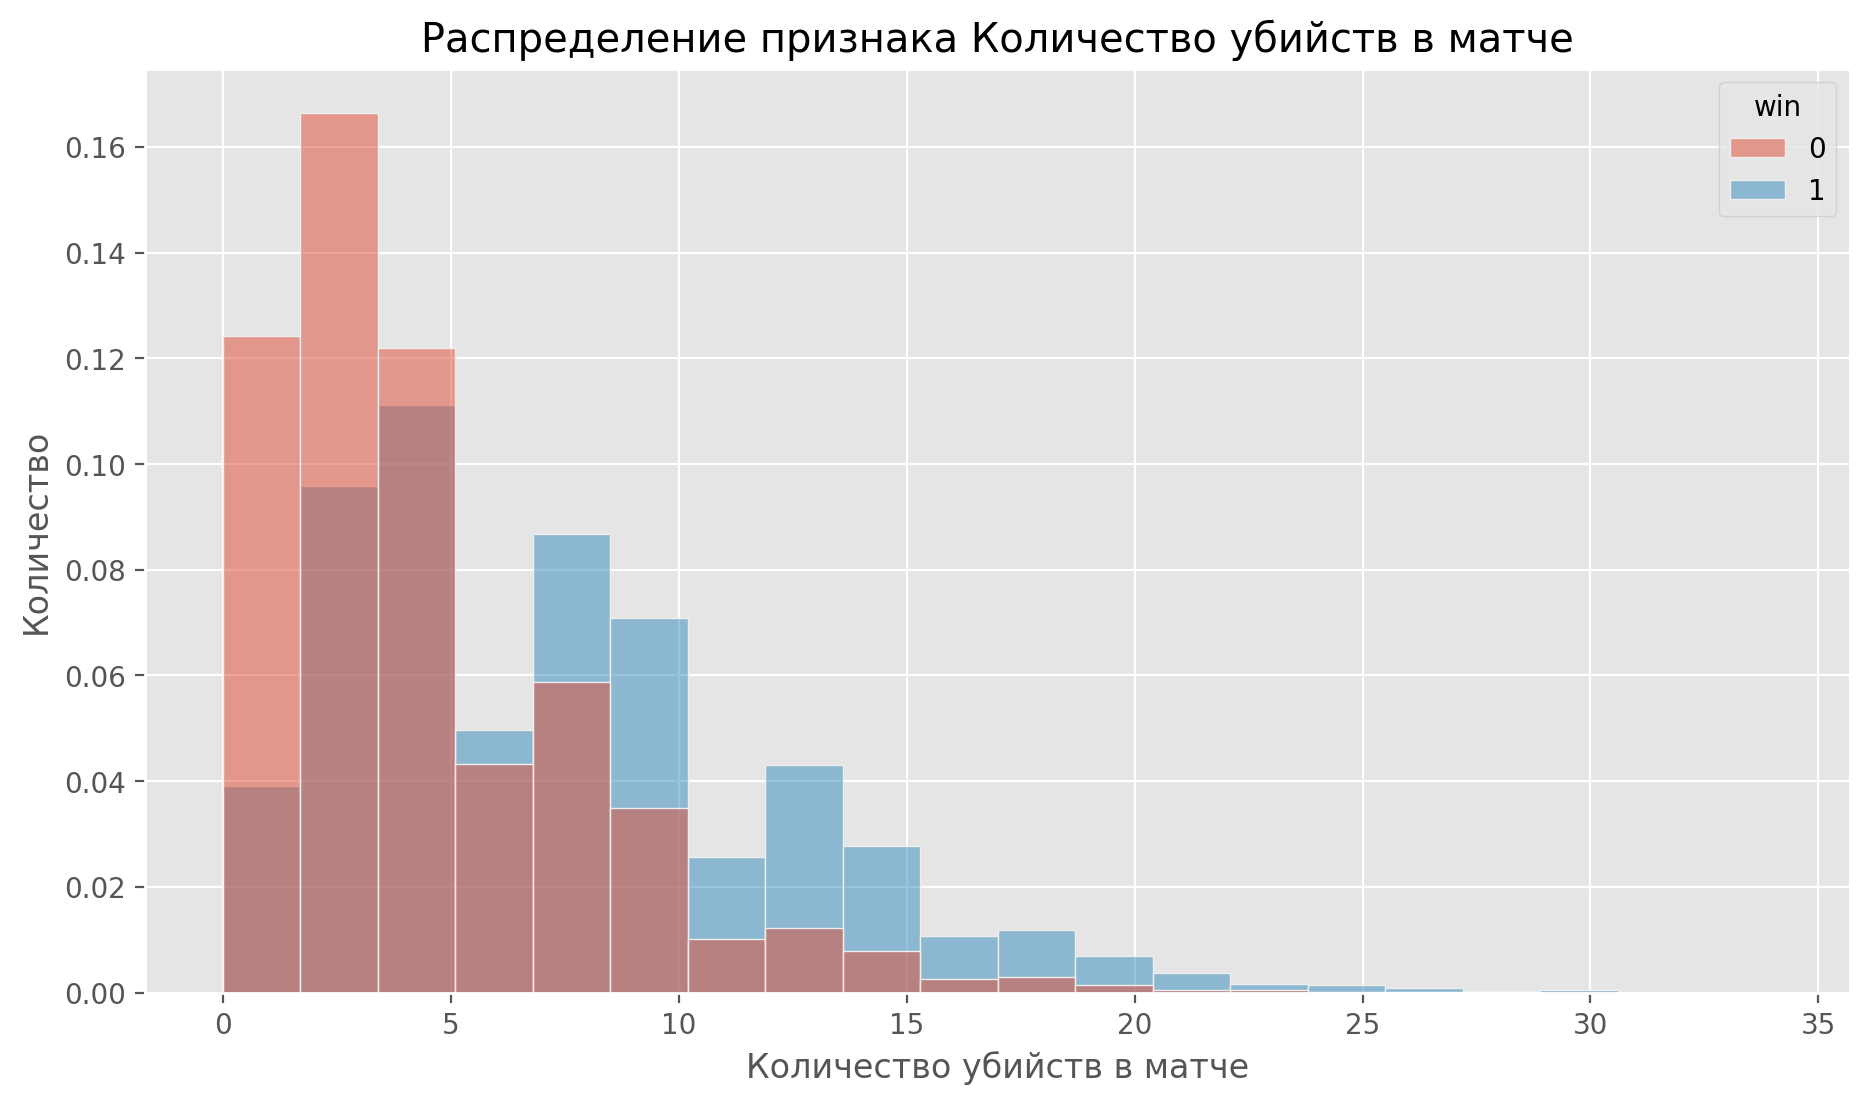

count    17896.000000
mean         5.878185
std          4.512653
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         34.000000
Name: kills, dtype: float64


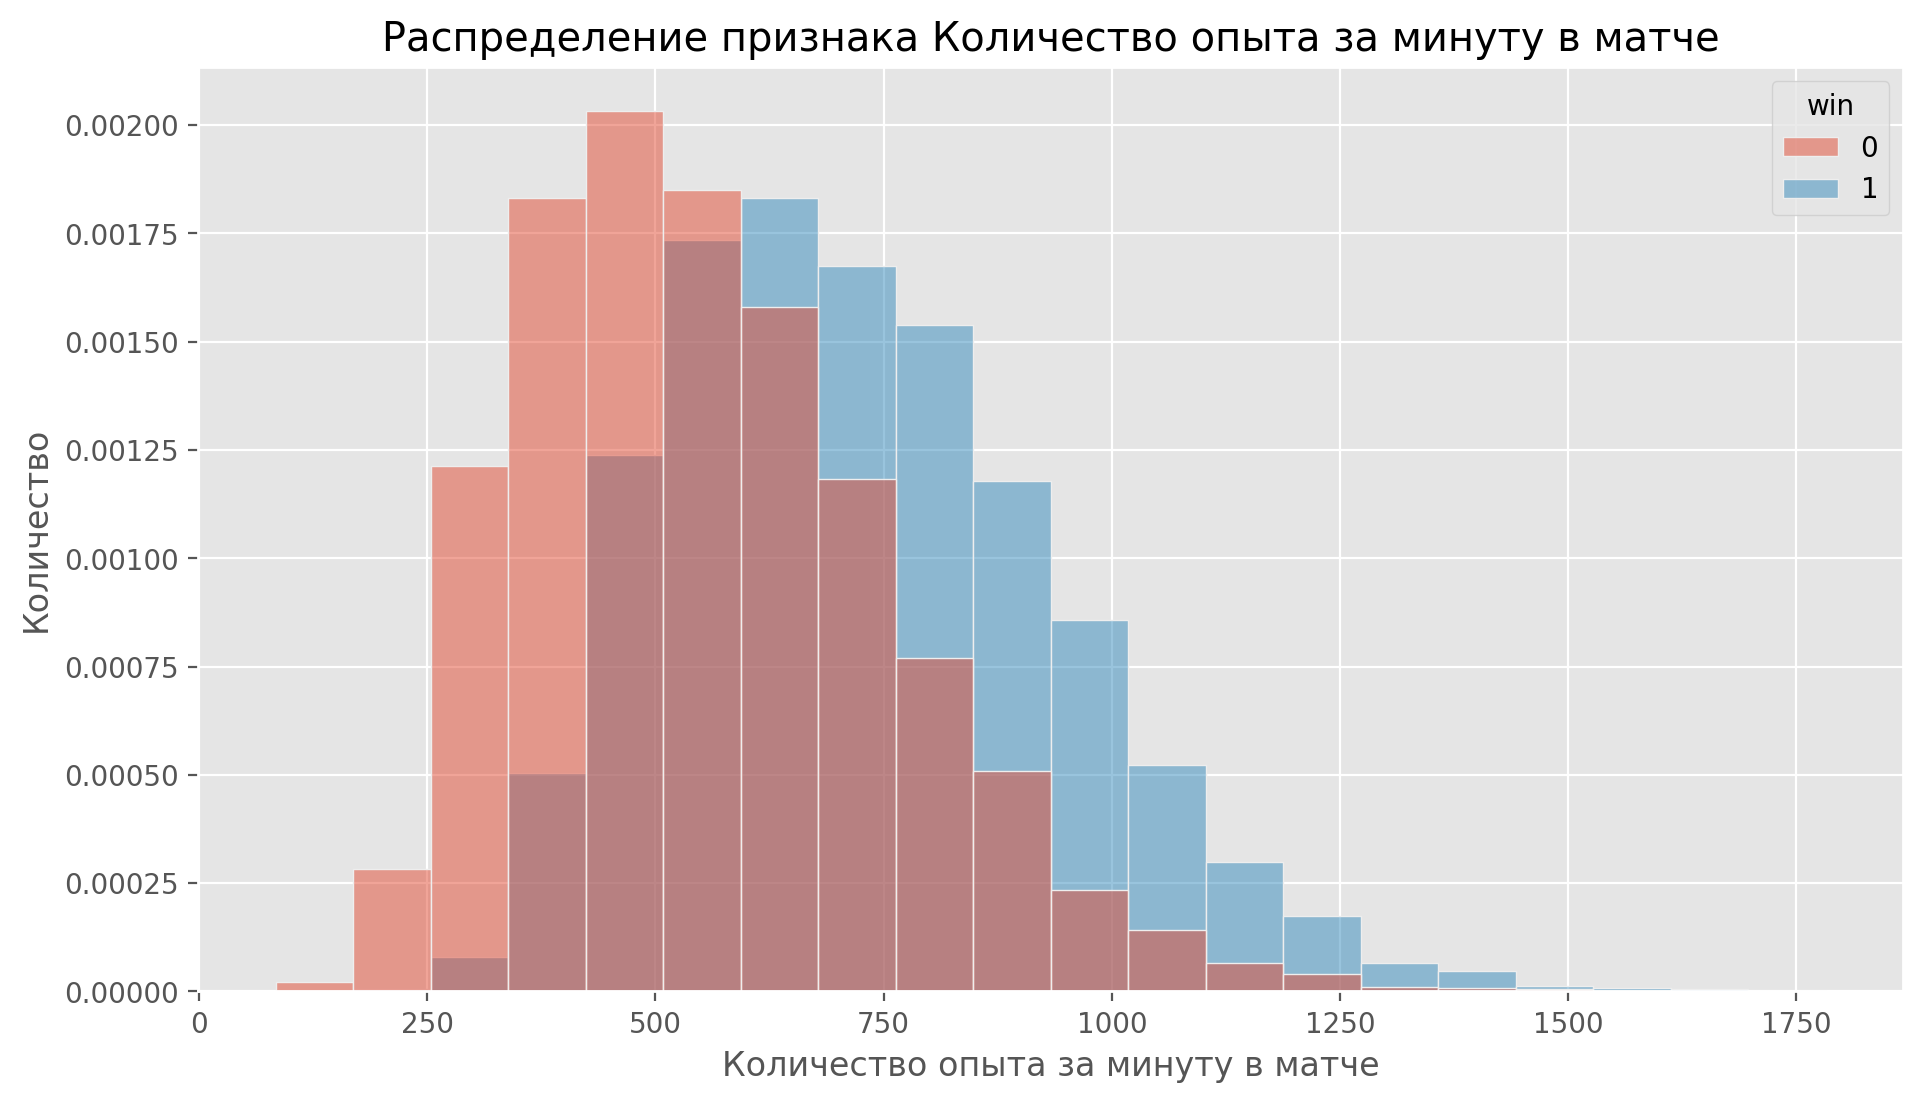

count    17896.000000
mean       641.055878
std        222.709602
min         84.000000
25%        477.000000
50%        616.000000
75%        785.000000
max       1782.000000
Name: xp_per_min, dtype: float64


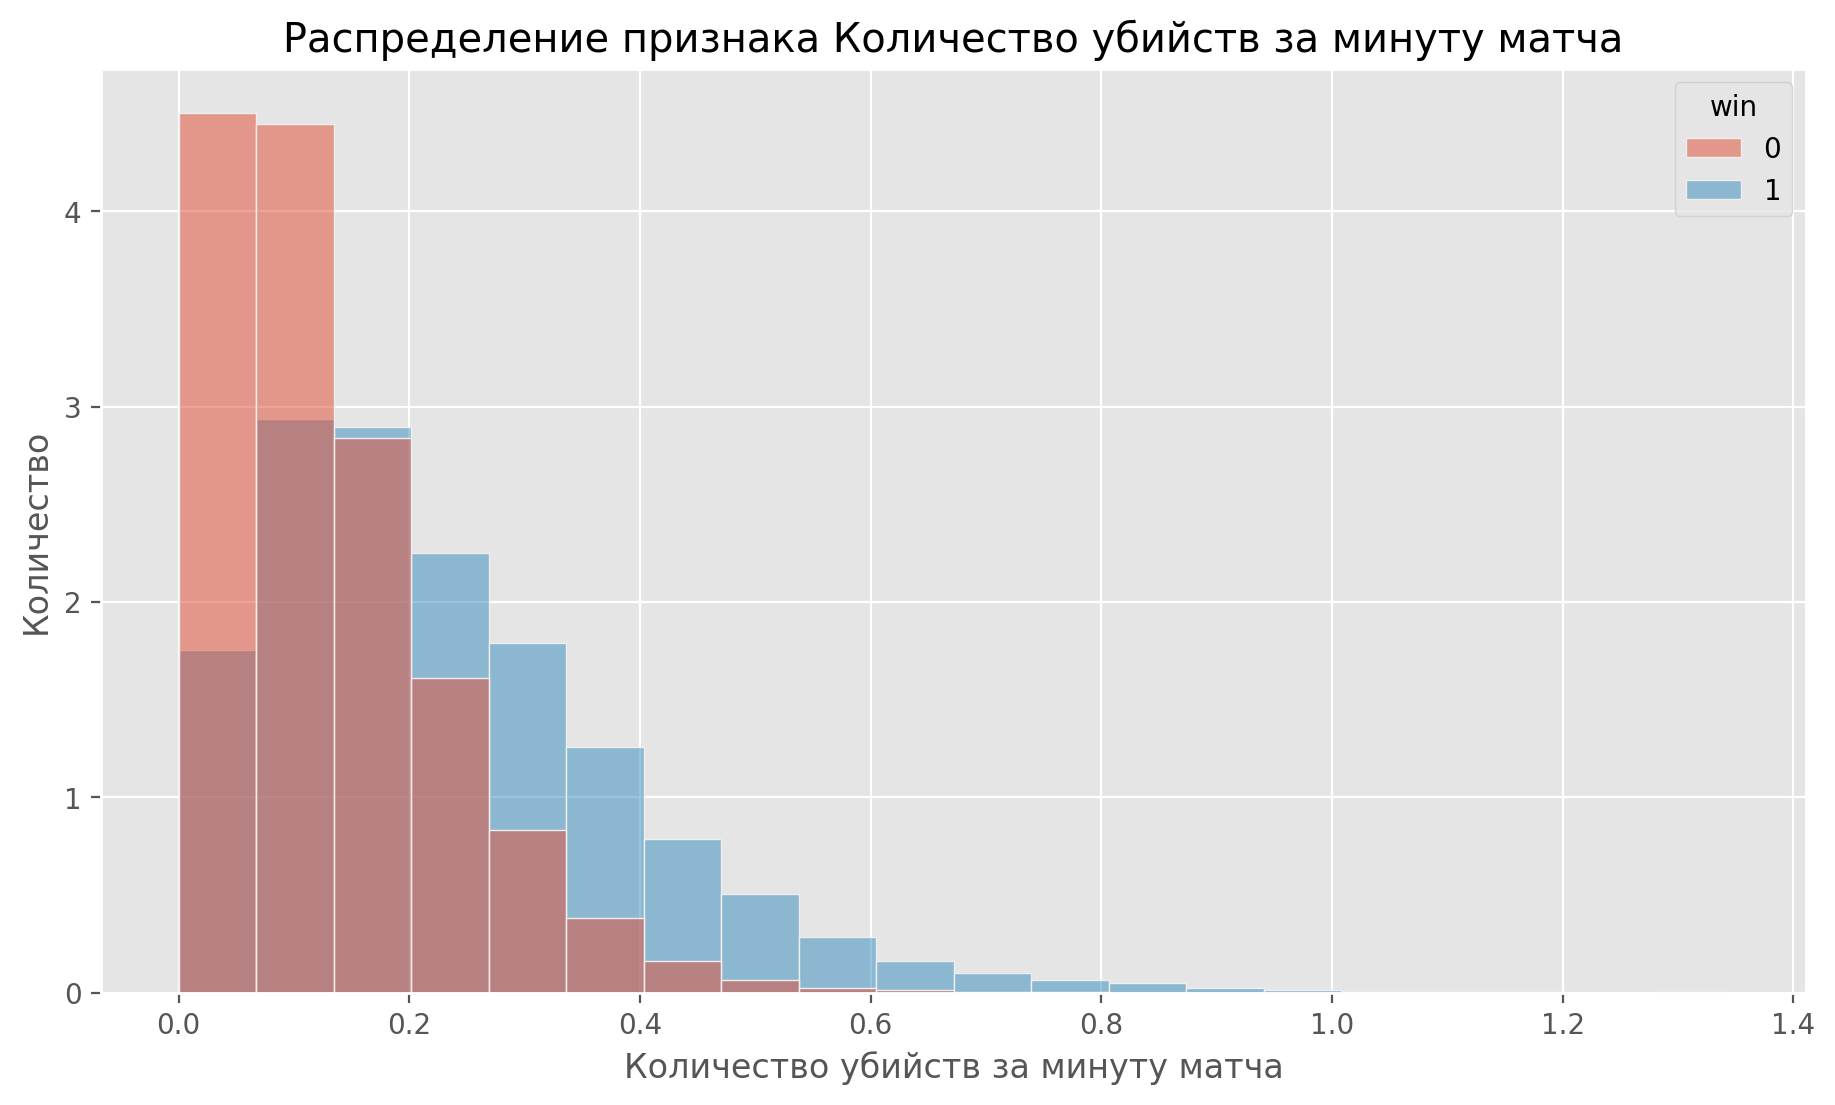

count    17896.000000
mean         0.180758
std          0.142625
min          0.000000
25%          0.076466
50%          0.146831
75%          0.250522
max          1.344000
Name: kills_per_min, dtype: float64


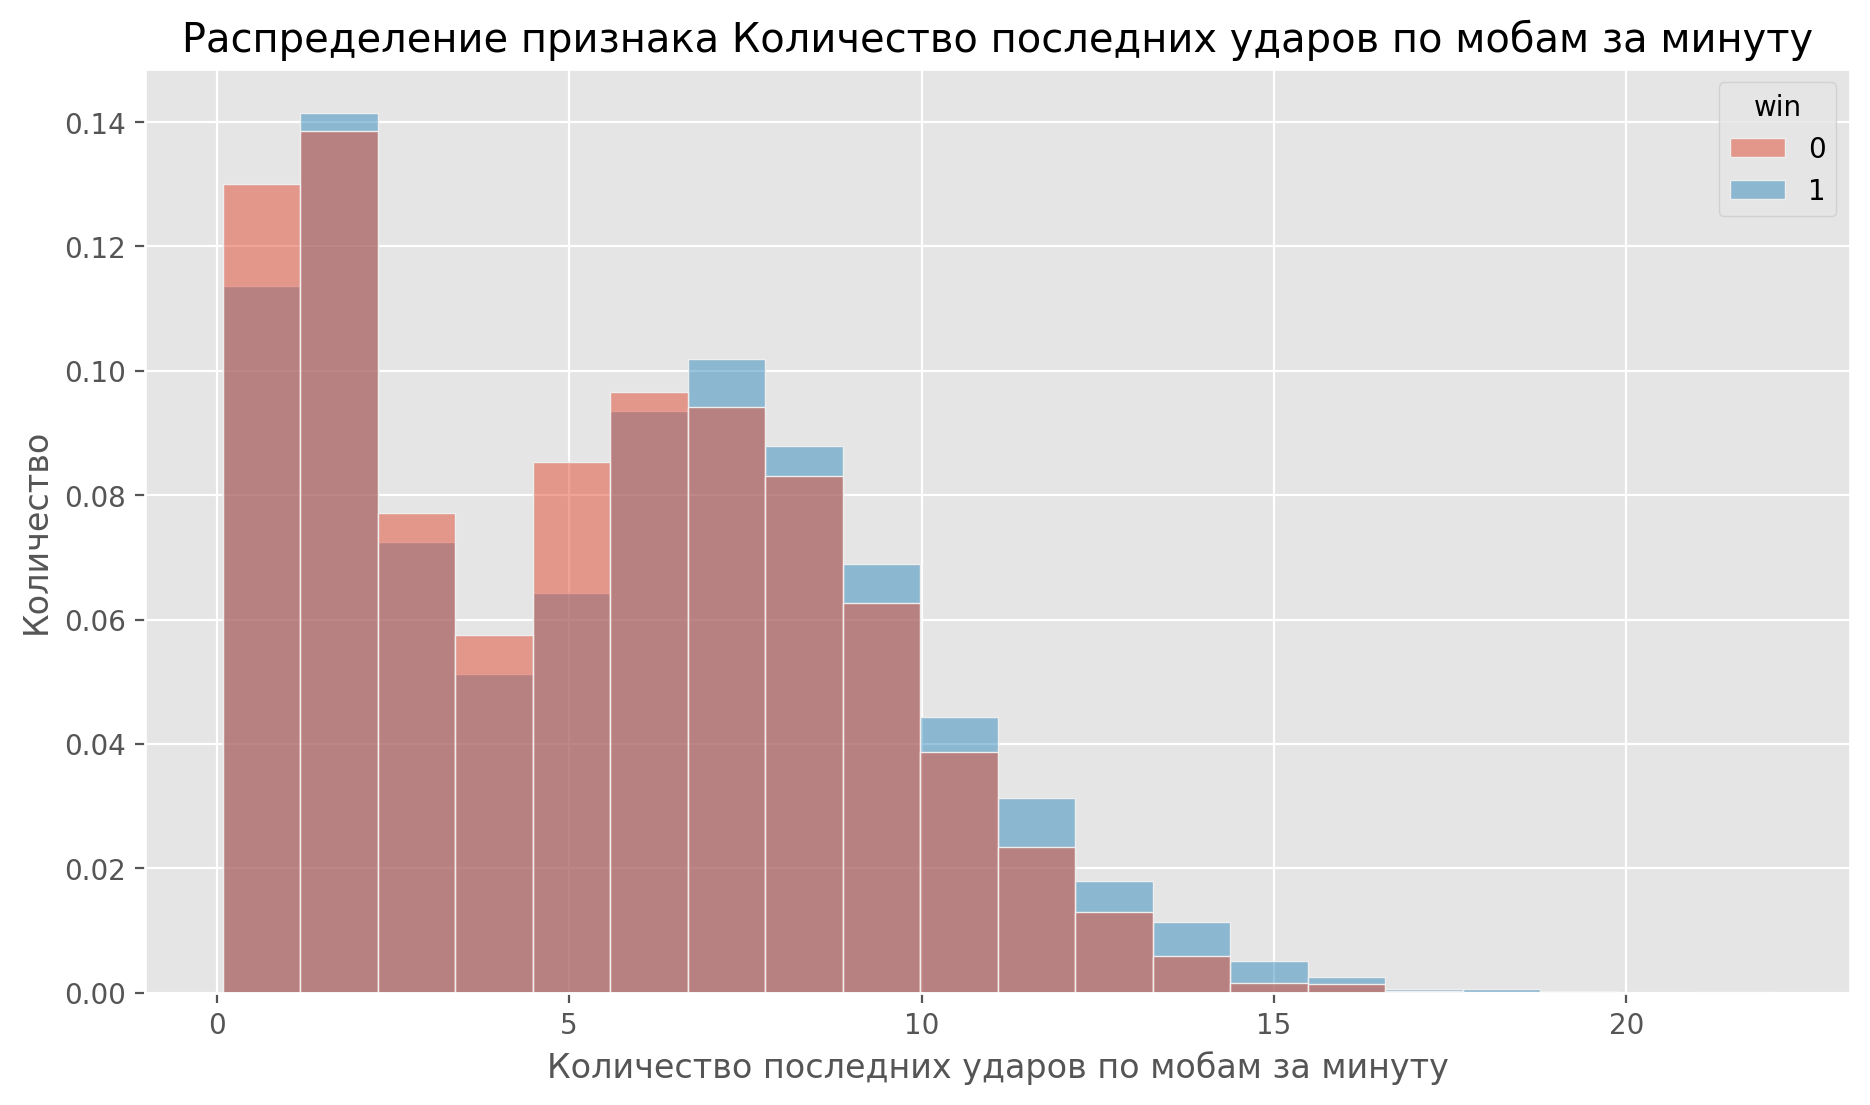

count    17896.000000
mean         5.406105
std          3.573094
min          0.086957
25%          1.951693
50%          5.444642
75%          8.064074
max         22.076821
Name: last_hits_per_min, dtype: float64


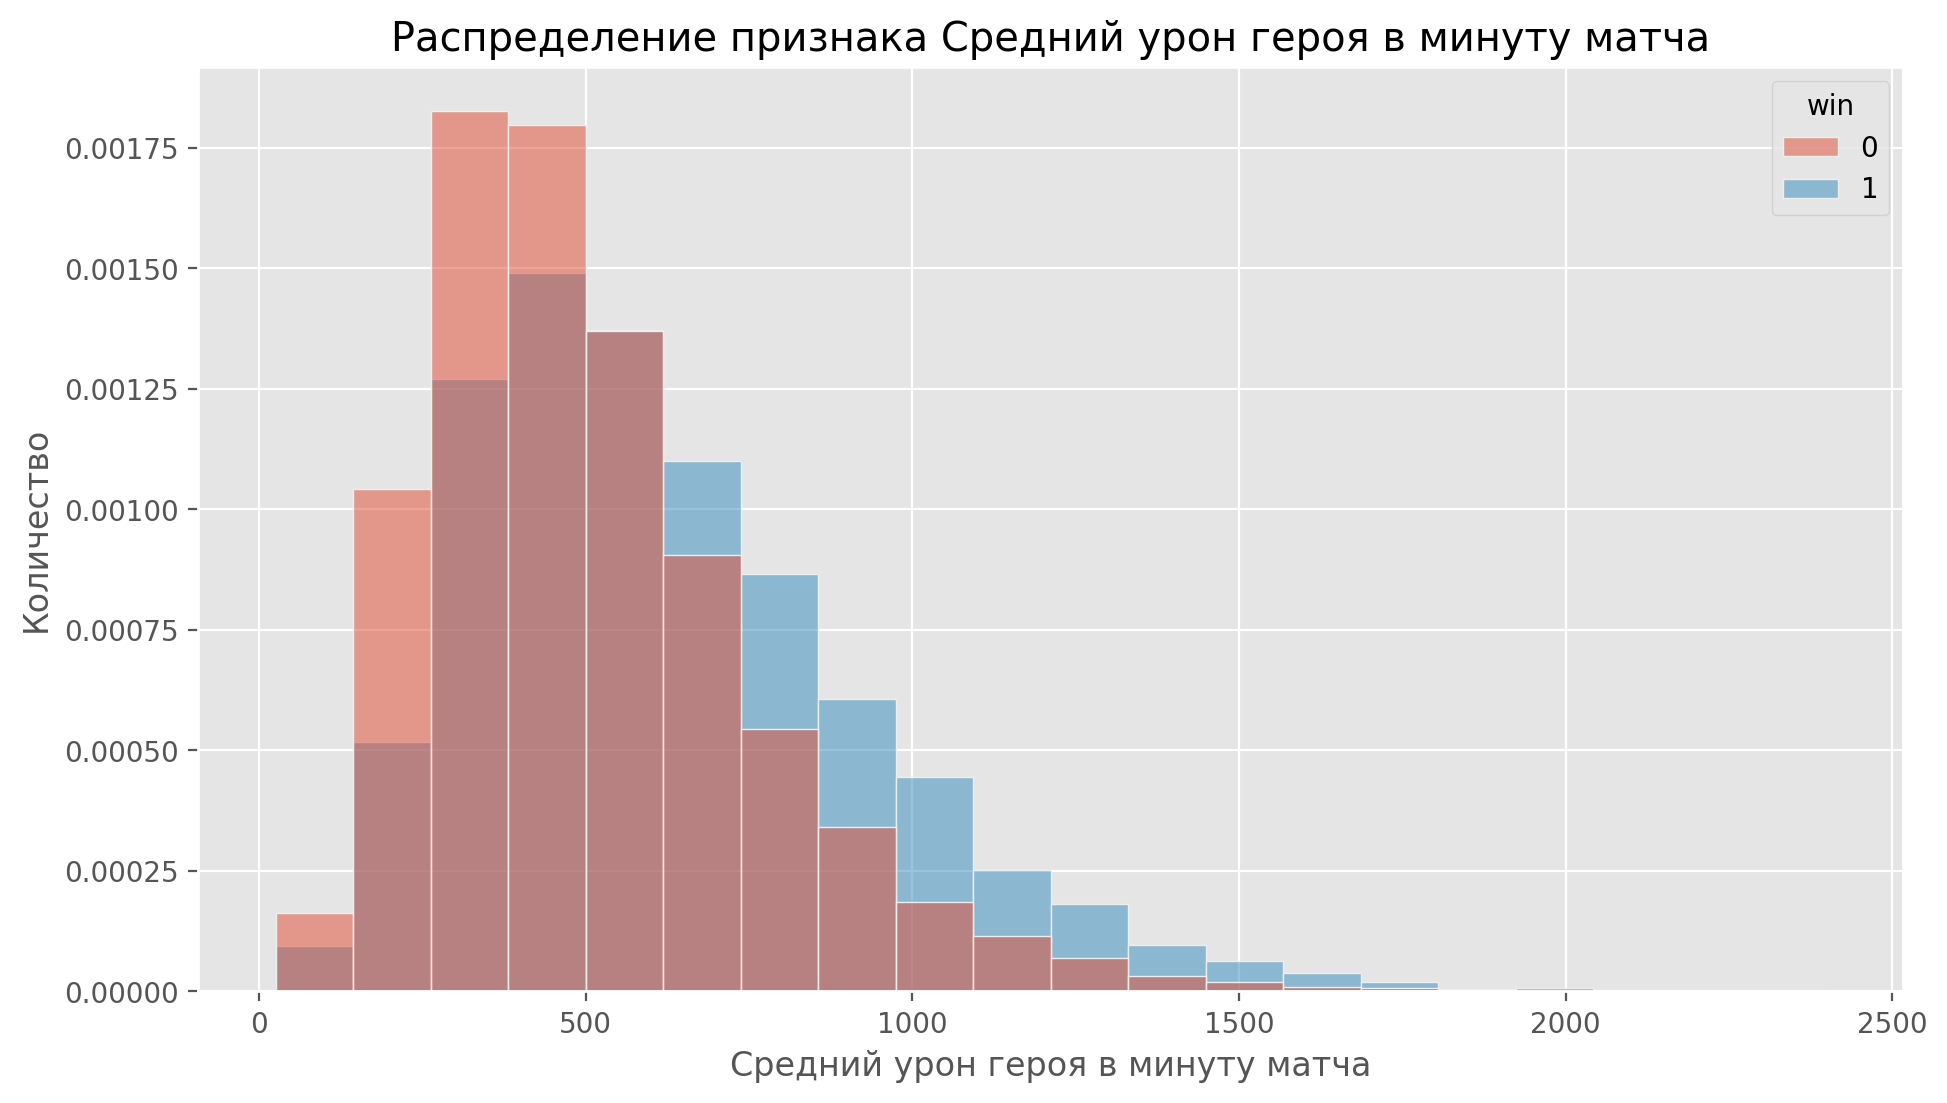

count    17896.000000
mean       565.516836
std        286.893218
min         25.456919
25%        355.758510
50%        508.552308
75%        716.018980
max       2397.967033
Name: hero_damage_per_min, dtype: float64


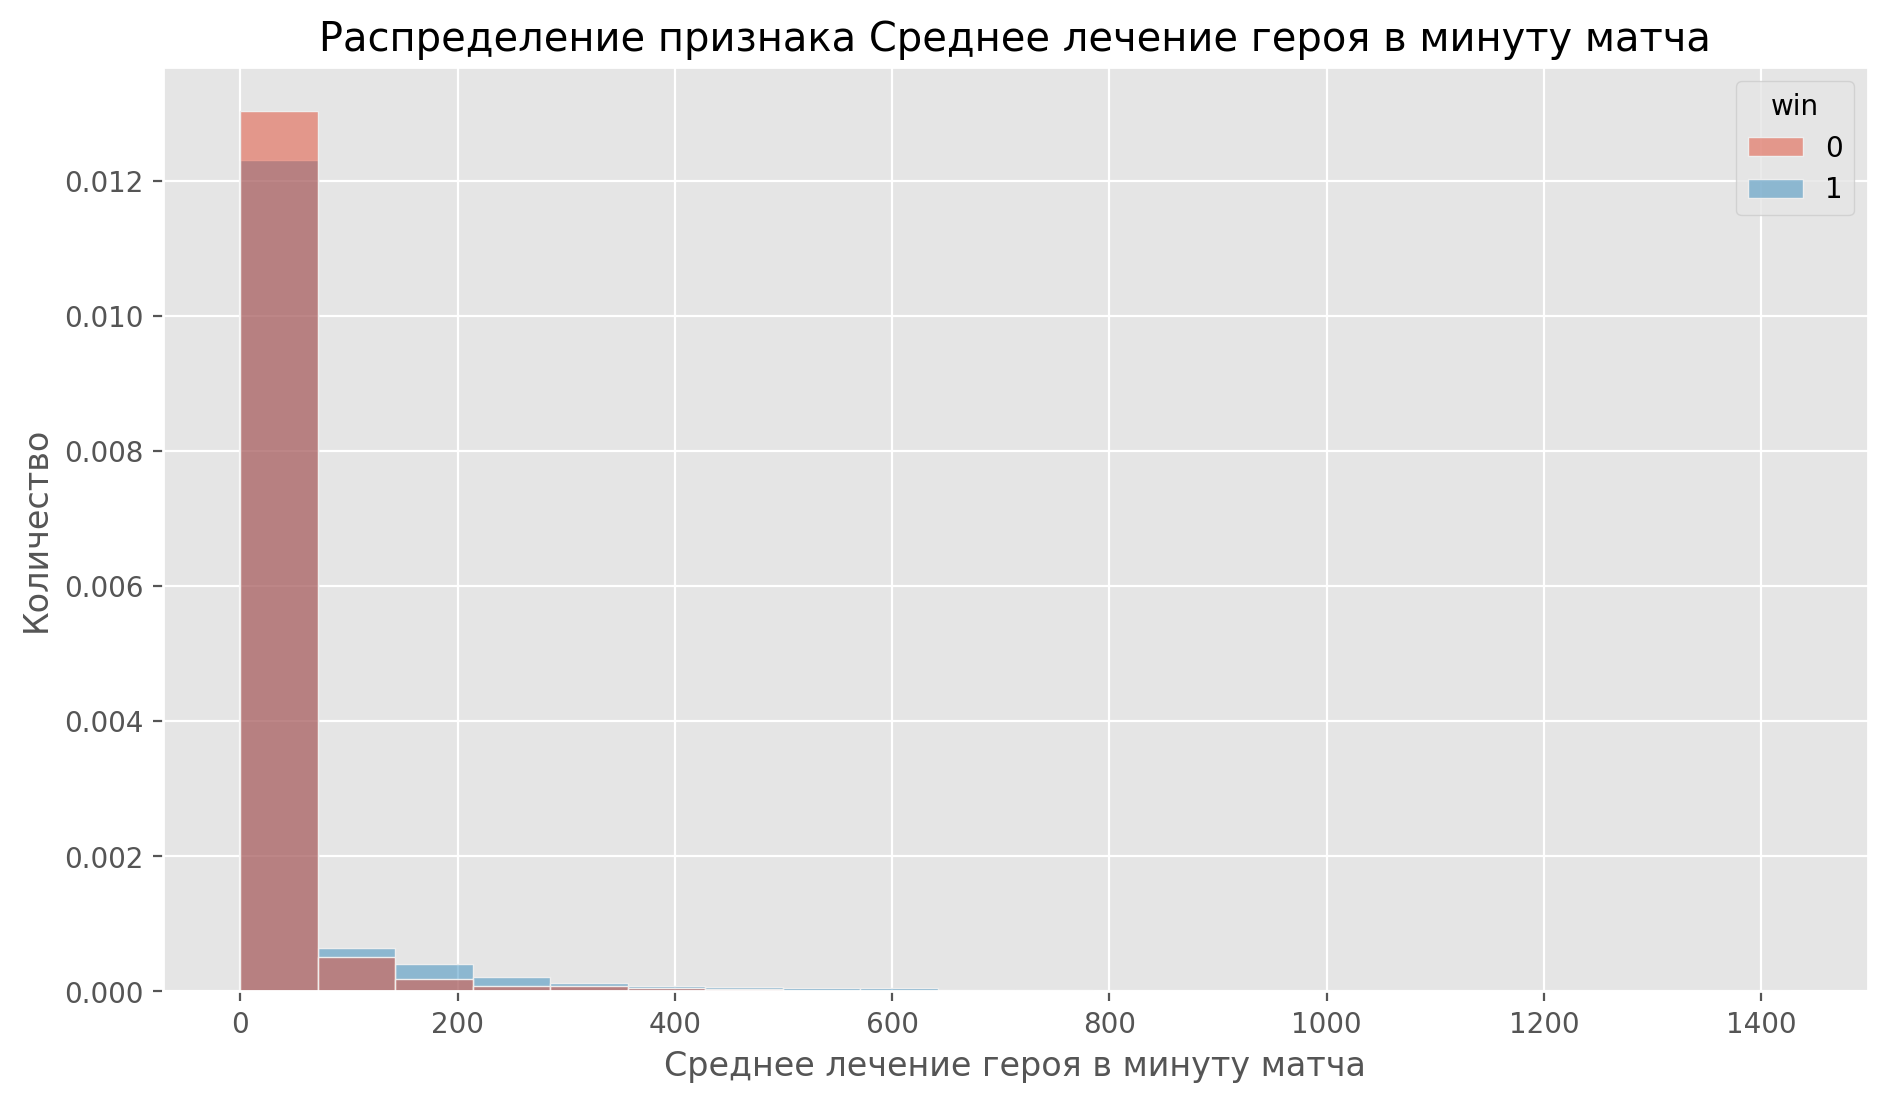

count    17896.000000
mean        25.313147
std         85.019439
min          0.000000
25%          0.000000
50%          0.000000
75%          4.157581
max       1427.106095
Name: hero_healing_per_min, dtype: float64


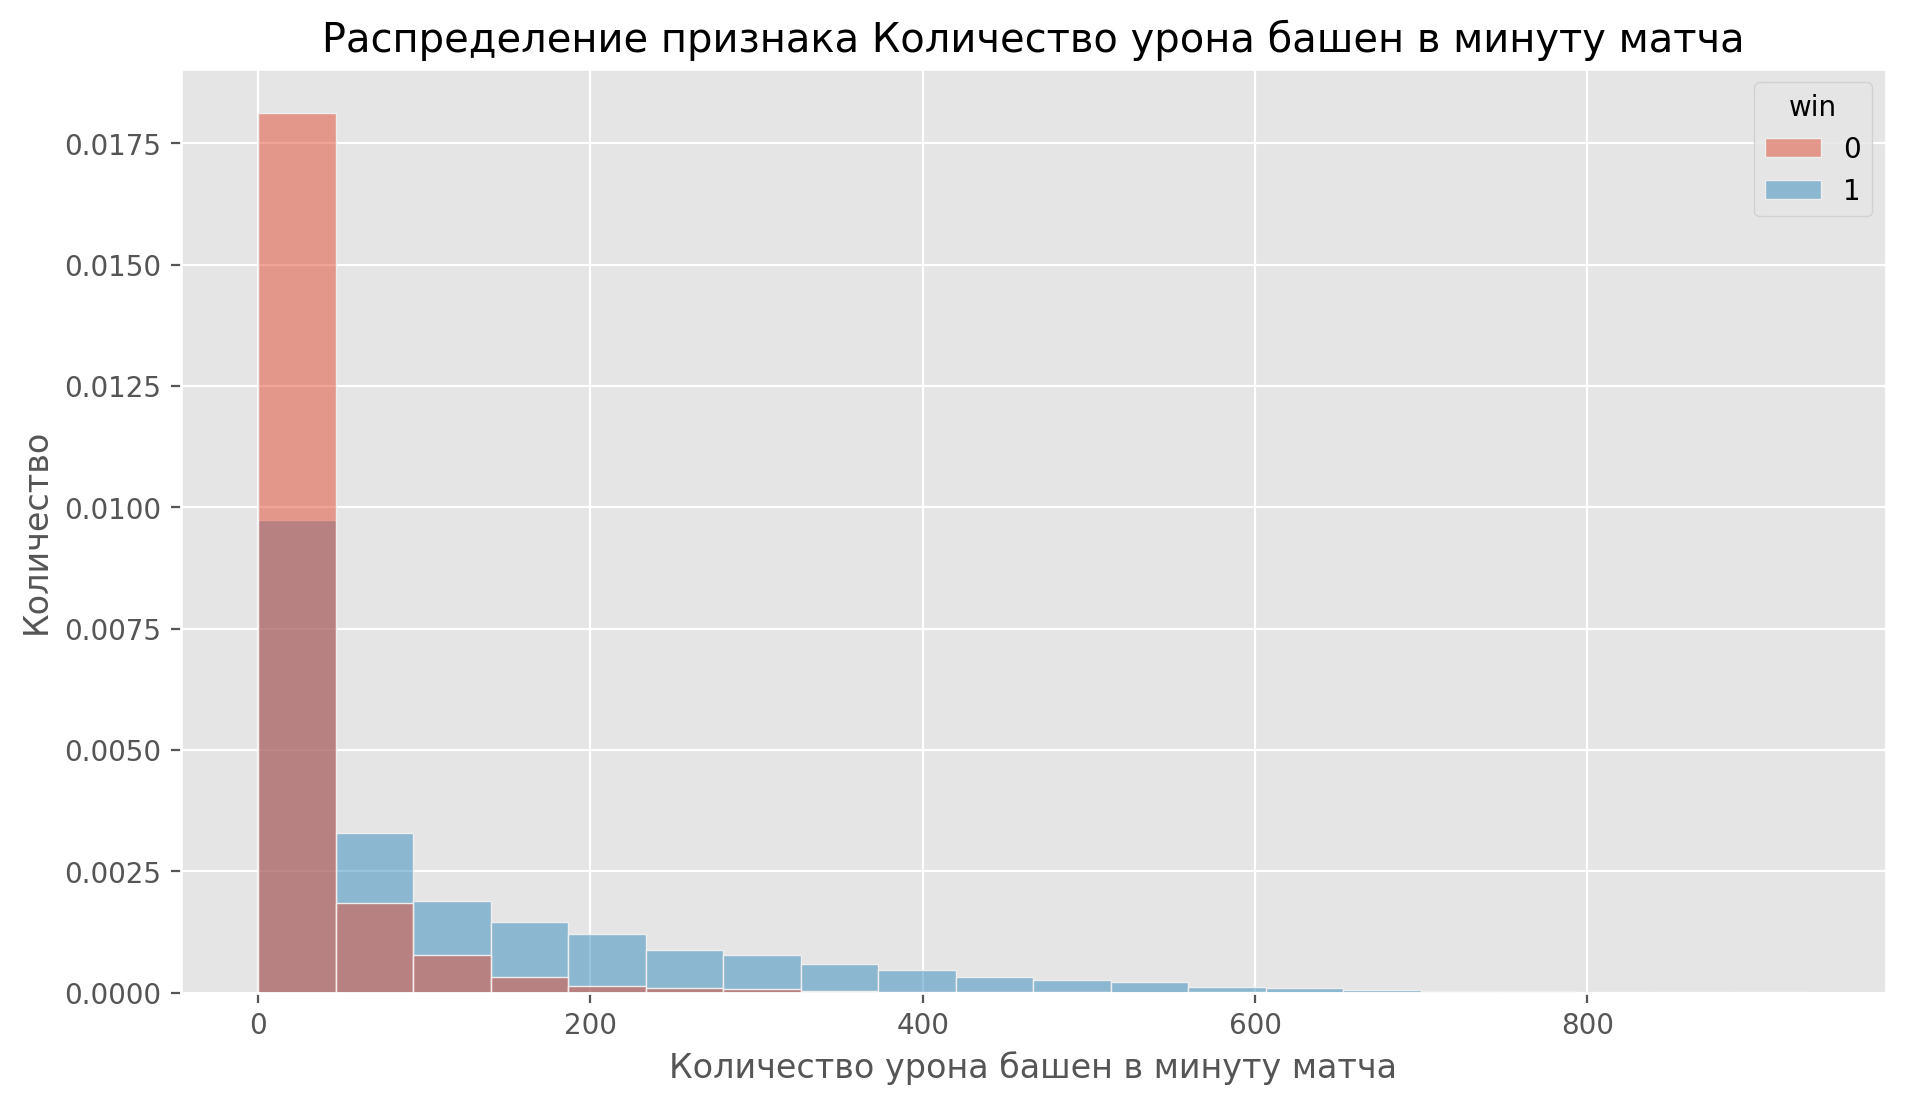

count    17896.000000
mean        72.367712
std        118.022377
min          0.000000
25%          3.259662
50%         22.177533
75%         82.068278
max        932.782258
Name: tower_damage_per_min, dtype: float64


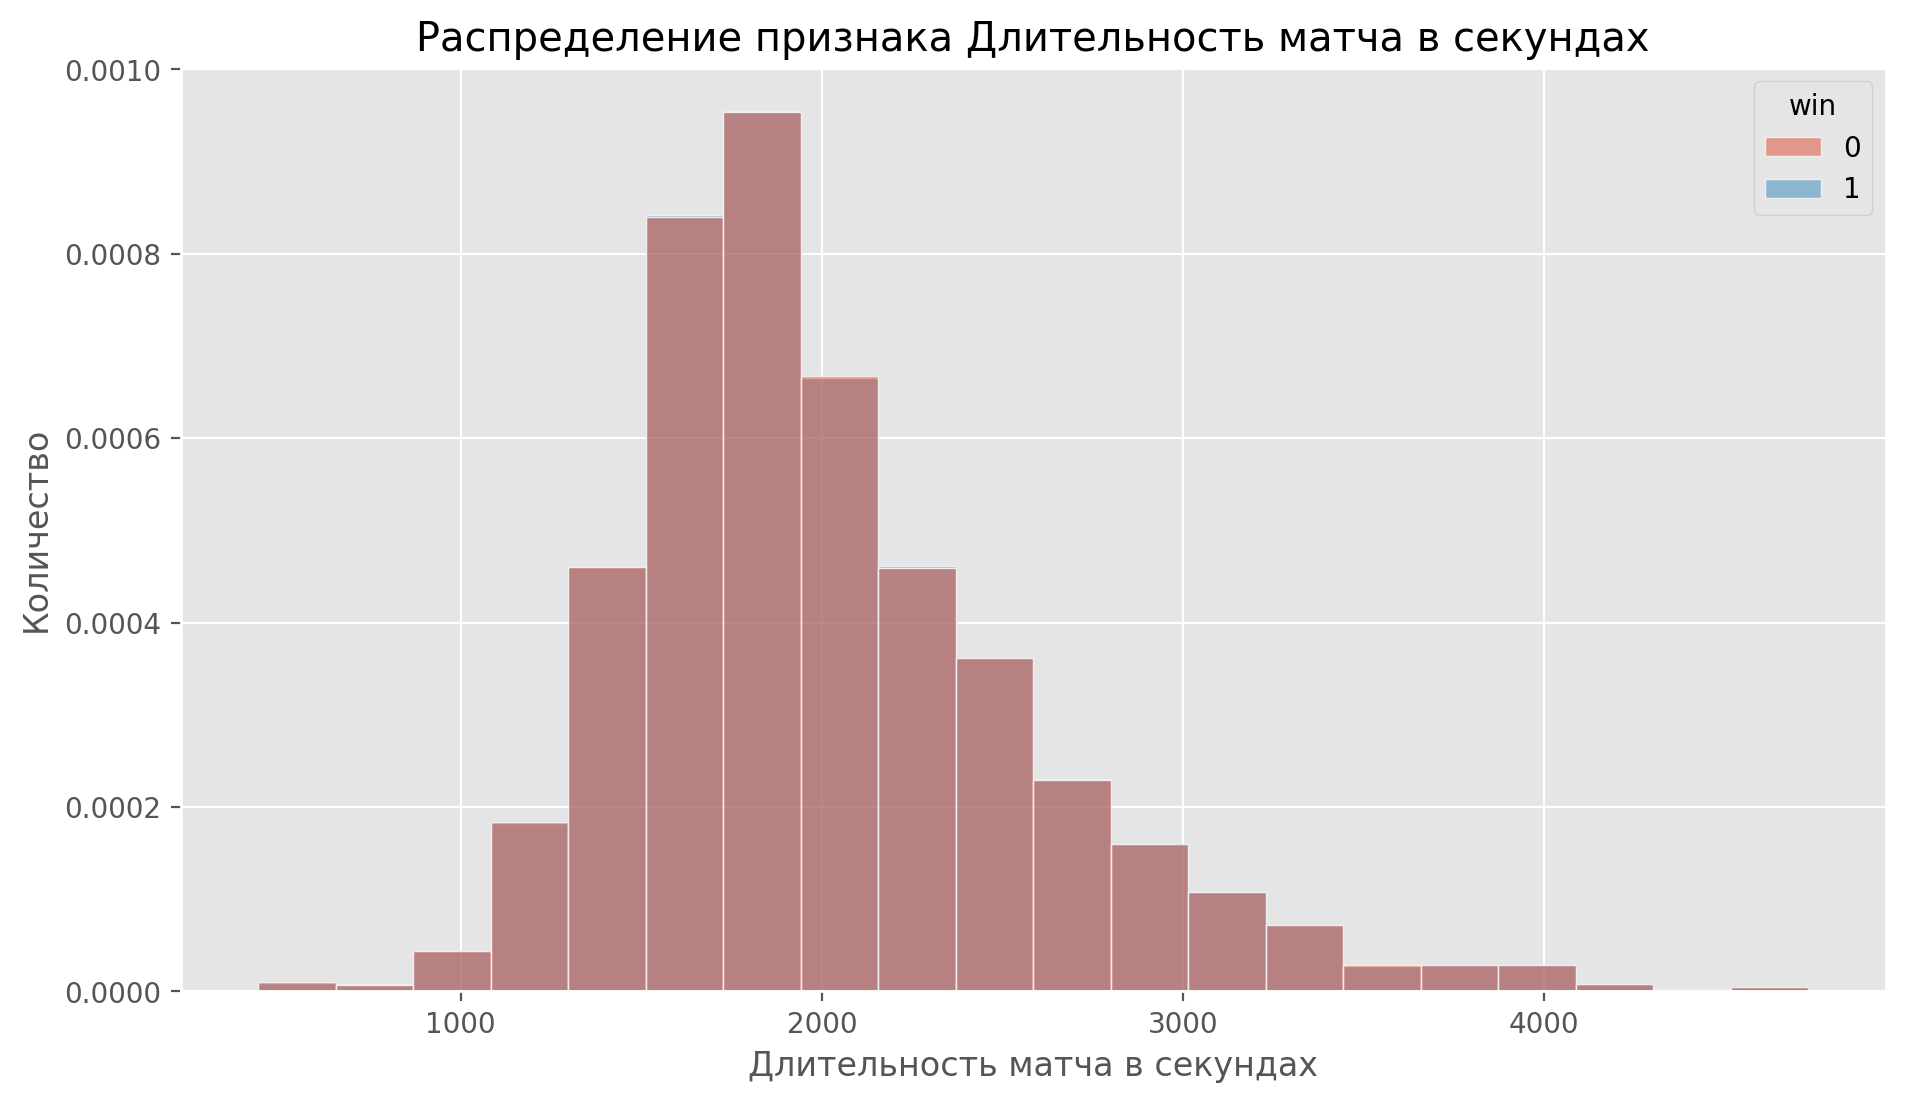

count    17896.000000
mean      2013.753353
std        563.339392
min        439.000000
25%       1637.000000
50%       1892.000000
75%       2287.000000
max       4730.000000
Name: duration, dtype: float64


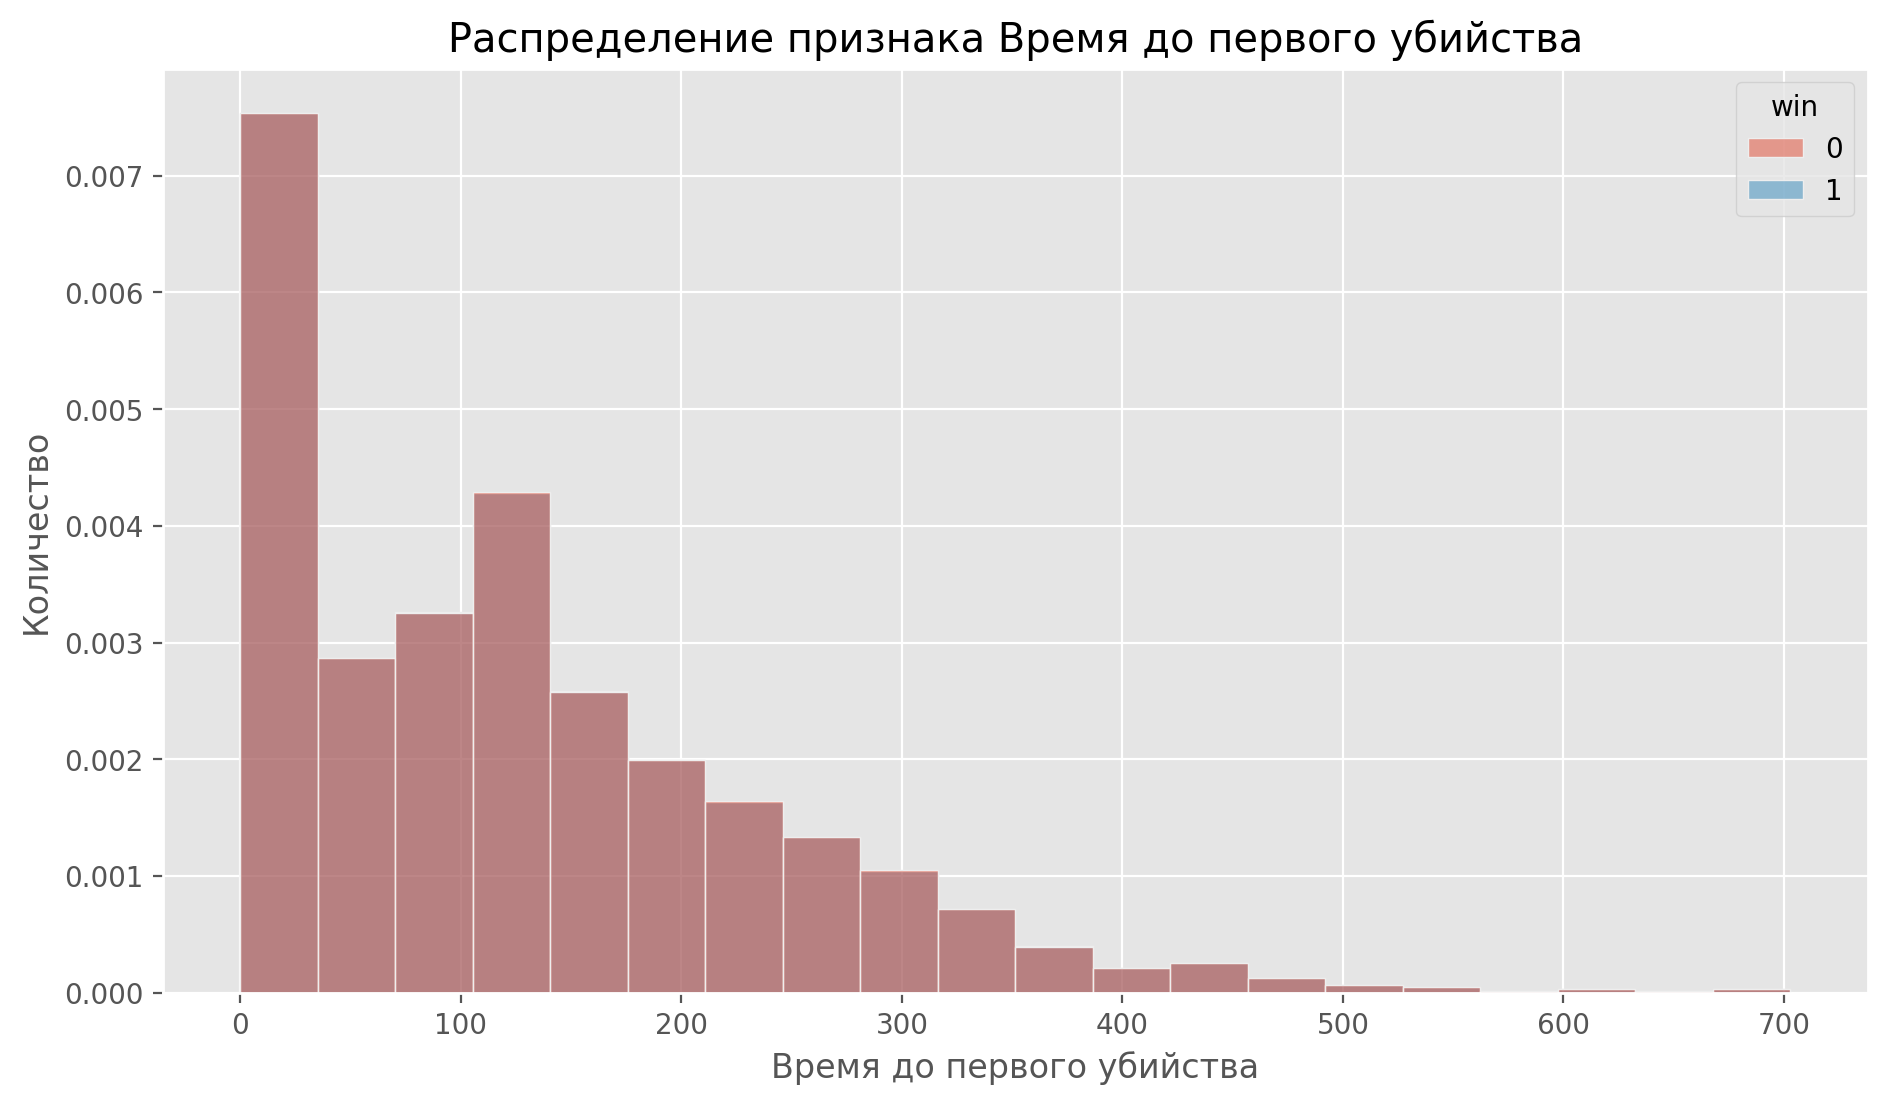

count    17896.000000
mean       126.235192
std        113.536452
min          0.000000
25%         23.000000
50%        110.000000
75%        189.000000
max        703.000000
Name: first_blood_time, dtype: float64


In [37]:
for i in range(len(num_col)):
    
    fig, axs = plt.subplots(figsize=(11, 6))
    sns.histplot(data=df, x= df[num_col[i]], hue="win", stat="density", common_norm=False, bins = 20)
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.ylabel("Количество")
    plt.xlabel(titles_num[i])
    plt.show()
    print(df[num_col[i]].describe())

In [38]:
#df = players[['assists', 'deaths', 'denies', 'gold_per_min','kills', 'xp_per_min','kills_per_min','hero_damage_per_min','win']]
#sns.pairplot(data = df, hue='win')


**Выводы**

Мы построили гистаграммы в разрезе побед и поражений и боксплоты для анализа числовых признаков. У каждого из признака есть выбросы, но они не критичны и вполне объясняемы спецификой данных. Также:

- Количество ассистов в матче — видим, что в среднем за матч игрок проводит 11.97 ассистов, с минимум близком к нулю и максимум 48. Игроки которые проводят менее 10 ассистов чаще всего проигрывают, .
- Количество смертей в матче -  в  среднем за матч игрок умирают 6 раз, с минимум близком к нулю и максимум 22. Игроки которые умирают менее 4 раз чаще всего выигрываю.
- Количество убитых союзных мобов - в среднем за матч игрок убивает приблизительно 6 союзных мобов, с минимум близком к нулю и максимум 54. Побеждают игроки которые убивают больше 10 союзных мобов.
- Количество золота - в среднем за минуту игрок получает 493.78
 золота, с минимум в 110 ед. и максимум 1151 ед. Побеждают игроки зарабатывающие от 300 до 400 ед. и свыше 600 ед.
- Количество убийств в матче - в среднем за матч игрок совершает приблизительно 6 убийств, с минимум близком к нулю и максимум 34 убийств. Побеждают игроки которые совершают больше 5 убийств.
- Количество опыта за минуту в матче - в среднем за минуту в матче игрок получает приблизительно 641.06 ед. опыта, с минимум близком 84 ед. и максимум 1782.00. Побеждают игроки которые получают больше 600 ед. опыта.
- Количество убийств за минуту матча - в среднем за минуту игрок совершает приблизительно  0.18 убийств, с минимум близком к нулю и максимум 1.34
 убийств. Побеждают игроки которые совершают больше 0.1 убийств.
- Количество последних ударов по мобам за минуту - в среднем за минуту совершается приблизительно  5.41 последних ударов, с минимум близком к нулю и максимум 22.08 ударов. Побеждают игроки которые совершают больше 6 ударов.
- Средний урон героя в минуту матча - в среднем за минуту игрок наносит 565.52 урона, с минимум в 25.46 ед. и максимум 2397.97 ед. Побеждают игроки которые наносят свыше 600 ед.
- Среднее лечение героя в минуту матча -  в среднем за минуту игрок лечится 25.31 раз, с минимум около нуля и максимум 1427.11 раз. Побеждают игроки которые лечатся свыше 100.
- Количество урона башен в минуту матча - в среднем за минуту башни наносят 72.37 ед., с минимум около нуля и максимум 932.78
ед. Побеждают игроки башни которых наносят свыше 50 ед.
- Длительность матча в секундах - в среднем матч длится около 2013 секунд, с минимум 439 и максимум 4730 секунд. Чаще всего побеждают игроки которые играют от 1200 до 1800 секунд.
- Время до первого убийства - в среднем проходит около 126 секунд до первого убийства, с минимум около 0 и максимум 703 секунды. Чаще всего проигравшие игроки первое убийство проводят вблизи минимума и судя по всему не всегда врага. Игроки одержавщие победу совершают первое убийство, чаще всего, в пределах 80-140 секунд.

**Изучим категориальные признаки**

In [39]:
#Категориальные признаки
cat_col = ['persona_name',  'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'is_radiant','radiant_win']
title_cat = ['имя',  'предмет 1', 'предмет 2', 'предмет 3', 'предмет 4', 'предмет 5', 'фракция', 'Какая фракция победила']

In [40]:
def bar_plot(df,col):
    plt.figure(figsize=(16,8))
    eplot=sns.barplot(data=df, x=col, y='percent', ci=None)
    for g in eplot.patches:
        eplot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

    plt.axhline(y=df['percent'].mean(), color='r', linestyle = '--')
    plt.title(f'Количество побед по признаку {col}')
    plt.xlabel(f' {col}')
    plt.ylabel('Количество побед')
    plt.show()

In [41]:
def p_bar(df,col):
    n_w = px.bar(df,
             x='sum',
             y=col,
             text='sum',
             color=col                   
            )

    n_w.update_layout(title=f'Количество побед в отношении признака {col}',
                   xaxis_title='Количество',
                   yaxis_title='Признак')
    n_w.show()

In [42]:
def obraz(df, col):
    data = df.pivot_table(index= col, values='win', aggfunc=['count','sum'])
    data.columns = data.columns.droplevel(level=1)
    data['percent'] = round(data['sum']/data['count']*100)
    data[col]=data.index
    data = data.sort_values( by='sum', ascending = False)
    data = data.head(20)
    display(data)
    p_bar(data, col)

In [43]:
def obraz_bi(df, col):
    data = df.pivot_table(index= col, values='win', aggfunc=['count','sum'])
    data.columns = data.columns.droplevel(level=1)
    data['percent'] = round(data['sum']/data['count']*100)
    data[col]=data.index
    data = data.sort_values( by='sum', ascending = False)
    data = data.head(20)
    display(data)
    bar_plot(data, col)

In [44]:
def obraz_bi_p(df, col):
    data = df.pivot_table(index= col, values='win', aggfunc=['count','sum'])
    data.columns = data.columns.droplevel(level=1)
    data['percent'] = round(data['sum']/data['count']*100)
    data[col]=data.index
    data = data.sort_values( by='percent', ascending = False)
    data = data.head(20)
    display(data)
    bar_plot(data, col)

In [45]:
obraz(df, 'persona_name')

count  sum  percent  \
persona_name                                            
if you not rank100dont talkto me    161  119     74.0   
Enma                                130   94     72.0   
satori                              126   94     75.0   
mitokiromi                          102   77     75.0   
casino                               87   62     71.0   
shiraga                             111   59     53.0   
//                                   99   54     55.0   
Yuui-                               101   53     52.0   
呪い.fumayoshi^_^                      91   53     58.0   
rubik>lion                          104   51     49.0   
StivN                                91   50     55.0   
Kayaru                               86   49     57.0   
PsiBlades                            87   49     56.0   
Bubiza                               87   49     56.0   
Drand                                87   49     56.0   
Tonyoka                              87   49     56.0   
ZodiAc!                              88   47     53.0   
Randing                              88   47     53.0   
Okoni                                88   47     53.0   
tinkywinky                           88   47     53.0   

                                                      persona_name  
persona_name                                                        
if you not rank100dont talkto me  if you not rank100dont talkto me  
Enma                                                          Enma  
satori                                                      satori  
mitokiromi                                              mitokiromi  
casino                                                      casino  
shiraga                                                    shiraga  
//                                                              //  
Yuui-                                                        Yuui-  
呪い.fumayoshi^_^                                    呪い.fumayoshi^_^  
rubik>lion                                              rubik>lion  
StivN                                                        StivN  
Kayaru                                                      Kayaru  
PsiBlades                                                PsiBlades  
Bubiza                                                      Bubiza  
Drand                                                        Drand  
Tonyoka                                                    Tonyoka  
ZodiAc!                                                    ZodiAc!  
Randing                                                    Randing  
Okoni                                                        Okoni  
tinkywinky                                              tinkywinky

In [46]:
obraz(df, 'item_1')

count  sum  percent                     item_1
item_1                                                                   
Blink Dagger                1406  684     49.0               Blink Dagger
Magic Wand                  1335  600     45.0                 Magic Wand
Power Treads                 925  481     52.0               Power Treads
Arcane Boots                 800  395     49.0               Arcane Boots
Black King Bar               664  351     53.0             Black King Bar
Phase Boots                  581  277     48.0                Phase Boots
Unknown Item                 571  273     48.0               Unknown Item
Manta Style                  480  257     54.0                Manta Style
Aghanim's Scepter            483  249     52.0          Aghanim's Scepter
Glimmer Cape                 403  229     57.0               Glimmer Cape
Eul's Scepter of Divinity    386  202     52.0  Eul's Scepter of Divinity
Force Staff                  371  197     53.0                Force Staff
Gleipnir                     316  178     56.0                   Gleipnir
Blade Mail                   286  151     53.0                 Blade Mail
Hurricane Pike               243  151     62.0             Hurricane Pike
Shiva's Guard                191  130     68.0              Shiva's Guard
Armlet of Mordiggian         206  120     58.0       Armlet of Mordiggian
Magic Stick                  248  118     48.0                Magic Stick
Bracer                       281  113     40.0                     Bracer
Observer and Sentry Wards    255  110     43.0  Observer and Sentry Wards

In [47]:
obraz(df, 'item_2')

count  sum  percent                     item_2
item_2                                                                   
Magic Wand                  1738  820     47.0                 Magic Wand
Blink Dagger                1417  717     51.0               Blink Dagger
Black King Bar               994  526     53.0             Black King Bar
Power Treads                 721  363     50.0               Power Treads
Manta Style                  648  356     55.0                Manta Style
Unknown Item                 686  323     47.0               Unknown Item
Arcane Boots                 606  309     51.0               Arcane Boots
Aghanim's Scepter            414  239     58.0          Aghanim's Scepter
Phase Boots                  435  210     48.0                Phase Boots
Force Staff                  318  172     54.0                Force Staff
Bracer                       378  161     43.0                     Bracer
Eul's Scepter of Divinity    318  160     50.0  Eul's Scepter of Divinity
Glimmer Cape                 257  131     51.0               Glimmer Cape
Bottle                       290  124     43.0                     Bottle
Hurricane Pike               221  124     56.0             Hurricane Pike
Observer and Sentry Wards    315  121     38.0  Observer and Sentry Wards
Dust of Appearance           264  109     41.0         Dust of Appearance
Aether Lens                  181  104     57.0                Aether Lens
Gleipnir                     181  104     57.0                   Gleipnir
Shiva's Guard                168  100     60.0              Shiva's Guard

In [48]:
obraz(df, 'item_3')

count  sum  percent                     item_3
item_3                                                                   
Magic Wand                  1193  571     48.0                 Magic Wand
Power Treads                1172  523     45.0               Power Treads
Blink Dagger                 909  498     55.0               Blink Dagger
Arcane Boots                 931  430     46.0               Arcane Boots
Unknown Item                 906  421     46.0               Unknown Item
Black King Bar               707  393     56.0             Black King Bar
Aghanim's Scepter            602  348     58.0          Aghanim's Scepter
Phase Boots                  643  327     51.0                Phase Boots
Bracer                       478  220     46.0                     Bracer
Aether Lens                  245  145     59.0                Aether Lens
Wraith Band                  316  130     41.0                Wraith Band
Manta Style                  263  129     49.0                Manta Style
Observer and Sentry Wards    326  126     39.0  Observer and Sentry Wards
Null Talisman                247  122     49.0              Null Talisman
Tranquil Boots               255  122     48.0             Tranquil Boots
Kaya and Sange               185  121     65.0             Kaya and Sange
Wind Lace                    271  113     42.0                  Wind Lace
Force Staff                  203  109     54.0                Force Staff
Dust of Appearance           256  108     42.0         Dust of Appearance
Smoke of Deceit              217  108     50.0            Smoke of Deceit

In [49]:
obraz(df, 'item_4')

count  sum  percent              item_4
item_4                                                     
Magic Wand           1341  640     48.0          Magic Wand
Unknown Item         1271  566     45.0        Unknown Item
Aghanim's Scepter     735  421     57.0   Aghanim's Scepter
Black King Bar        765  414     54.0      Black King Bar
Arcane Boots          806  408     51.0        Arcane Boots
Bracer                722  308     43.0              Bracer
Power Treads          511  250     49.0        Power Treads
Wraith Band           430  171     40.0         Wraith Band
Aether Lens           288  170     59.0         Aether Lens
Kaya and Sange        292  163     56.0      Kaya and Sange
Null Talisman         362  160     44.0       Null Talisman
Blink Dagger          290  159     55.0        Blink Dagger
Wind Lace             370  157     42.0           Wind Lace
Manta Style           292  150     51.0         Manta Style
Octarine Core         218  146     67.0       Octarine Core
Tranquil Boots        261  127     49.0      Tranquil Boots
Khanda                194  122     63.0              Khanda
Dust of Appearance    254  108     43.0  Dust of Appearance
Boots of Travel       170  101     59.0     Boots of Travel
Gem of True Sight     106   99     93.0   Gem of True Sight

In [50]:
obraz(df, 'item_5')

count  sum  percent              item_5
item_5                                                     
Unknown Item         1832  834     46.0        Unknown Item
Magic Wand           1139  559     49.0          Magic Wand
Aghanim's Scepter     786  477     61.0   Aghanim's Scepter
Bracer                776  355     46.0              Bracer
Blink Dagger          579  336     58.0        Blink Dagger
Black King Bar        506  281     56.0      Black King Bar
Arcane Boots          512  278     54.0        Arcane Boots
Wraith Band           463  207     45.0         Wraith Band
Aether Lens           335  206     61.0         Aether Lens
Null Talisman         433  198     46.0       Null Talisman
Kaya and Sange        299  179     60.0      Kaya and Sange
Wind Lace             392  169     43.0           Wind Lace
Power Treads          352  167     47.0        Power Treads
Tranquil Boots        311  163     52.0      Tranquil Boots
Octarine Core         231  153     66.0       Octarine Core
Khanda                244  136     56.0              Khanda
Daedalus              210  130     62.0            Daedalus
Smoke of Deceit       281  117     42.0     Smoke of Deceit
Iron Branch           299  114     38.0         Iron Branch
Dust of Appearance    250  109     44.0  Dust of Appearance

count   sum  percent  is_radiant
is_radiant                                  
True         8952  4541     51.0        True
False        8944  4410     49.0       False

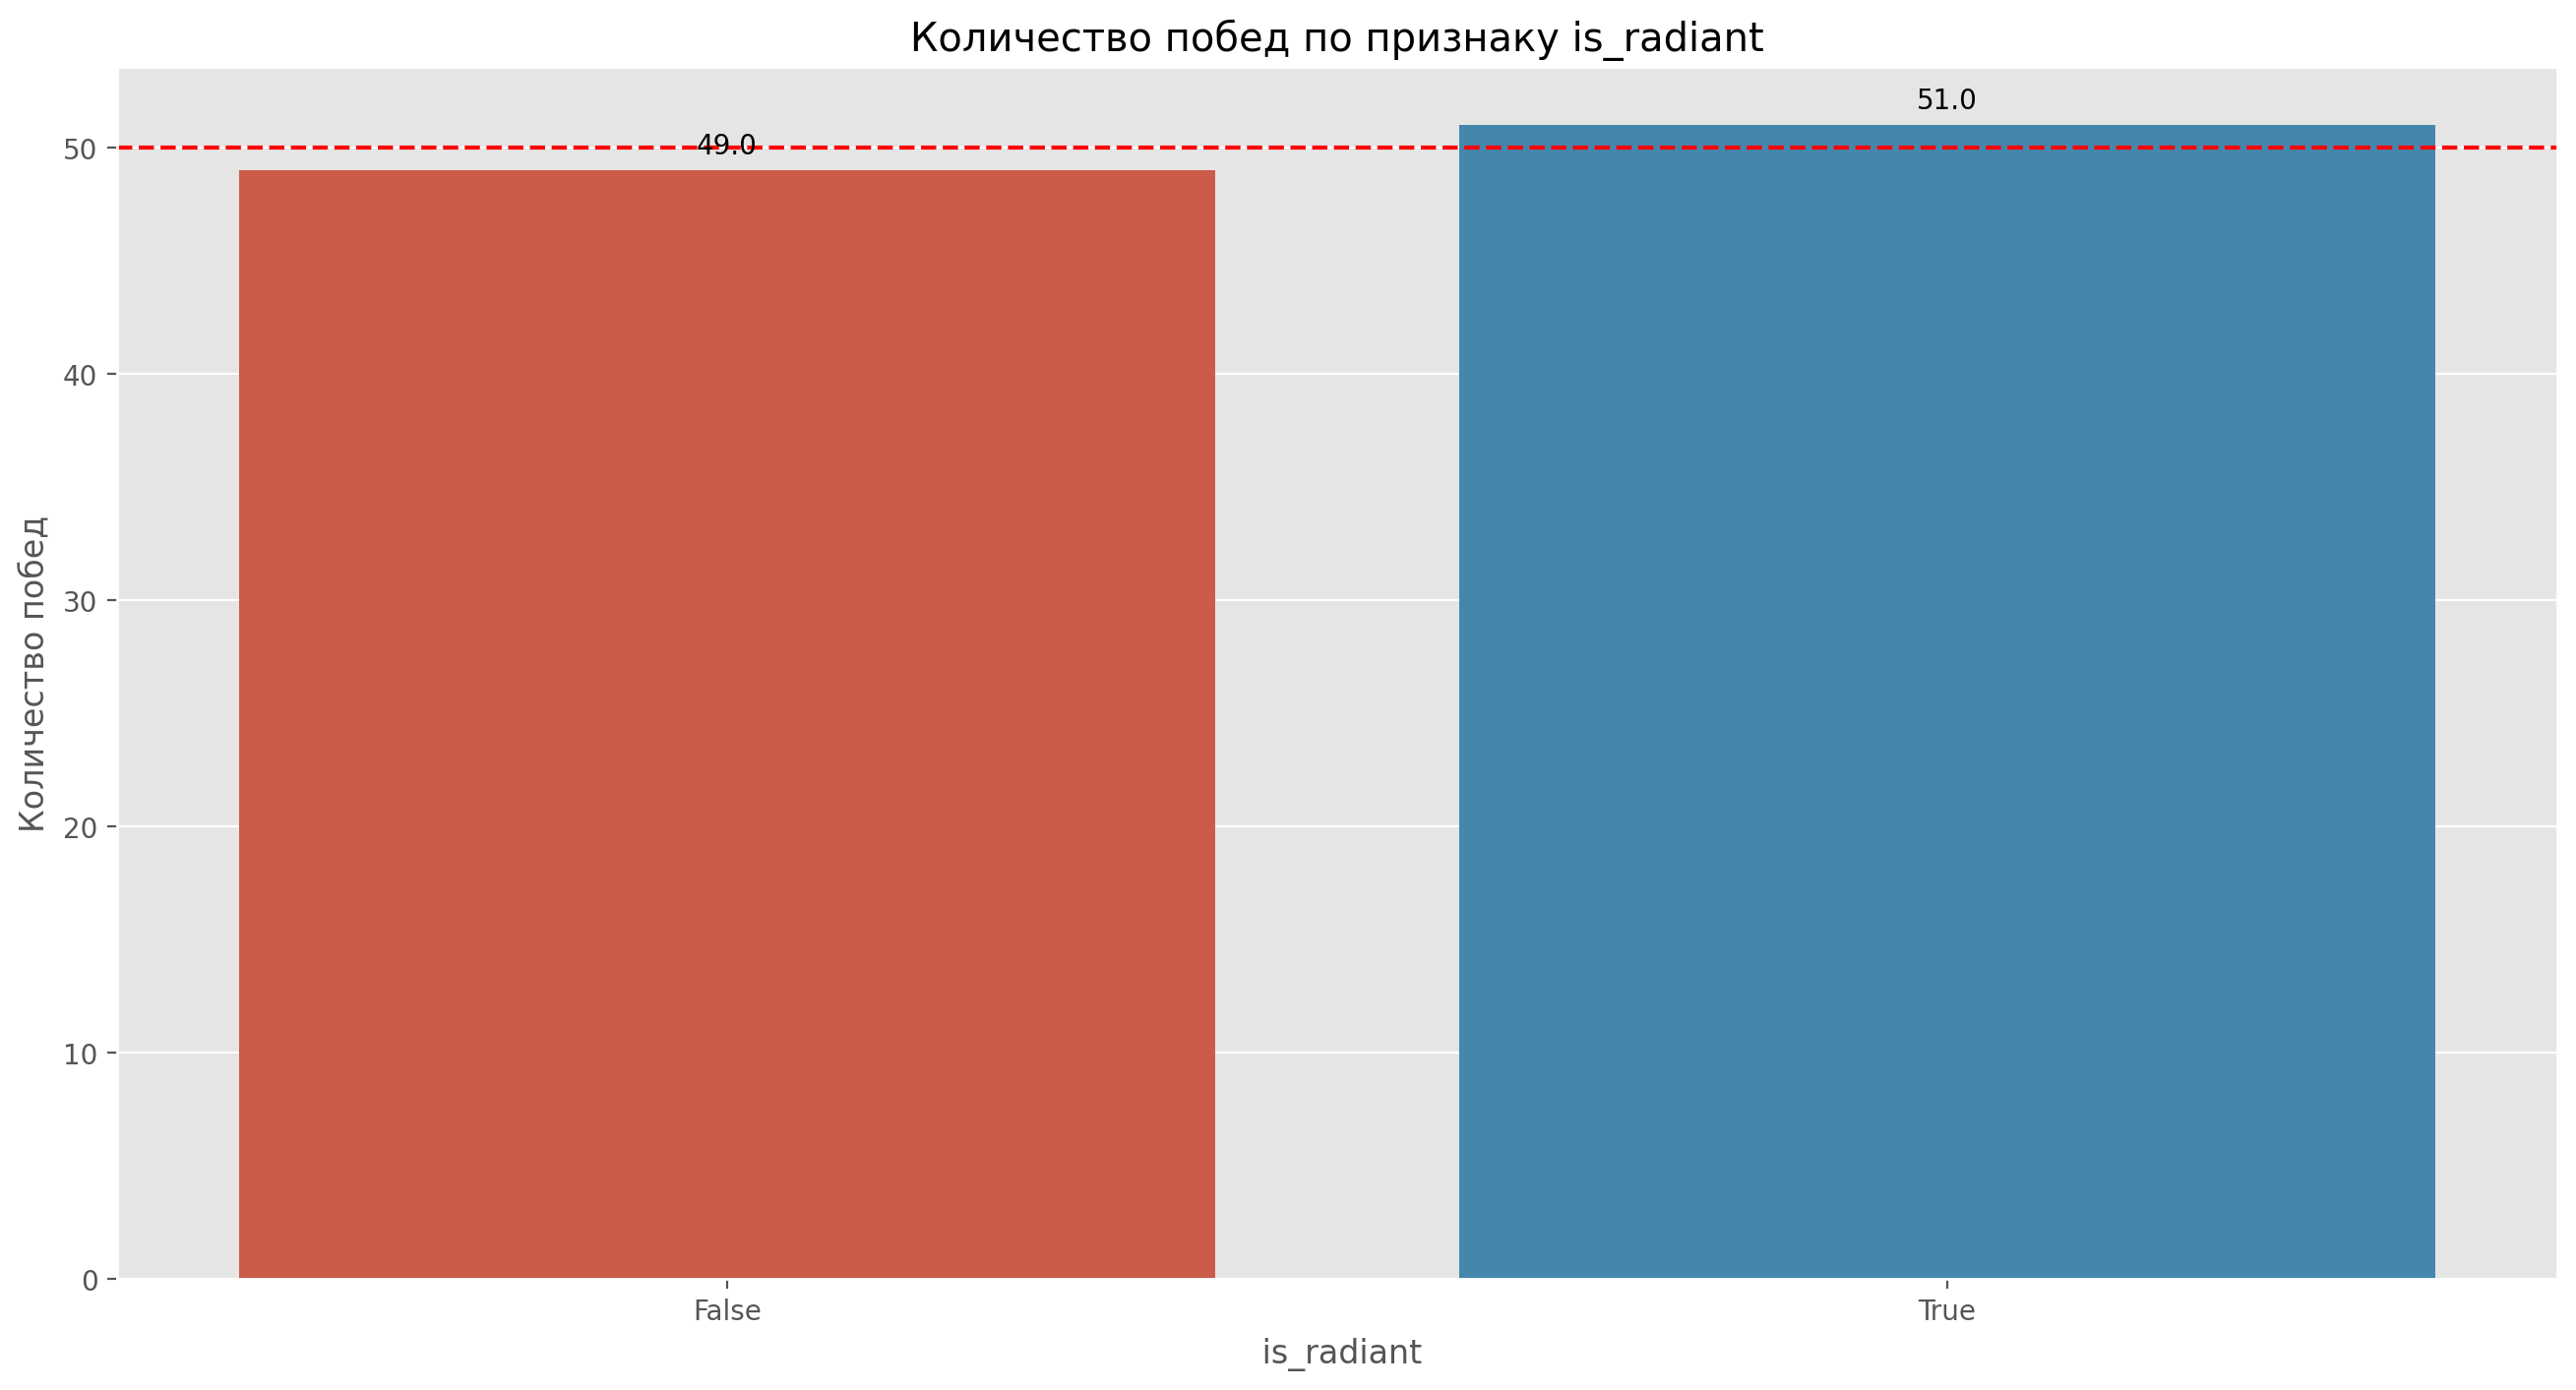

In [51]:
obraz_bi(df, 'is_radiant')

count   sum  percent  radiant_win
radiant_win                                   
1             9075  4541     50.0            1
0             8821  4410     50.0            0

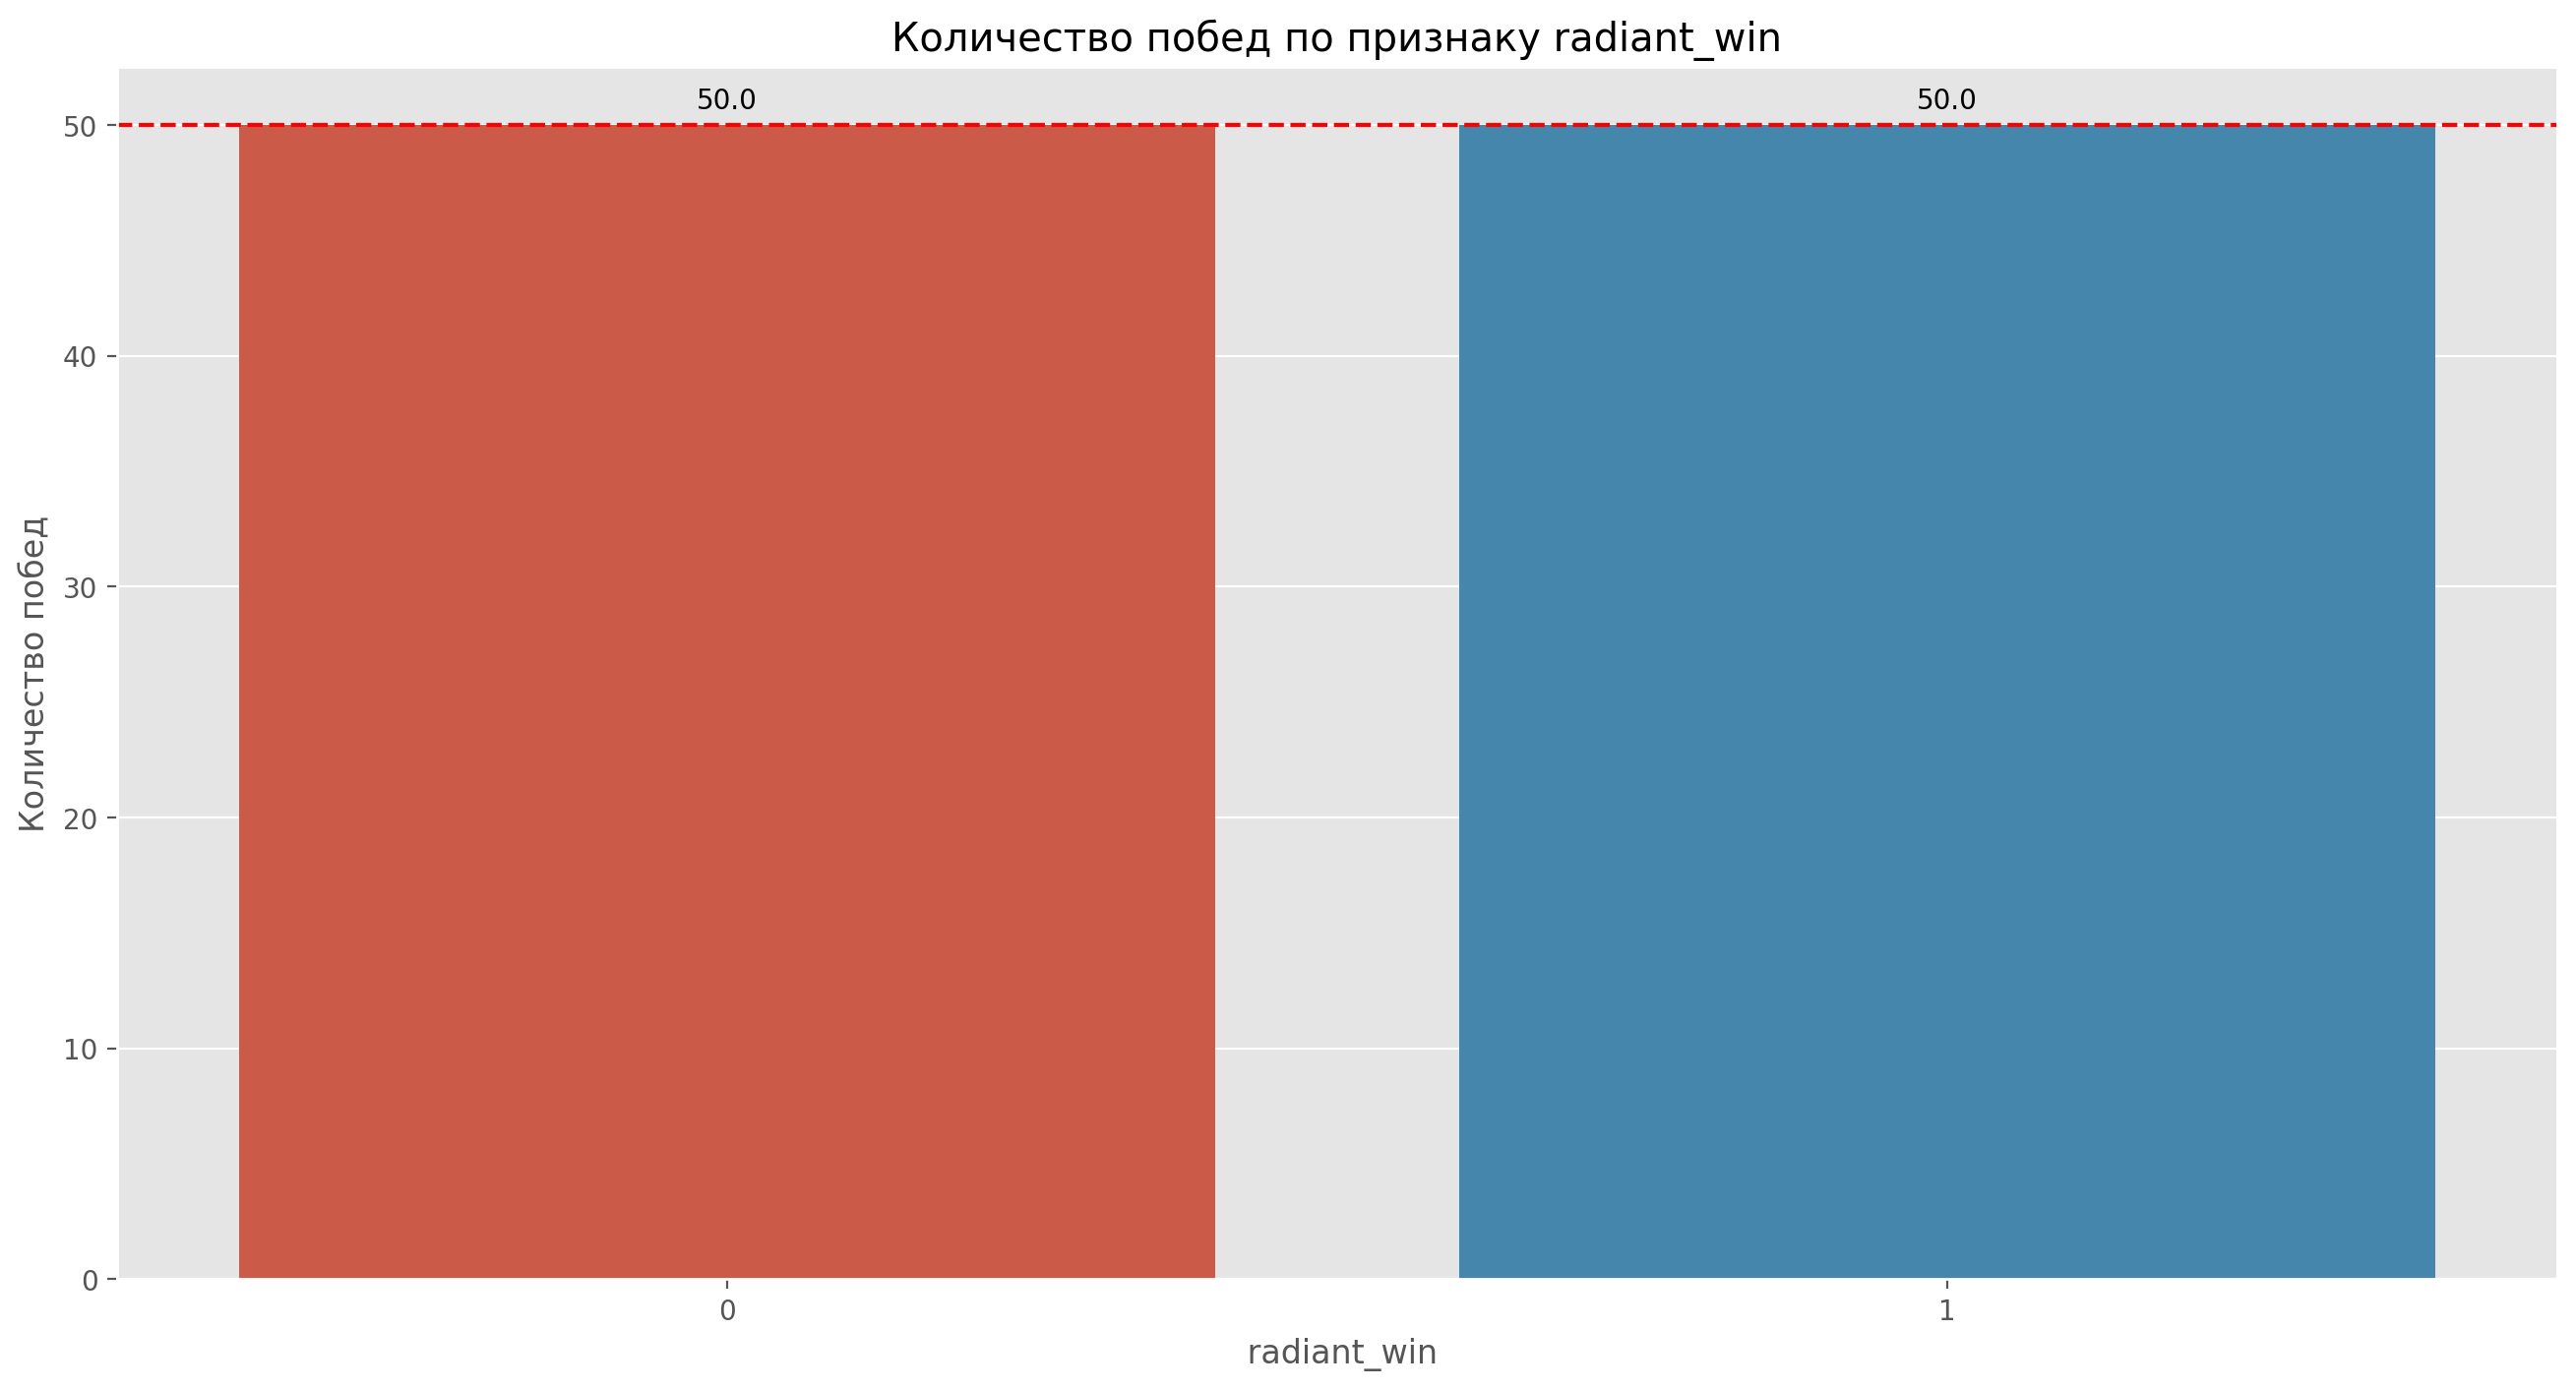

In [52]:
obraz_bi(df, 'radiant_win')

**Выводы**

Провели анализ категориальных признаков в разрезе побед/поражений. И получили следующие результаты:
1. По признаку 'persona_name':
- больше всего побед в числовом выражении у игрока «if you not rank100dont talkto me» - 119 побед, в процентном соотношении — 74%; на втором месте «Enma» - 94 побед и 72%;
на третьем «satori» -  тоже 94 побед с процентом повыше — 75%.

2. По признаку 'item_1':
- Чаще всего, как первый предмет экипировки,  игроки одержавшие большие число побед использовали
Blink Dagger — 684 побед с 49 % побед. Есть предметы которые дают процент побед выше, но их использовали 1-2 раза, и этот показатель не информативен; 
- далее предмет Magic Wand — 600 побед с 45%;
- на третьем месте Power Treads -481 победа с 52%.

3. По признаку 'item_2':
- Чаще всего, как второй предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 820 побед с 47 % побед. 
- на втором предмет Blink Dagger  — 717 побед с 51%.
- предмет Black King Bar  -526 победа с 53%.

4. По признаку 'item_3':
- Чаще всего, как третий предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 571 победа с 48 % побед. 
- на втором предмет Power Treads — 523 побед с 45 %.
- на третьем месте  предмет Blink Dagger  -498 победа с 55 %.

5. По признаку 'item_4':
- Чаще всего, как четвертый предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 640 победа с 48 % побед. 
- на втором  предмет Unknown Item  — 566 побед с 45 %.
- на третьем месте  предмет Aghanim's Scepter  -421 победа с 57 %.

6. По признаку 'item_5':
- Чаще всего, как пятый предмет экипировки,  игроки одержавшие большие число побед использовали
Unknown Item — 834 победа с 46 % побед. 
- на втором предмет Magic Wand   — 566 побед с 49 %.
- на третьем месте  предмет Aghanim's Scepter  -477 победа с 61 %.

7. По признаку 'is_radiant':
- Светлая фракция — использовали - 8952 раз, одержала 4541 побед, в процентном выражении — 51%.
- Тёмная фракция — использовали - 8944 раз, одержала 4410 побед, в процентном выражении — 49%.

8. По признаку 'radiant_win':
- Количество побед составляет 50%.

Анализируя эти показатели можем сделать вывод о предпочтении игроков предмета Magic Wand , который используют во всех позициях и везде он входит в топ 3, а также о преференции игроков светлой фракции.

###  Исследовательский анализ heroes

In [53]:
data = heroes.merge(players, on='index', how='left')
data.head()

index   id localized_name attack_type primary_attr  \
0      0  123       Hoodwink      Ranged          agi   
1      1   86         Rubick      Ranged          int   
2      2   52        Leshrac      Ranged          int   
3      3   51      Clockwerk       Melee          all   
4      4   88   Nyx Assassin       Melee          all   

                                                 roles  base_health  \
0           ['Support', 'Nuker', 'Escape', 'Disabler']          120   
1                     ['Support', 'Disabler', 'Nuker']          120   
2  ['Carry', 'Support', 'Nuker', 'Pusher', 'Disabler']          120   
3        ['Initiator', 'Disabler', 'Durable', 'Nuker']          120   
4         ['Disabler', 'Nuker', 'Initiator', 'Escape']          120   

   base_health_regen  base_mana  base_mana_regen  ...                 item_5  \
0               0.25         75              0.0  ...               Mjollnir   
1               0.25         75              0.5  ...             Phylactery   
2               0.25         75              0.0  ...  Aegis of the Immortal   
3               0.50         75              0.0  ...           Arcane Boots   
4               2.00         75              0.0  ...           Unknown Item   

   kills  xp_per_min  is_radiant  win  kills_per_min  last_hits_per_min  \
0    6.0       696.0        True  1.0       0.195334           9.050461   
1    9.0       611.0        True  1.0       0.293001           6.348345   
2    4.0       608.0        True  1.0       0.130222           7.357569   
3    5.0       463.0        True  1.0       0.162778           3.516007   
4    5.0       417.0        True  1.0       0.162778           2.278893   

   hero_damage_per_min  hero_healing_per_min  tower_damage_per_min  
0           585.545307              0.000000            304.069452  
1           622.333152              0.000000             41.280521  
2           478.567553              0.000000            209.169832  
3           313.640803              4.069452             45.968530  
4           521.345632              0.000000             15.496473  

[5 rows x 54 columns]

In [54]:
data = data.drop(['match_id', 'player_slot', 'steam_id', 'persona_name',
       'assists', 'deaths', 'denies', 'gold_per_min', 'hero_id', 'item_0',
       'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'kills', 'xp_per_min',
       'is_radiant', 'kills_per_min', 'last_hits_per_min',
       'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min'], axis=1)
descr(data)

index   id localized_name attack_type primary_attr  \
0      0  123       Hoodwink      Ranged          agi   
1      1   86         Rubick      Ranged          int   
2      2   52        Leshrac      Ranged          int   
3      3   51      Clockwerk       Melee          all   
4      4   88   Nyx Assassin       Melee          all   

                                                 roles  base_health  \
0           ['Support', 'Nuker', 'Escape', 'Disabler']          120   
1                     ['Support', 'Disabler', 'Nuker']          120   
2  ['Carry', 'Support', 'Nuker', 'Pusher', 'Disabler']          120   
3        ['Initiator', 'Disabler', 'Durable', 'Nuker']          120   
4         ['Disabler', 'Nuker', 'Initiator', 'Escape']          120   

   base_health_regen  base_mana  base_mana_regen  ...  projectile_speed  \
0               0.25         75              0.0  ...              1800   
1               0.25         75              0.5  ...              1125   
2               0.25         75              0.0  ...               900   
3               0.50         75              0.0  ...               900   
4               2.00         75              0.0  ...               900   

   attack_rate  base_attack_time  attack_point  move_speed  cm_enabled  legs  \
0          2.0               100          0.40         310        True     4   
1          1.7               100          0.40         290        True     2   
2          1.7               100          0.40         325        True     4   
3          1.7               100          0.33         310        True     2   
4          1.7               100          0.46         310        True     6   

   day_vision  night_vision  win  
0        1800           800  1.0  
1        1800           800  1.0  
2        1800           800  1.0  
3        1800           800  1.0  
4        1800           800  1.0  

[5 rows x 31 columns]

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18020 entries, 0 to 18019
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18020 non-null  int64  
 1   id                 18020 non-null  int64  
 2   localized_name     18020 non-null  object 
 3   attack_type        18020 non-null  object 
 4   primary_attr       18020 non-null  object 
 5   roles              18020 non-null  object 
 6   base_health        18020 non-null  int64  
 7   base_health_regen  18020 non-null  float64
 8   base_mana          18020 non-null  int64  
 9   base_mana_regen    18020 non-null  float64
 10  base_armor         18020 non-null  float64
 11  base_mr            18020 non-null  int64  
 12  base_attack_min    18020 non-null  int64  
 13  base_attack_max    18020 non-null  int64  
 14  base_str    

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  index                  0
id                     0
localized_name         0
attack_type            0
primary_attr           0
roles                  0
base_health            0
base_health_regen      0
base_mana              0
base_mana_regen        0
base_armor             0
base_mr                0
base_attack_min        0
base_attack_max        0
base_str               0
base_agi               0
base_int               0
str_gain               0
agi_gain               0
int_gain               0
attack_range           0
projectile_speed       0
attack_rate            0
base_attack_time       0
attack_point           0
move_speed             0
cm_enabled             0
legs                   0
day_vision             0
night_vision   

index            id  base_health  base_health_regen  \
count  18020.000000  18020.000000      18020.0       18020.000000   
mean    9009.500000     61.572420        120.0           0.618049   
std     5202.070261     38.554475          0.0           0.733725   
min        0.000000      1.000000        120.0          -0.250000   
25%     4504.750000     23.000000        120.0           0.250000   
50%     9009.500000     58.000000        120.0           0.250000   
75%    13514.250000     94.000000        120.0           0.750000   
max    18019.000000    138.000000        120.0           5.000000   

          base_mana  base_mana_regen    base_armor  base_mr  base_attack_min  \
count  18020.000000     18020.000000  18020.000000  18020.0     18020.000000   
mean      75.524417         0.136029      0.524223     25.0        21.803219   
std        4.829602         0.231943      1.303380      0.0        11.706168   
min       75.000000         0.000000     -3.000000     25.0        -5.000000   
25%       75.000000         0.000000      0.000000     25.0         9.000000   
50%       75.000000         0.000000      0.000000     25.0        26.000000   
75%       75.000000         0.250000      1.000000     25.0        30.000000   
max      120.000000         1.000000      5.000000     25.0        60.000000   

       base_attack_max  ...  attack_range  projectile_speed   attack_rate  \
count     18020.000000  ...  18020.000000      18020.000000  18020.000000   
mean         28.146448  ...    361.667314       1013.564095      1.694967   
std          12.229525  ...    193.585238        488.341320      0.087695   
min          -1.000000  ...    150.000000          0.000000      1.400000   
25%          18.000000  ...    150.000000        900.000000      1.700000   
50%          32.000000  ...    365.000000        900.000000      1.700000   
75%          36.000000  ...    550.000000       1125.000000      1.700000   
max          68.000000  ...    700.000000       3000.000000      2.000000   

       base_attack_time  attack_point    move_speed          legs  \
count      18020.000000  18020.000000  18020.000000  18020.000000   
mean         101.242786      0.396222    300.912597      2.082464   
std            6.818518      0.092056     14.552956      1.059668   
min           90.000000      0.170000    275.000000      0.000000   
25%          100.000000      0.330000    290.000000      2.000000   
50%          100.000000      0.400000    300.000000      2.000000   
75%          100.000000      0.460000    315.000000      2.000000   
max          125.000000      0.650000    330.000000      8.000000   

         day_vision  night_vision           win  
count  18020.000000  18020.000000  17896.000000  
mean    1794.728080    819.156493      0.500168  
std       58.515957    114.372355      0.500014  
min      800.000000    800.000000      0.000000  
25%     1800.000000    800.000000      0.000000  
50%     1800.000000    800.000000      1.000000  
75%     1800.000000    800.000000      1.000000  
max     1800.000000   1800.000000      1.000000  

[8 rows x 26 columns]

---------------------------------------------------------------------------------------------------------
Размер: (18020, 31)
---------------------------------------------------------------------------------------------------------
Признаки: Index(['index', 'id', 'localized_name', 'attack_type', 'primary_attr', 'roles',
       'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen',
       'base_armor', 'base_mr', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed', 'cm_enabled', 'legs', 'day_vision',
       'night_vision', 'win'],
      dtype='object')


In [55]:
n_col = []

for col in data:
    if data[col].dtype in ['int64', 'float64']:
        n_col.append(col)
n_col

['index',
 'id',
 'base_health',
 'base_health_regen',
 'base_mana',
 'base_mana_regen',
 'base_armor',
 'base_mr',
 'base_attack_min',
 'base_attack_max',
 'base_str',
 'base_agi',
 'base_int',
 'str_gain',
 'agi_gain',
 'int_gain',
 'attack_range',
 'projectile_speed',
 'attack_rate',
 'base_attack_time',
 'attack_point',
 'move_speed',
 'legs',
 'day_vision',
 'night_vision',
 'win']

In [56]:
n_col=['base_health_regen', 'base_mana_regen', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed']

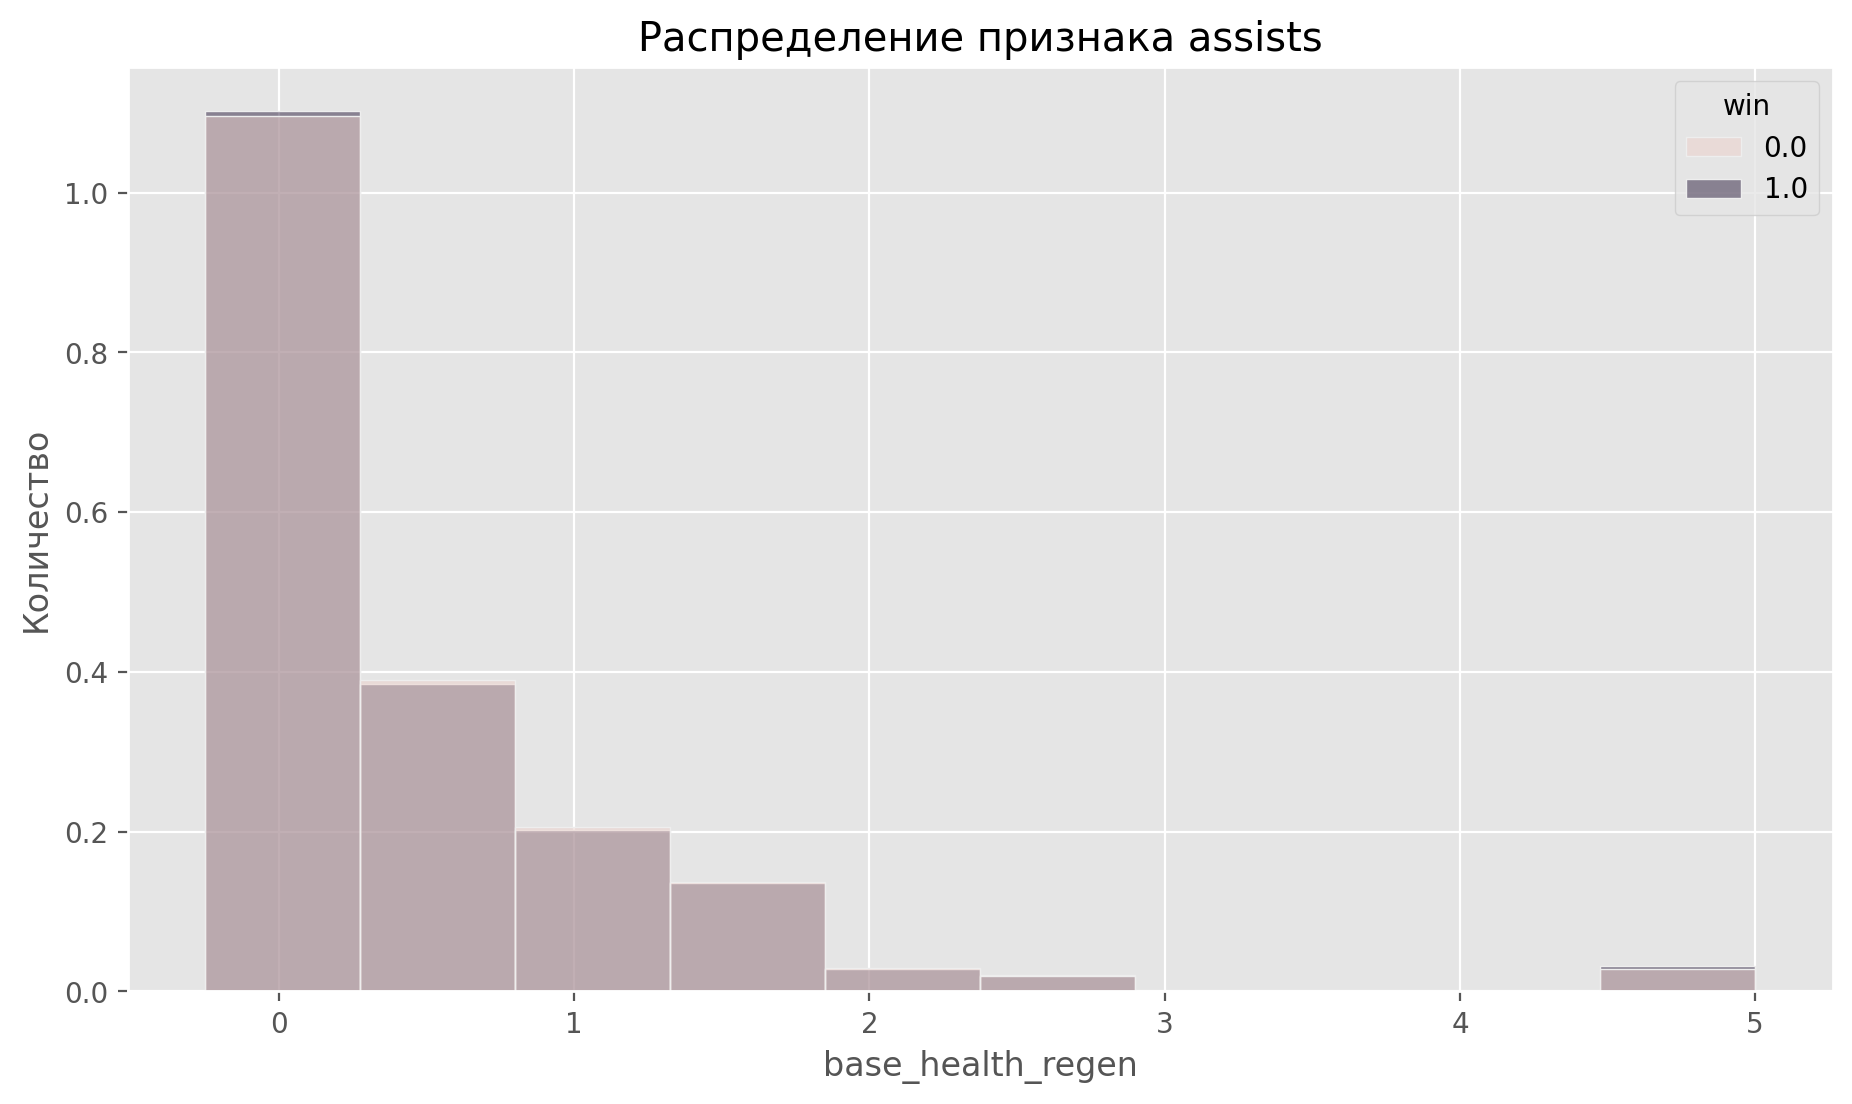

count    18020.000000
mean         0.618049
std          0.733725
min         -0.250000
25%          0.250000
50%          0.250000
75%          0.750000
max          5.000000
Name: base_health_regen, dtype: float64


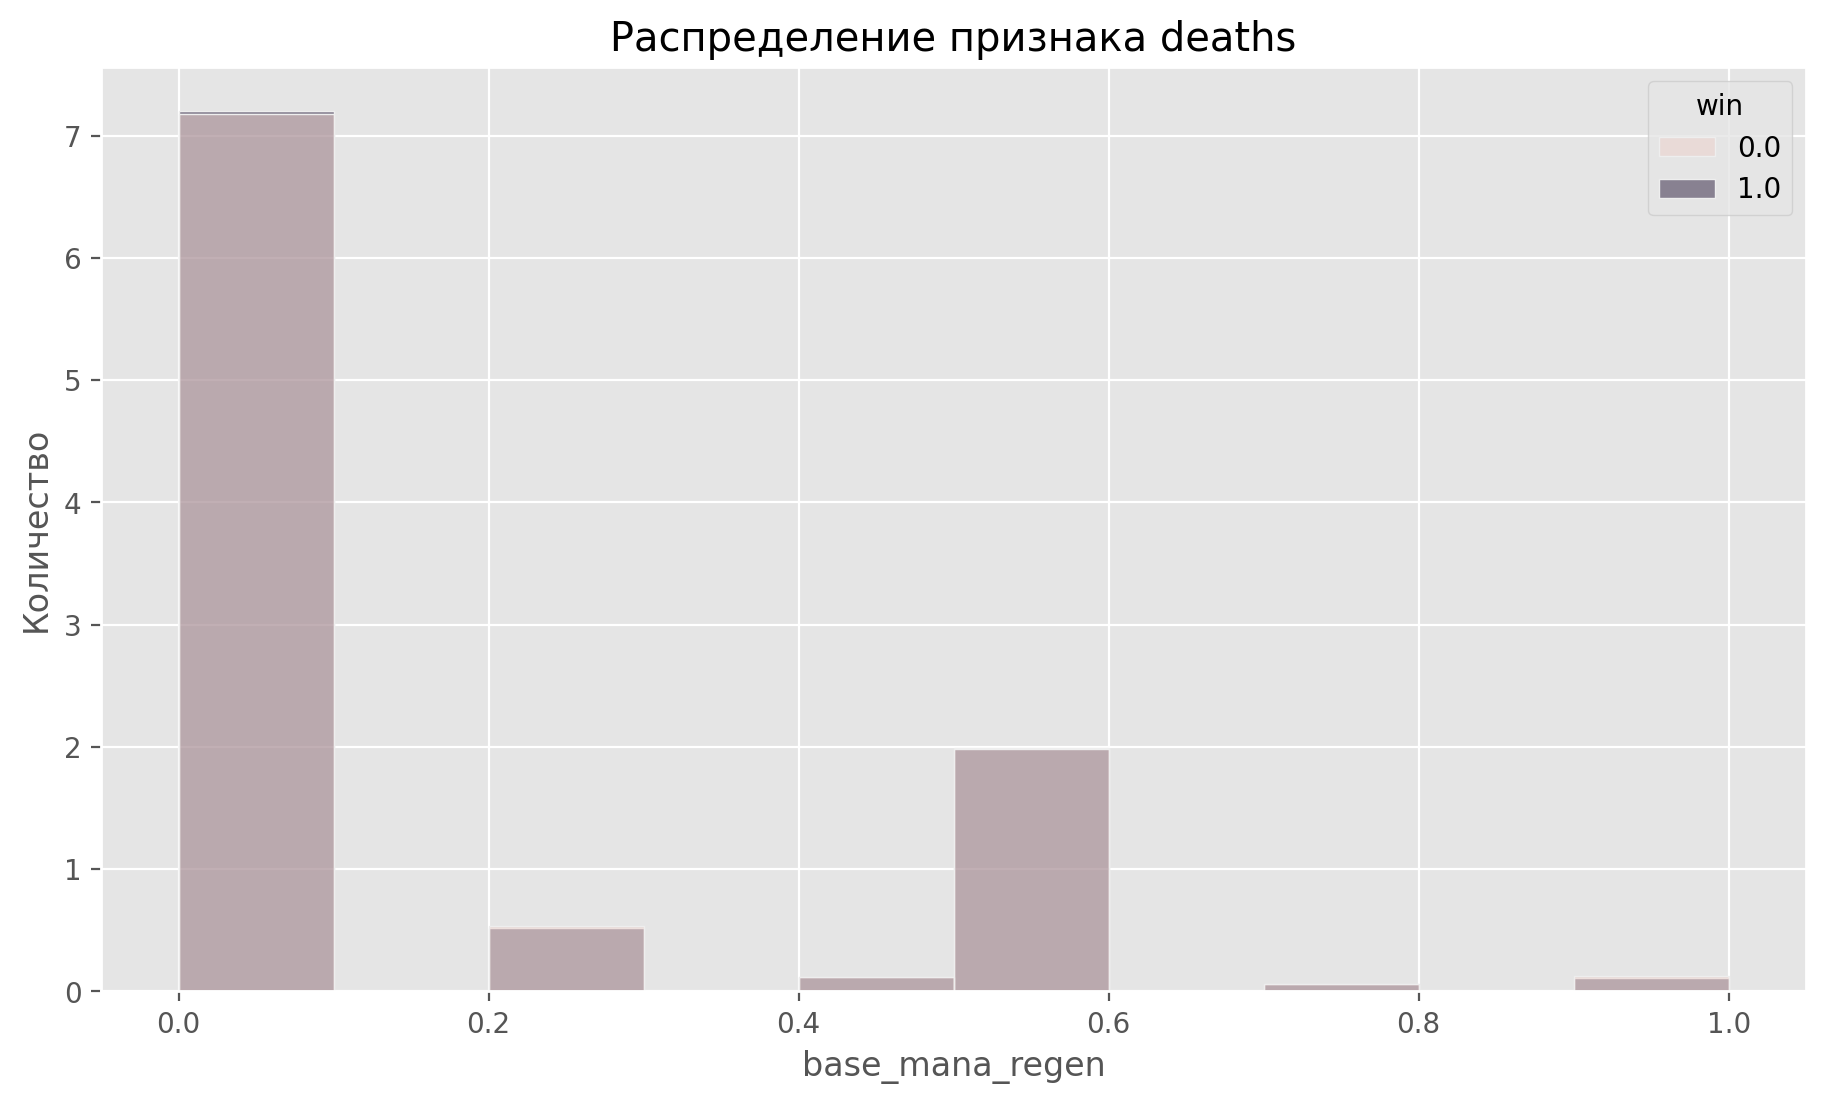

count    18020.000000
mean         0.136029
std          0.231943
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: base_mana_regen, dtype: float64


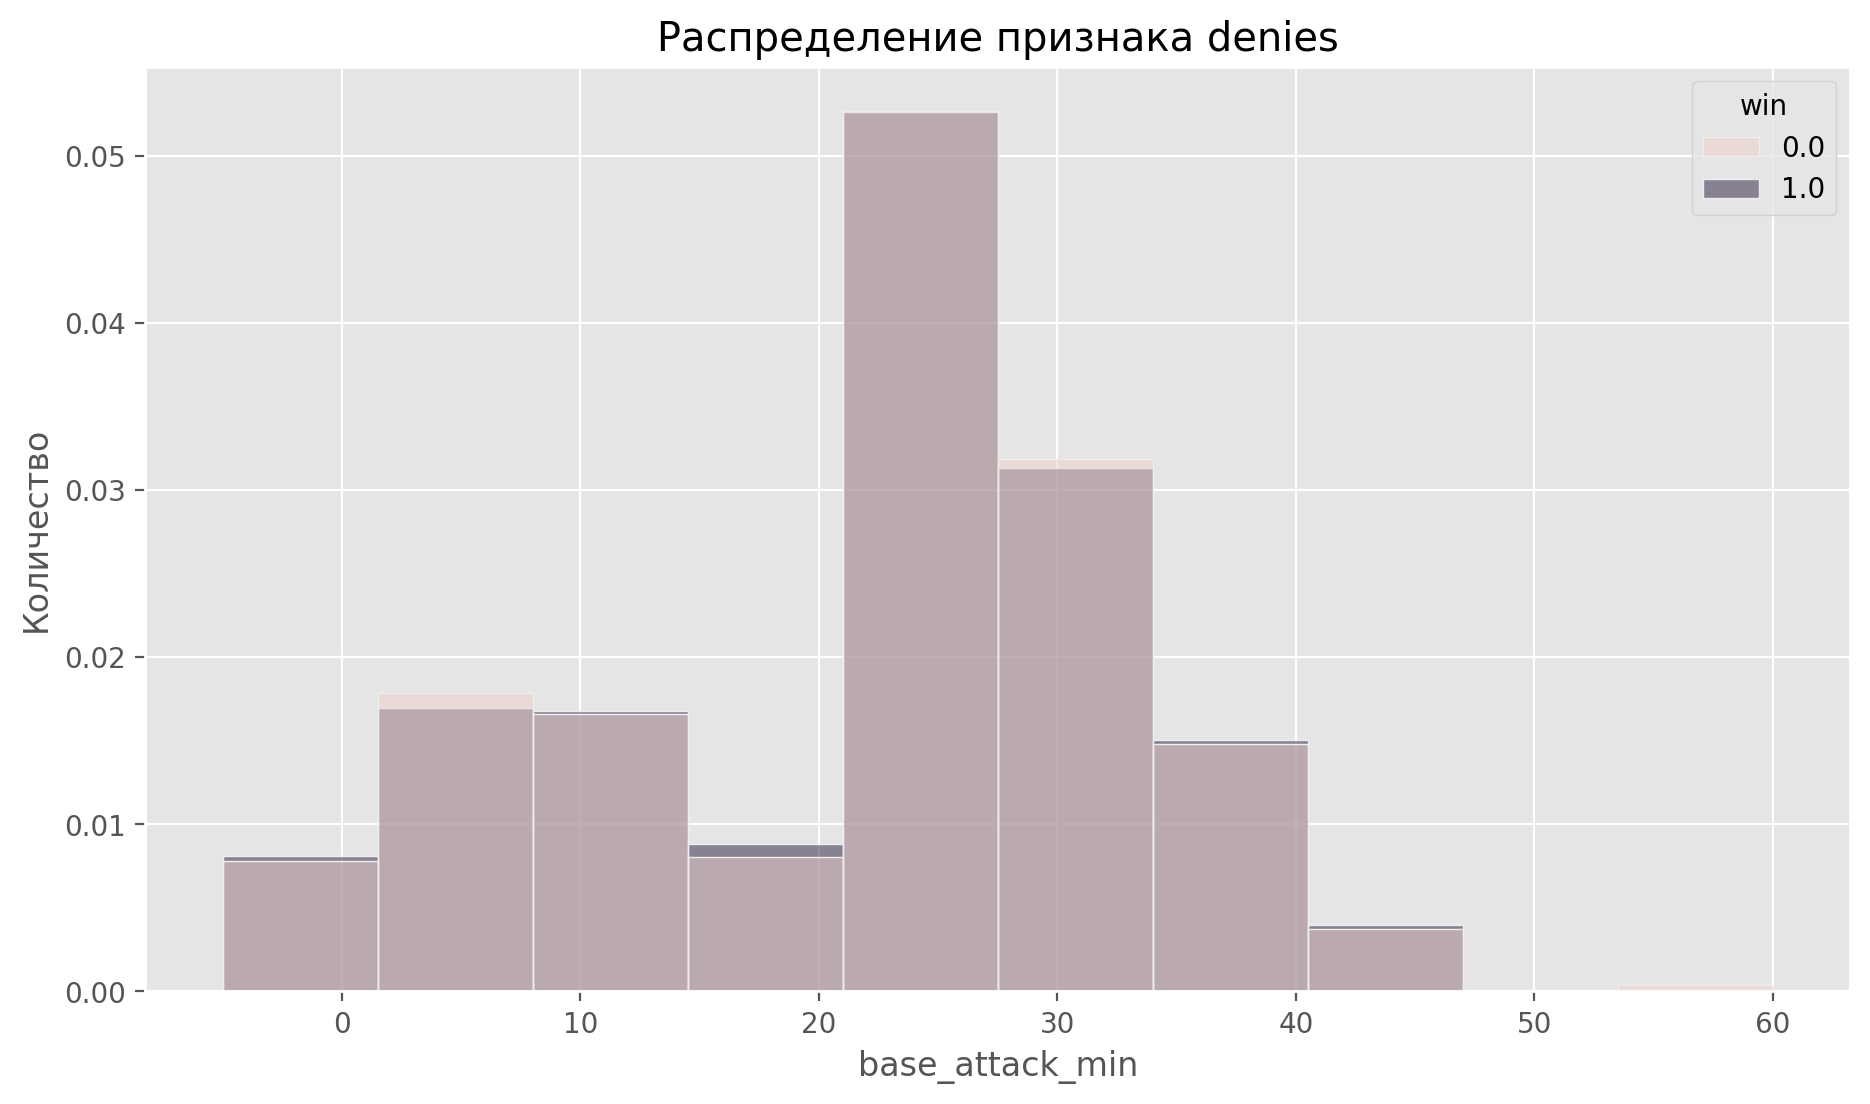

count    18020.000000
mean        21.803219
std         11.706168
min         -5.000000
25%          9.000000
50%         26.000000
75%         30.000000
max         60.000000
Name: base_attack_min, dtype: float64


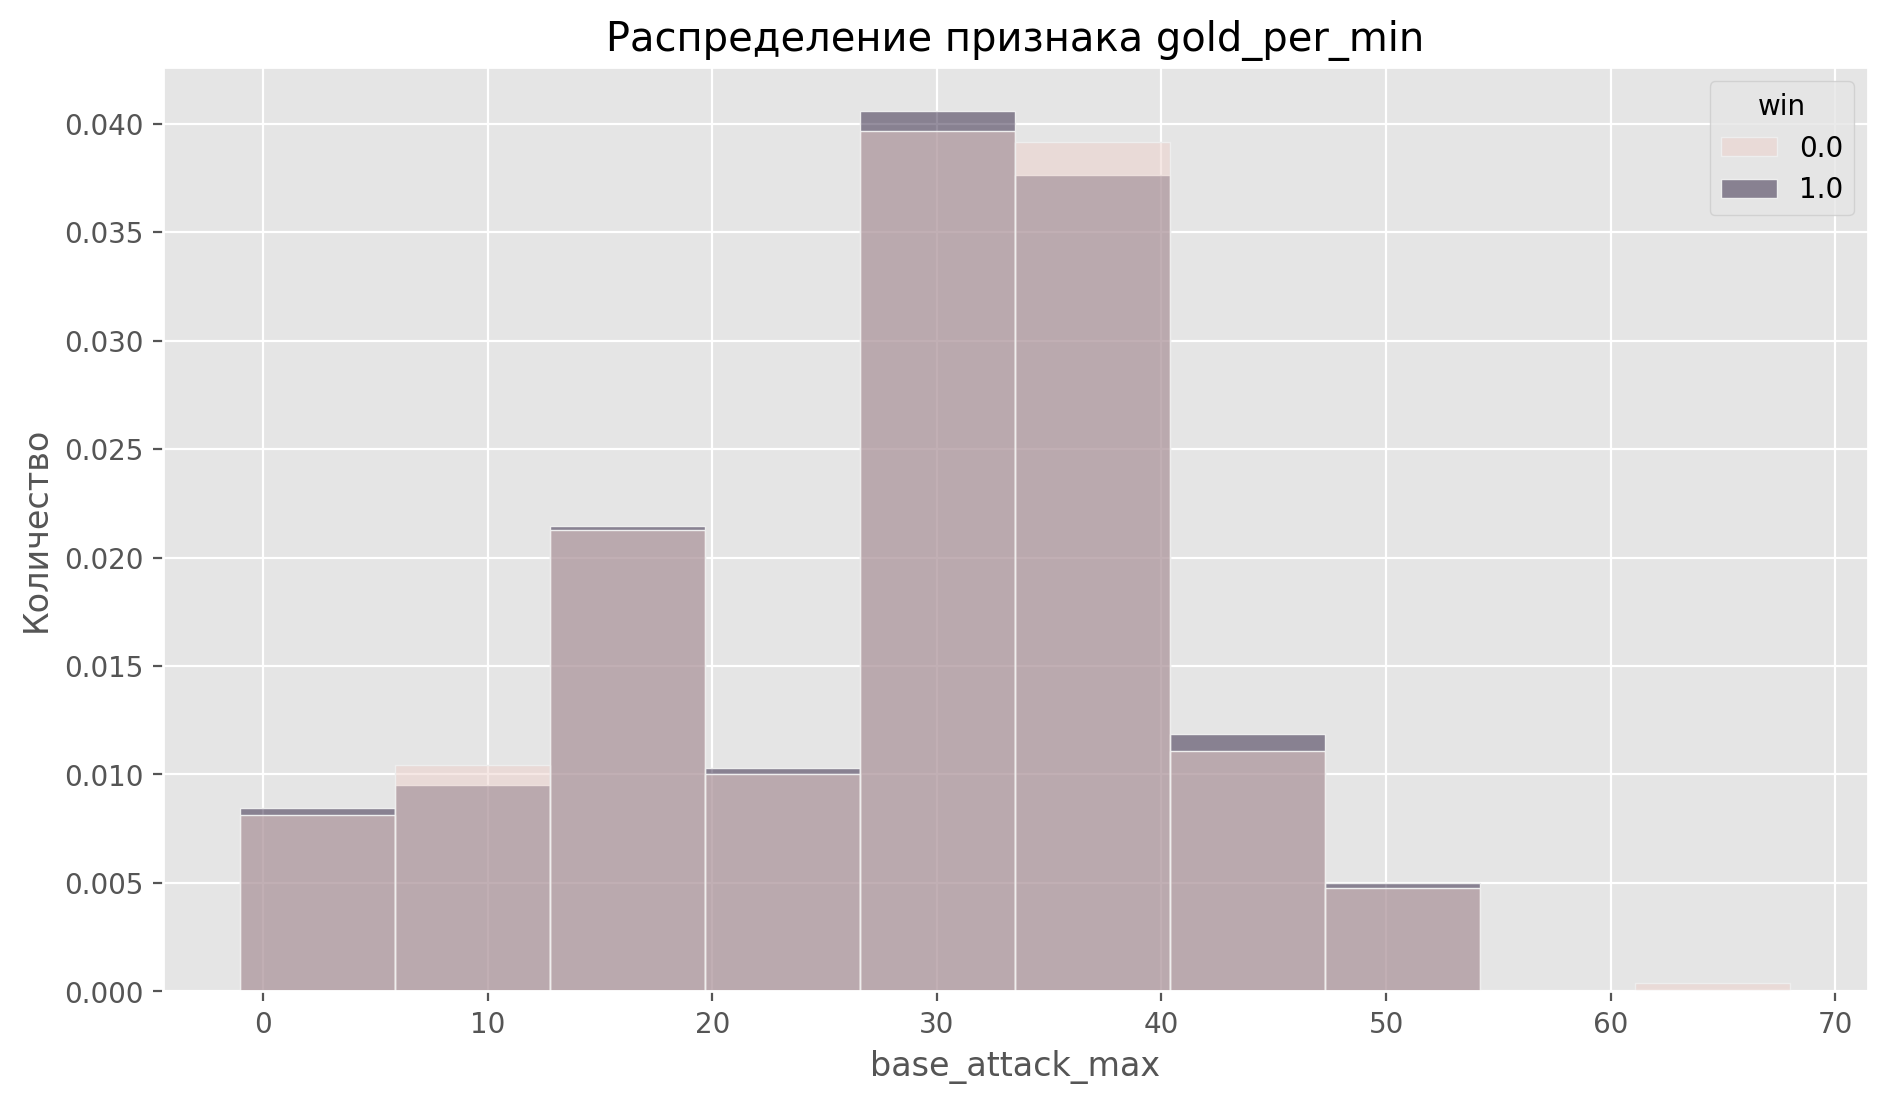

count    18020.000000
mean        28.146448
std         12.229525
min         -1.000000
25%         18.000000
50%         32.000000
75%         36.000000
max         68.000000
Name: base_attack_max, dtype: float64


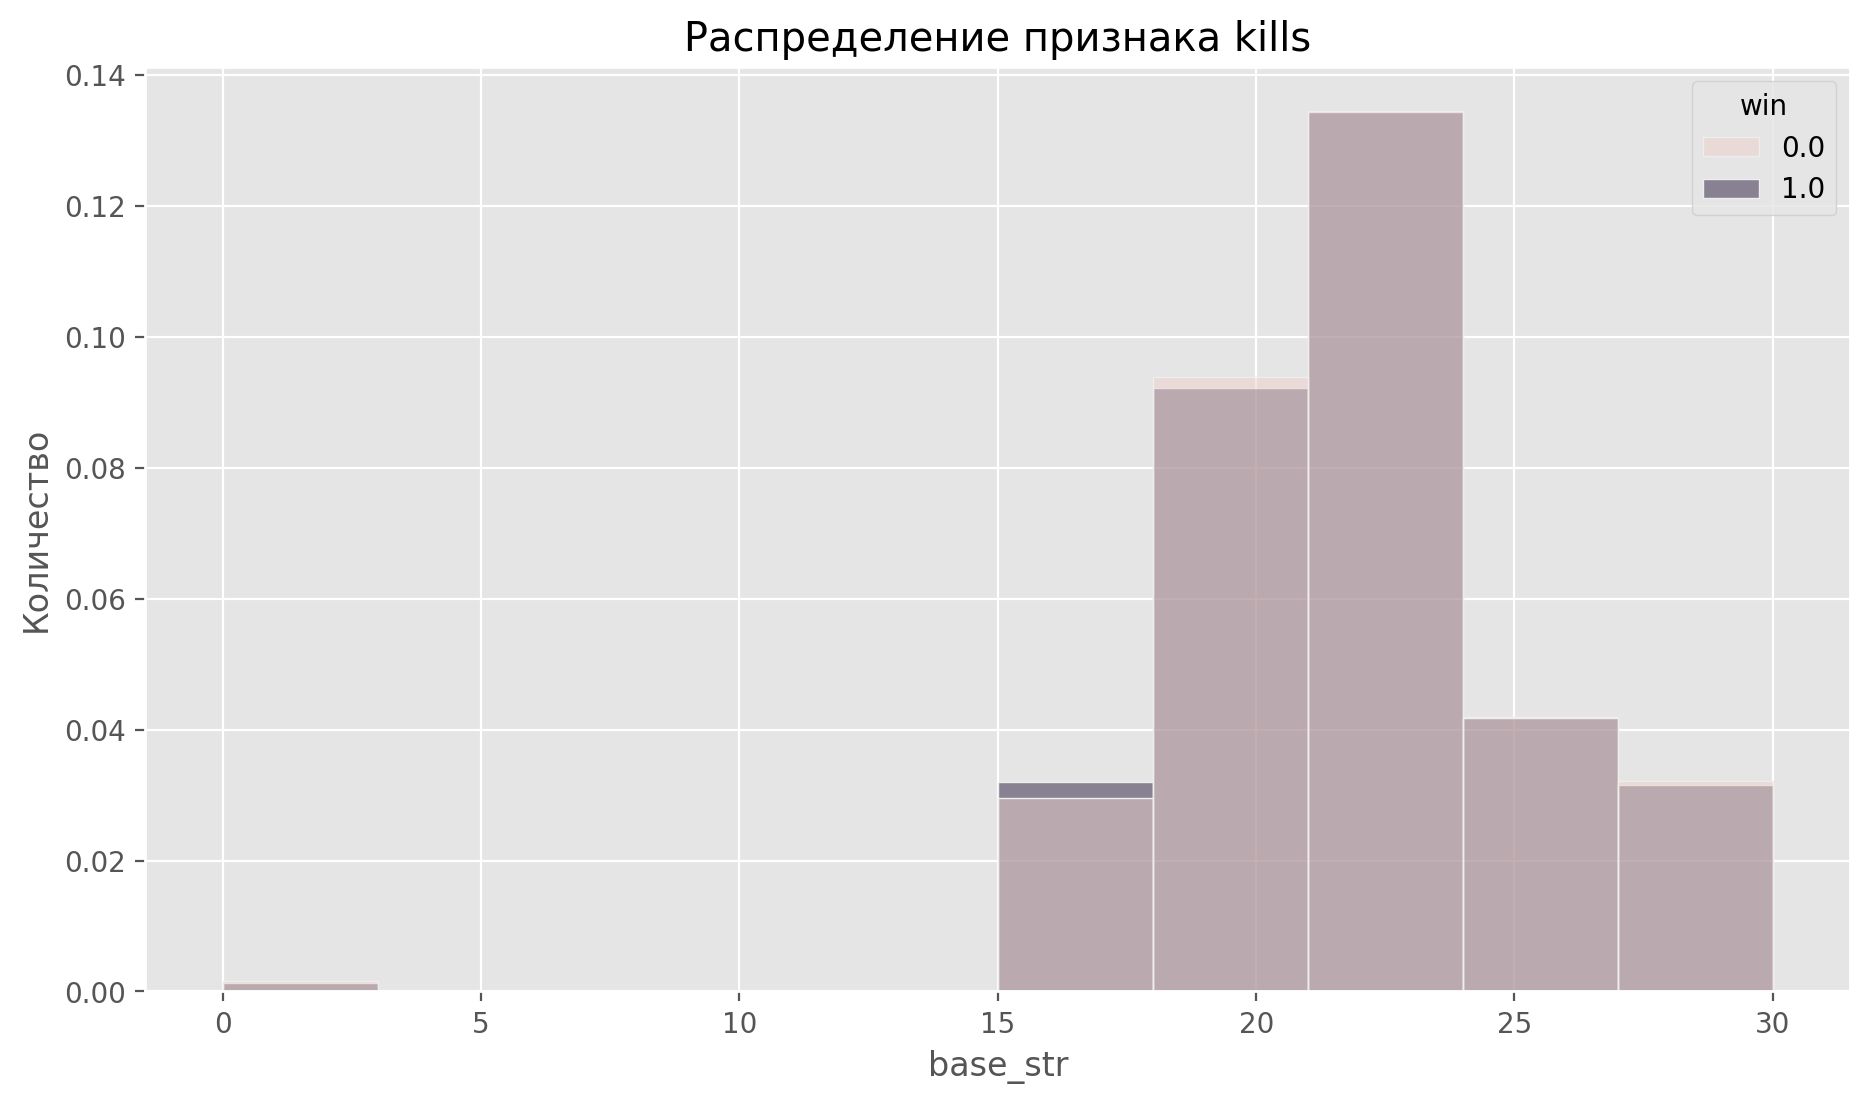

count    18020.000000
mean        21.522752
std          3.427555
min          0.000000
25%         19.000000
50%         21.000000
75%         23.000000
max         30.000000
Name: base_str, dtype: float64


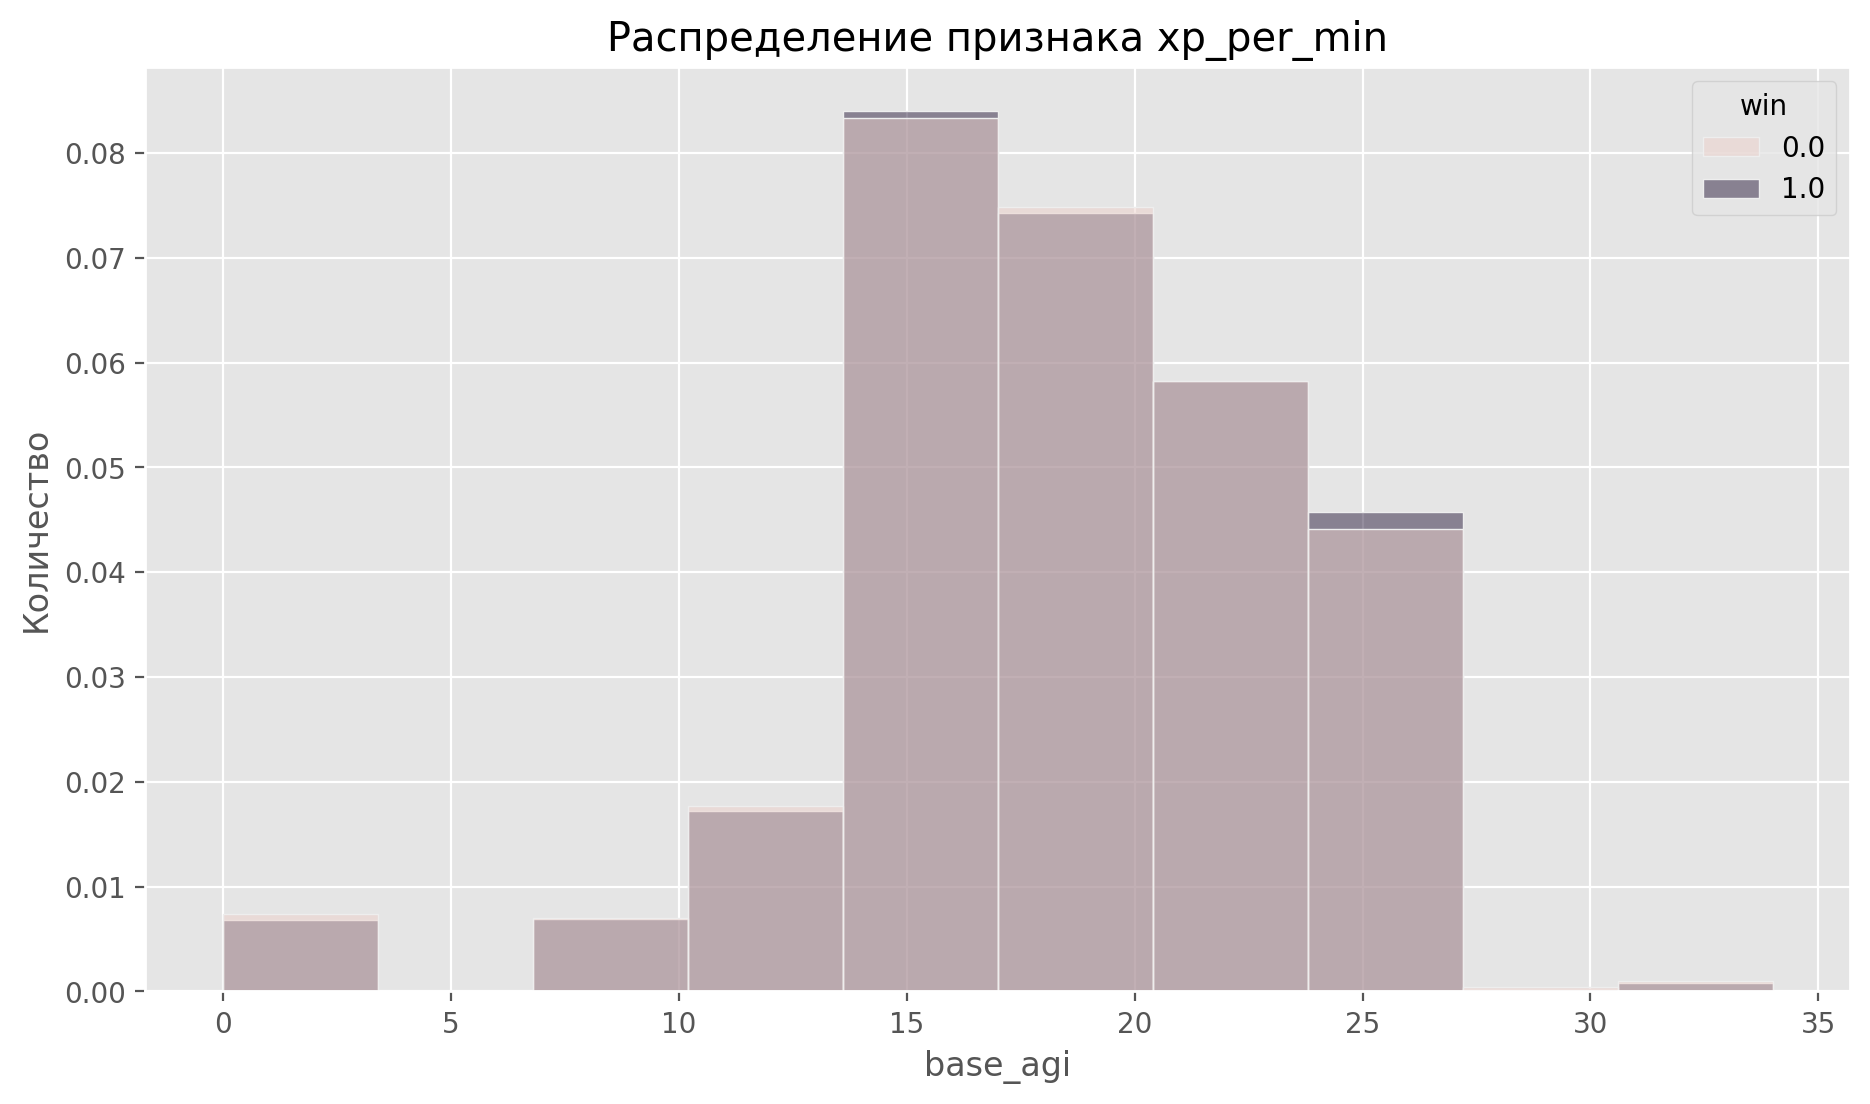

count    18020.000000
mean        18.175028
std          5.107317
min          0.000000
25%         15.000000
50%         18.000000
75%         23.000000
max         34.000000
Name: base_agi, dtype: float64


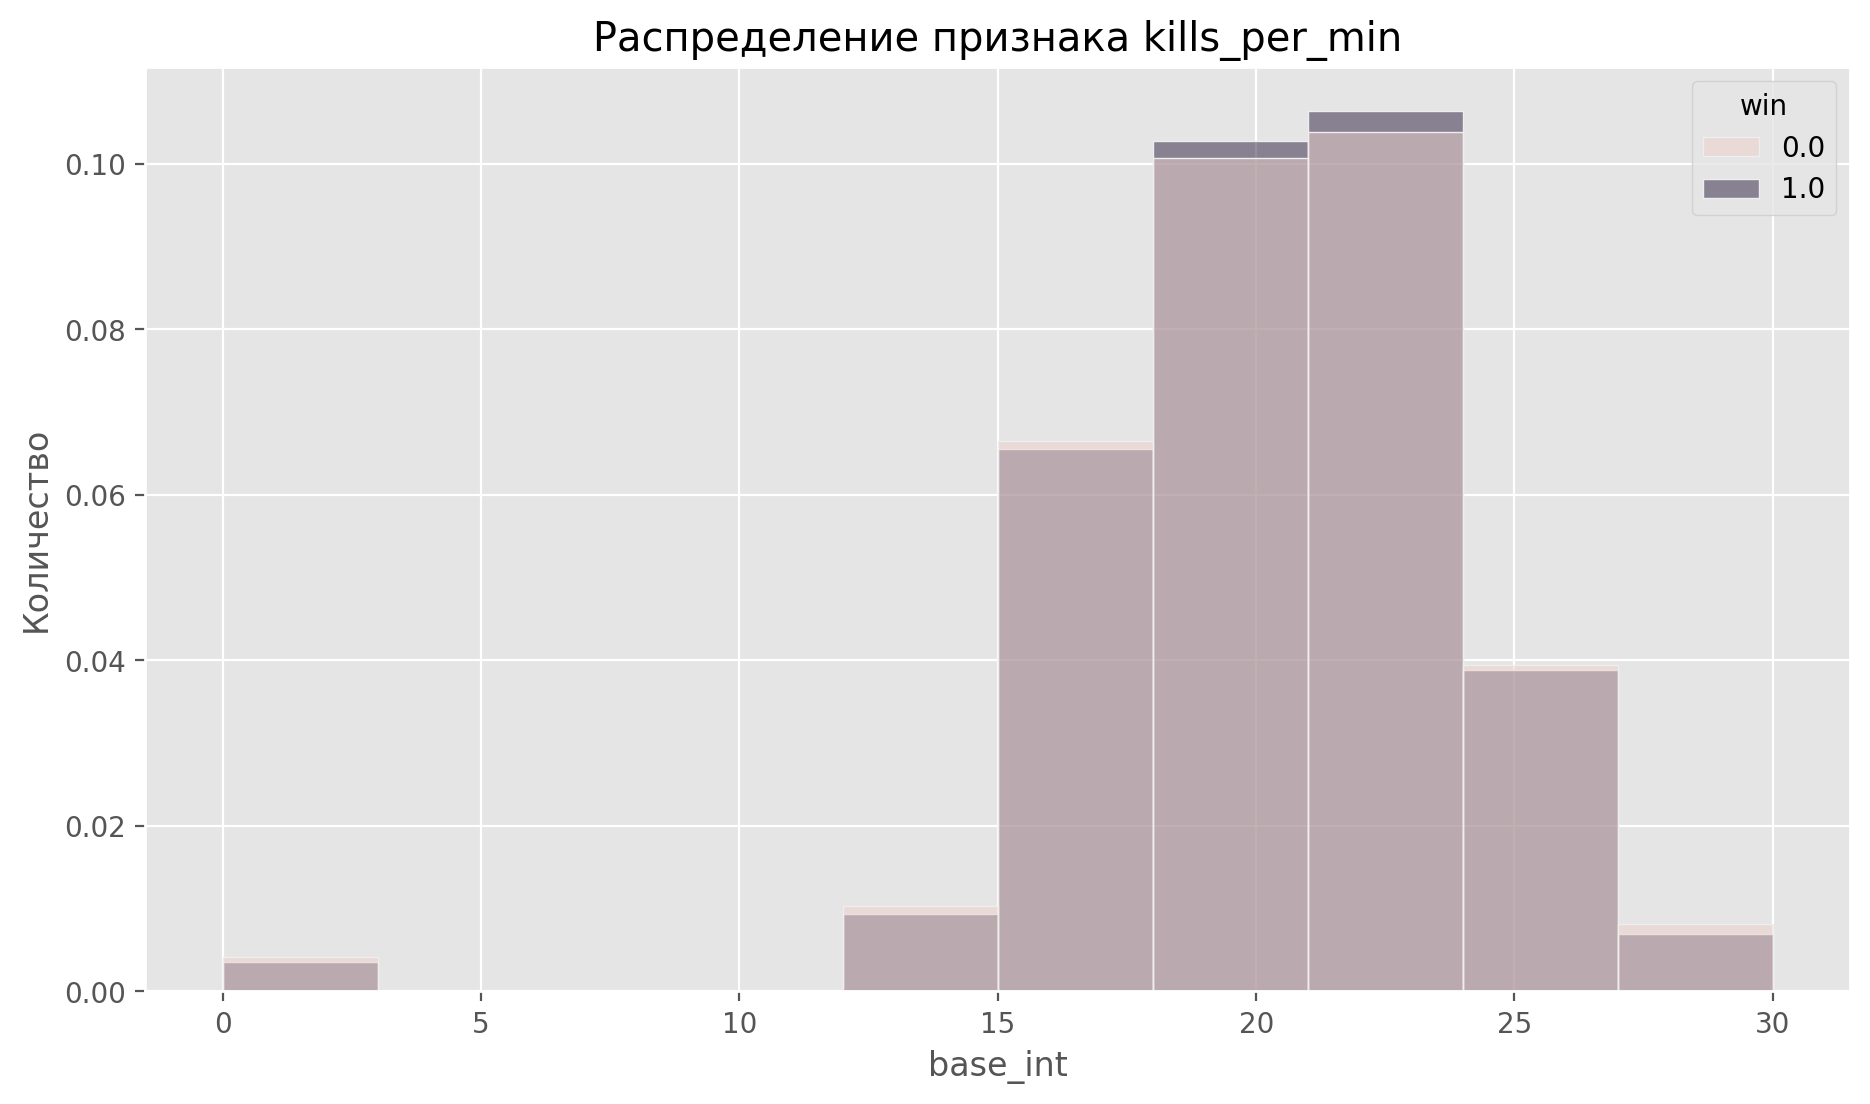

count    18020.000000
mean        19.807880
std          4.096869
min          0.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         30.000000
Name: base_int, dtype: float64


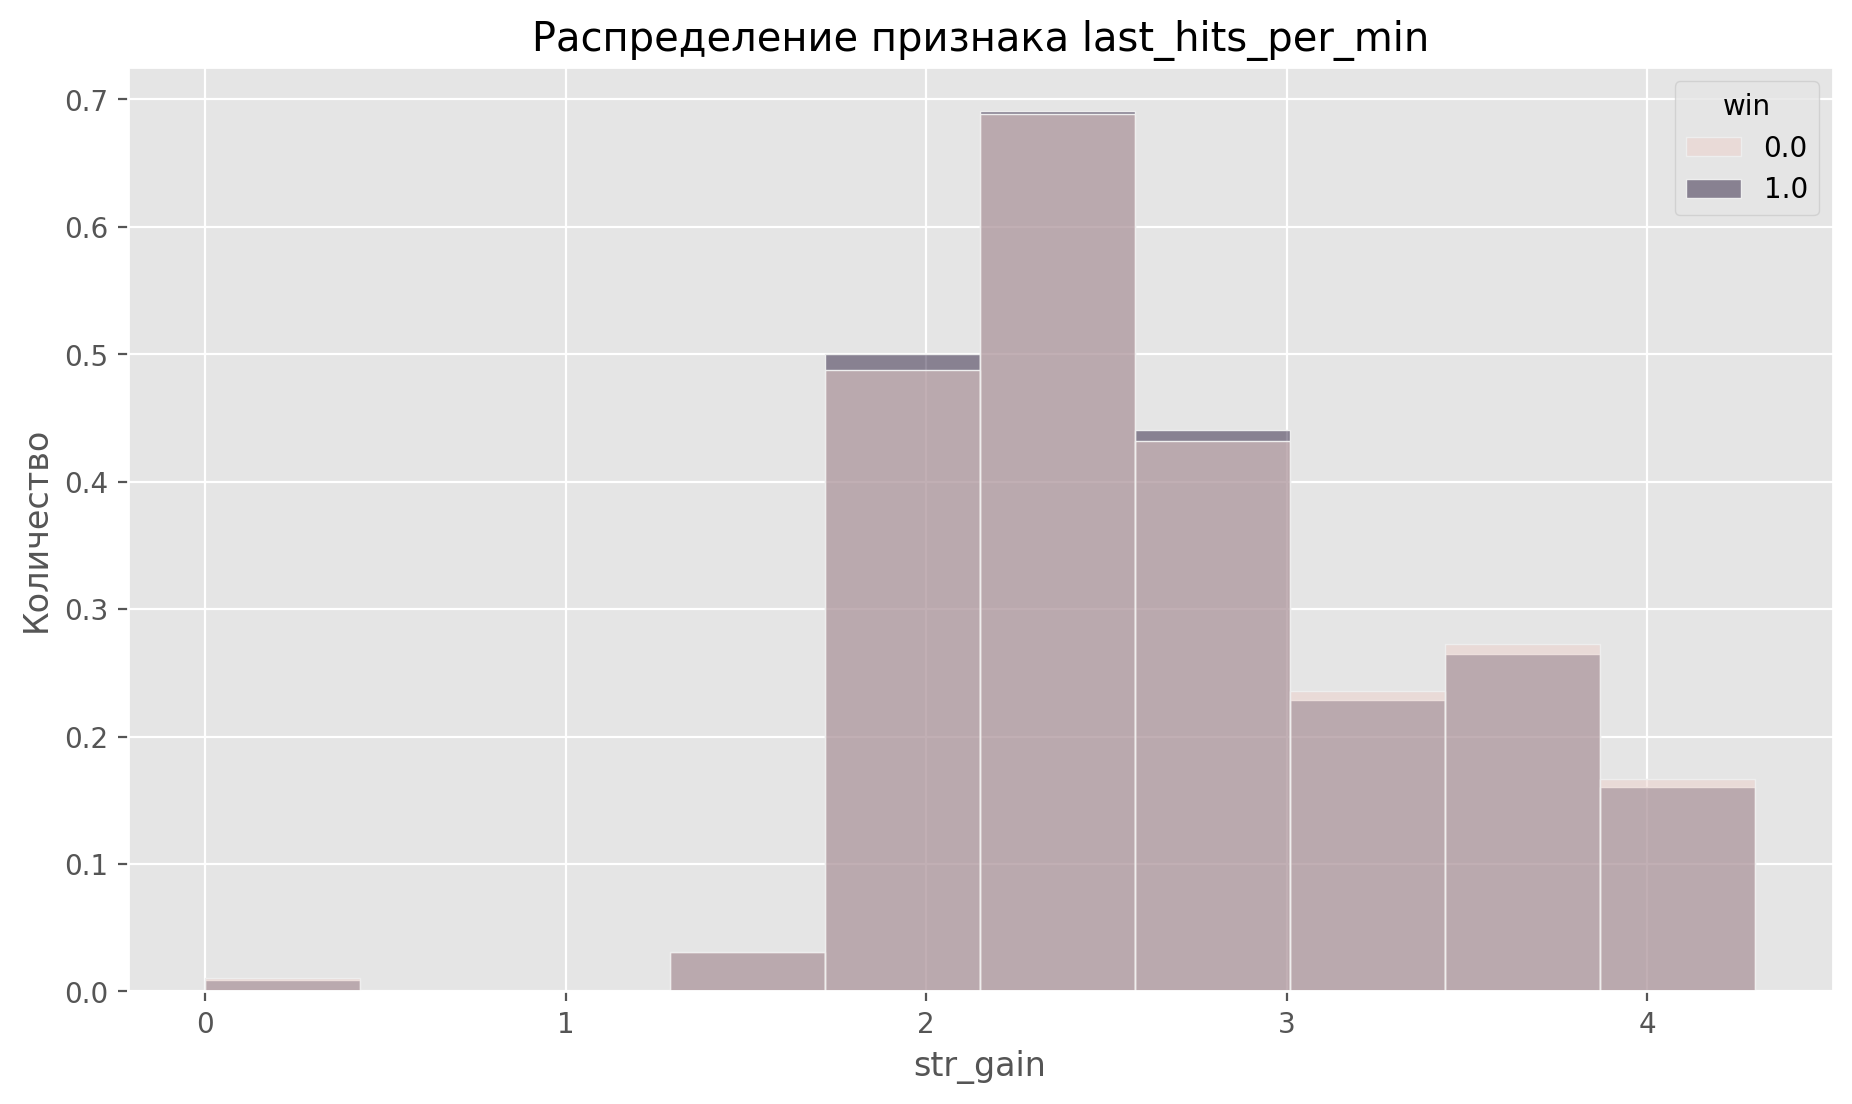

count    18020.000000
mean         2.692764
std          0.671404
min          0.000000
25%          2.200000
50%          2.500000
75%          3.100000
max          4.300000
Name: str_gain, dtype: float64


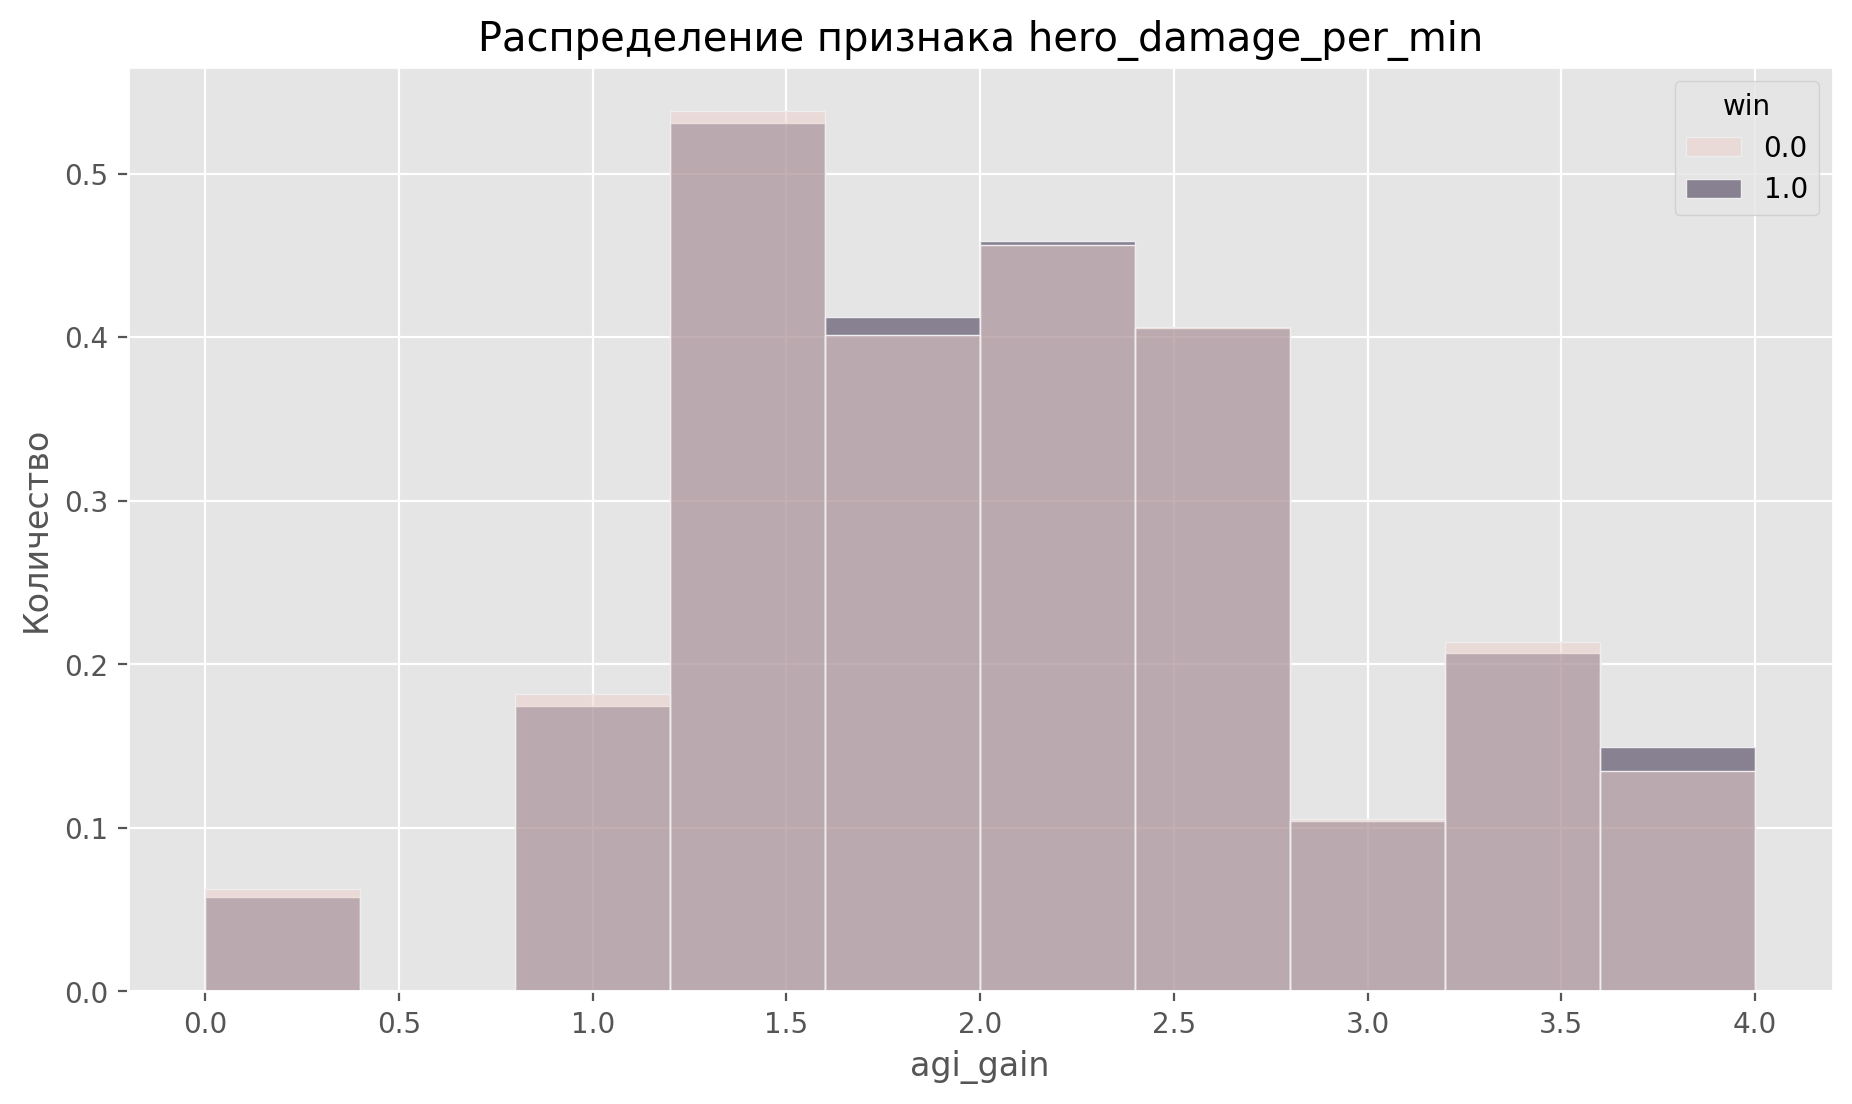

count    18020.00000
mean         2.08515
std          0.82472
min          0.00000
25%          1.50000
50%          2.00000
75%          2.60000
max          4.00000
Name: agi_gain, dtype: float64


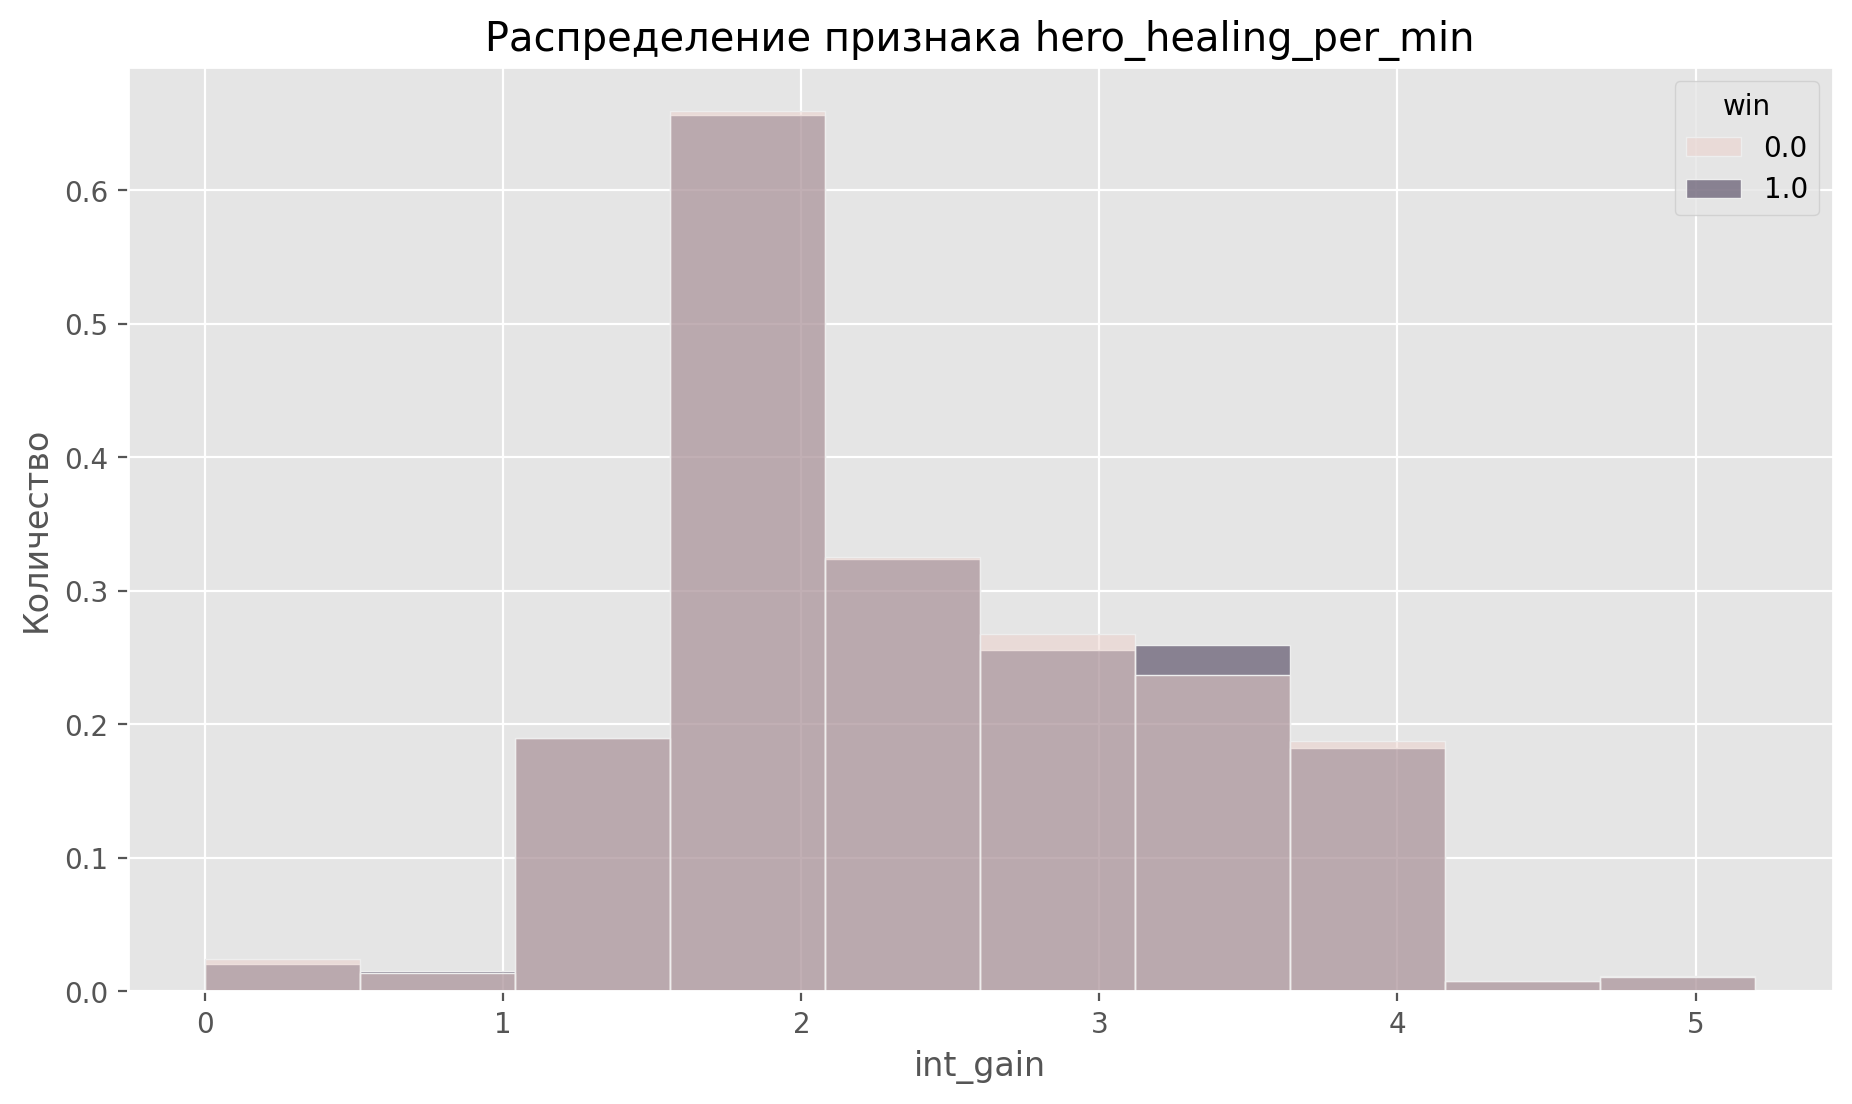

count    18020.000000
mean         2.376637
std          0.858123
min          0.000000
25%          1.700000
50%          2.200000
75%          3.000000
max          5.200000
Name: int_gain, dtype: float64


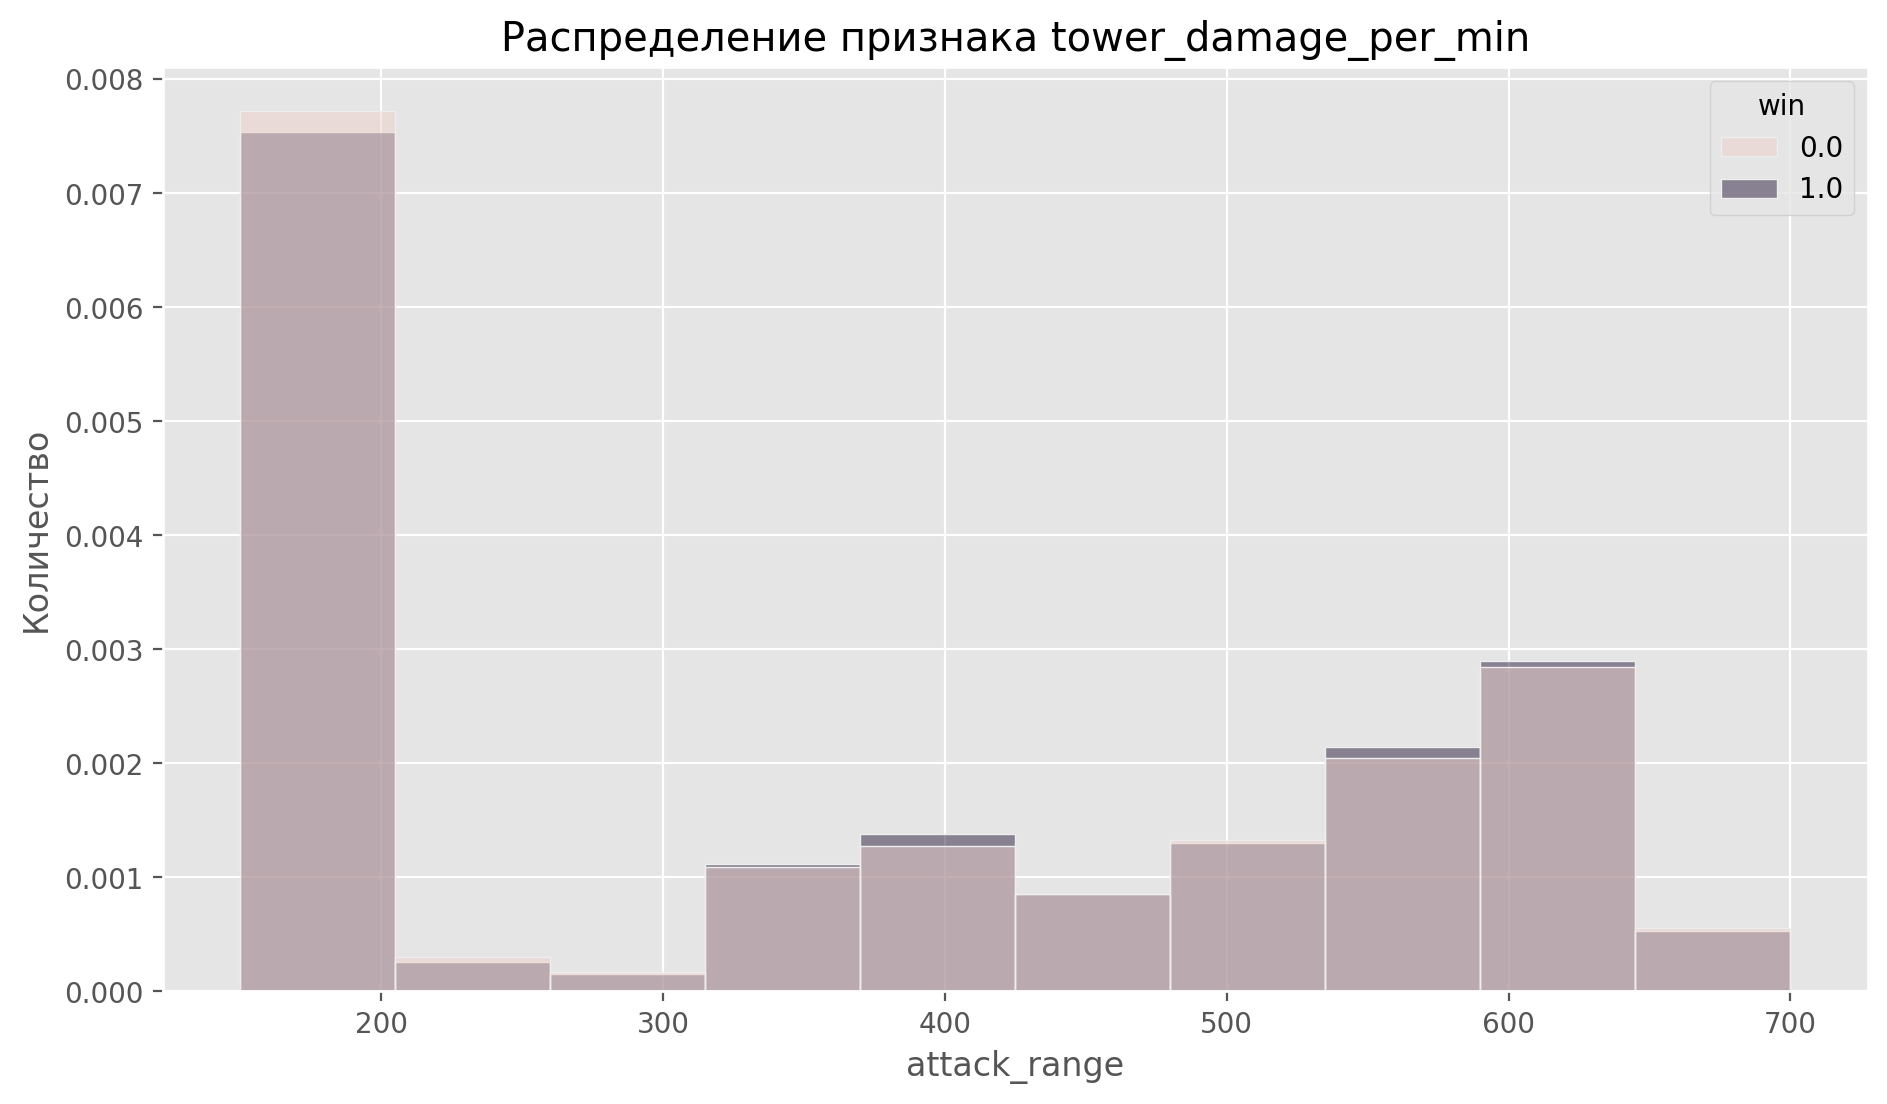

count    18020.000000
mean       361.667314
std        193.585238
min        150.000000
25%        150.000000
50%        365.000000
75%        550.000000
max        700.000000
Name: attack_range, dtype: float64


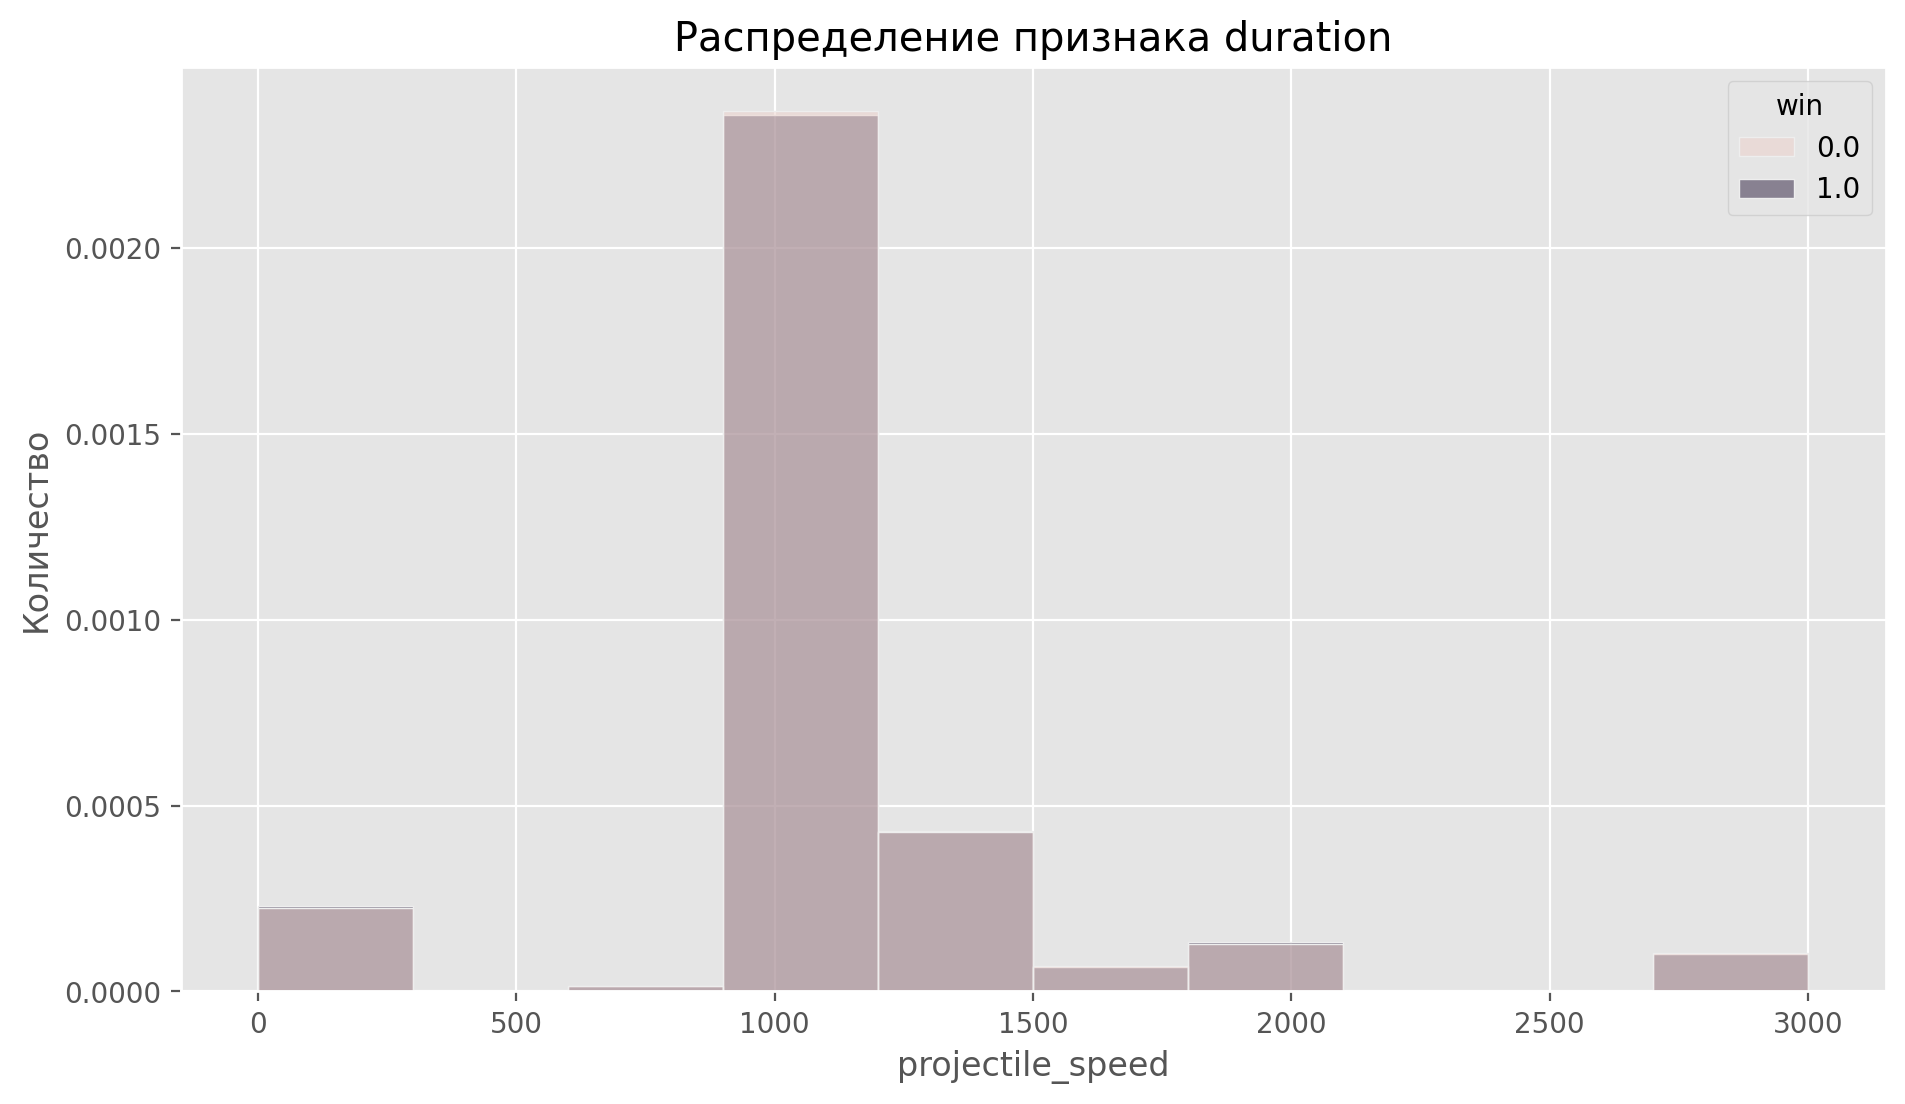

count    18020.000000
mean      1013.564095
std        488.341320
min          0.000000
25%        900.000000
50%        900.000000
75%       1125.000000
max       3000.000000
Name: projectile_speed, dtype: float64


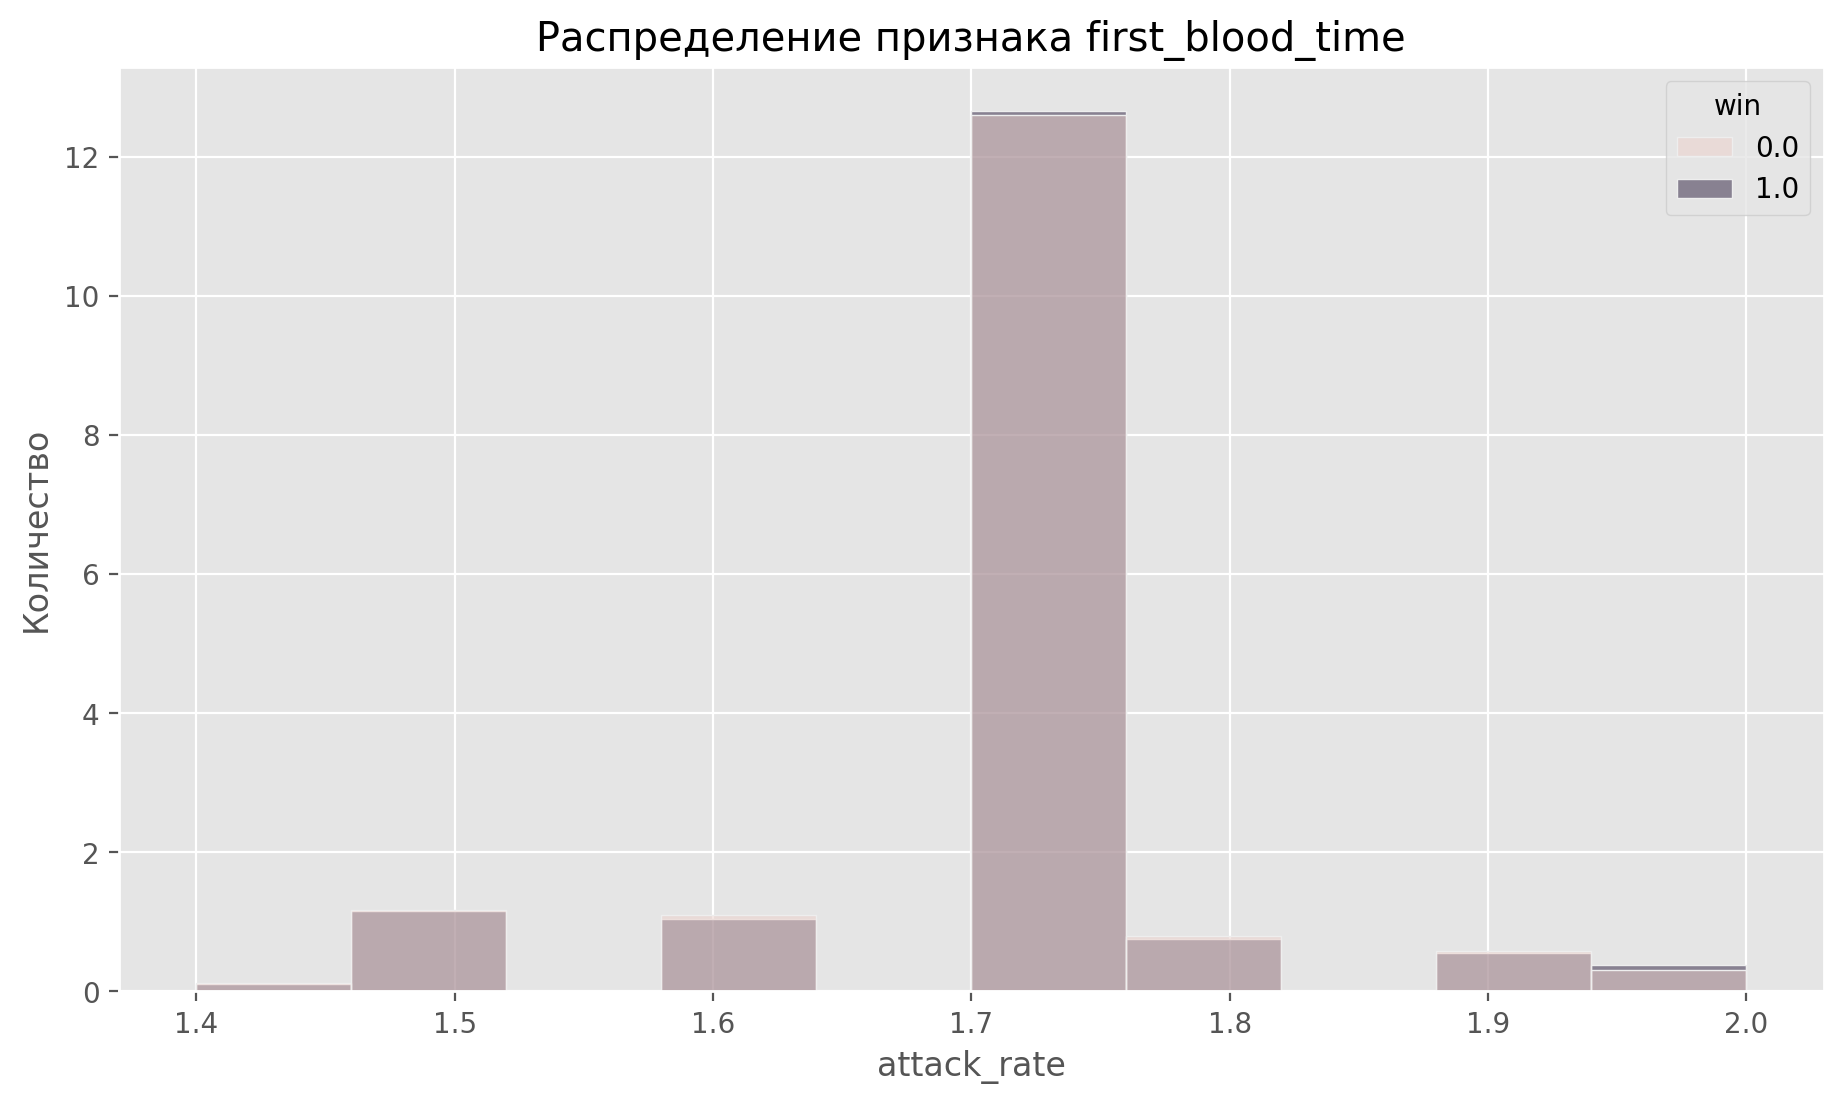

count    18020.000000
mean         1.694967
std          0.087695
min          1.400000
25%          1.700000
50%          1.700000
75%          1.700000
max          2.000000
Name: attack_rate, dtype: float64


In [57]:
for i in range(len(num_col)):
    
    fig, axs = plt.subplots(figsize=(11, 6))
    sns.histplot(data=data, x= data[n_col[i]], hue="win", stat="density", common_norm=False, bins = 10)
    plt.title(f"Распределение признака {num_col[i]}")
    plt.ylabel("Количество")
    plt.xlabel(n_col[i])
    plt.show()
    print(data[n_col[i]].describe())

In [58]:
obraz(data, 'localized_name')

count    sum  percent     localized_name
localized_name                                             
Rubick               498  246.0     49.0             Rubick
Luna                 452  225.0     50.0               Luna
Crystal Maiden       419  217.0     52.0     Crystal Maiden
Tiny                 431  206.0     48.0               Tiny
Disruptor            401  205.0     51.0          Disruptor
Hoodwink             368  204.0     55.0           Hoodwink
Windranger           354  185.0     52.0         Windranger
Zeus                 359  184.0     51.0               Zeus
Gyrocopter           325  165.0     51.0         Gyrocopter
Morphling            307  159.0     52.0          Morphling
Timbersaw            323  153.0     47.0          Timbersaw
Centaur Warrunner    279  148.0     53.0  Centaur Warrunner
Lifestealer          297  142.0     48.0        Lifestealer
Dragon Knight        311  140.0     45.0      Dragon Knight
Shadow Demon         271  139.0     51.0       Shadow Demon
Templar Assassin     273  134.0     49.0   Templar Assassin
Pudge                239  133.0     56.0              Pudge
Lion                 253  131.0     52.0               Lion
Leshrac              244  131.0     54.0            Leshrac
Pangolier            271  130.0     48.0          Pangolier

count     sum  percent attack_type
attack_type                                    
Ranged       10226  5170.0     51.0      Ranged
Melee         7670  3781.0     49.0       Melee

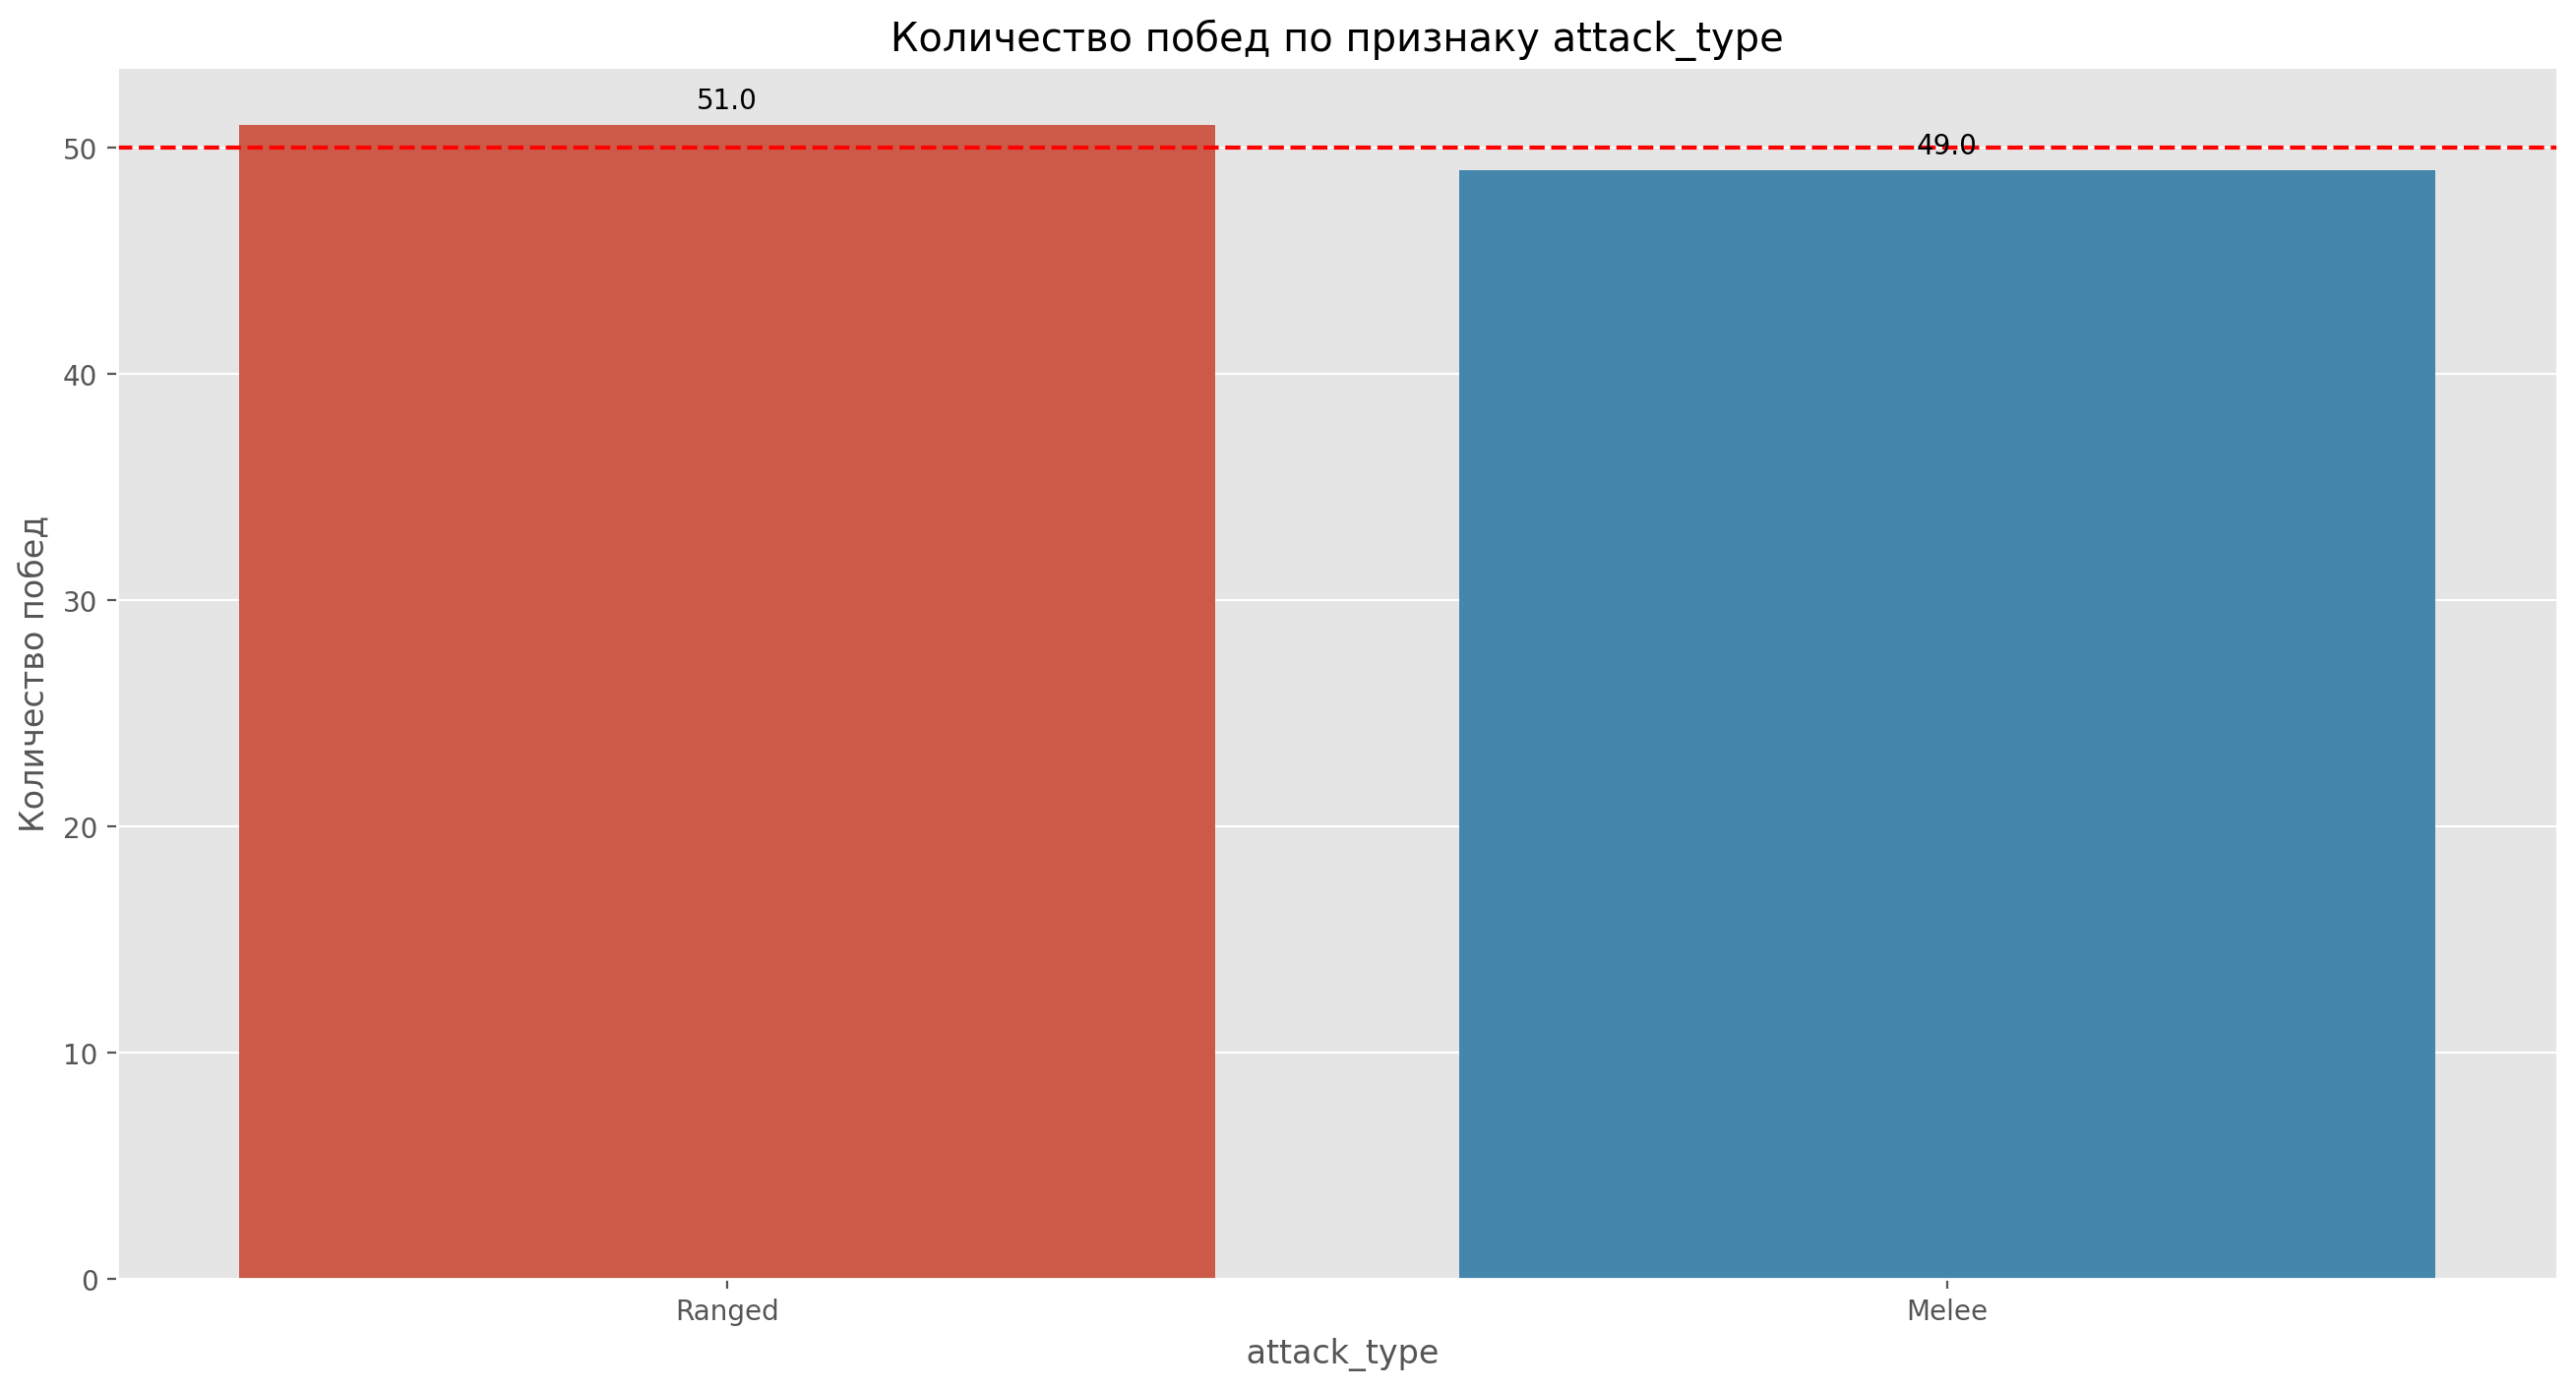

In [59]:
obraz_bi(data, 'attack_type')

In [60]:
obraz(data, 'primary_attr')

count     sum  percent primary_attr
primary_attr                                     
str            4786  2376.0     50.0          str
int            4673  2371.0     51.0          int
all            4344  2154.0     50.0          all
agi            4093  2050.0     50.0          agi

count     sum  percent attack_type
attack_type                                    
Ranged       10226  5170.0     51.0      Ranged
Melee         7670  3781.0     49.0       Melee

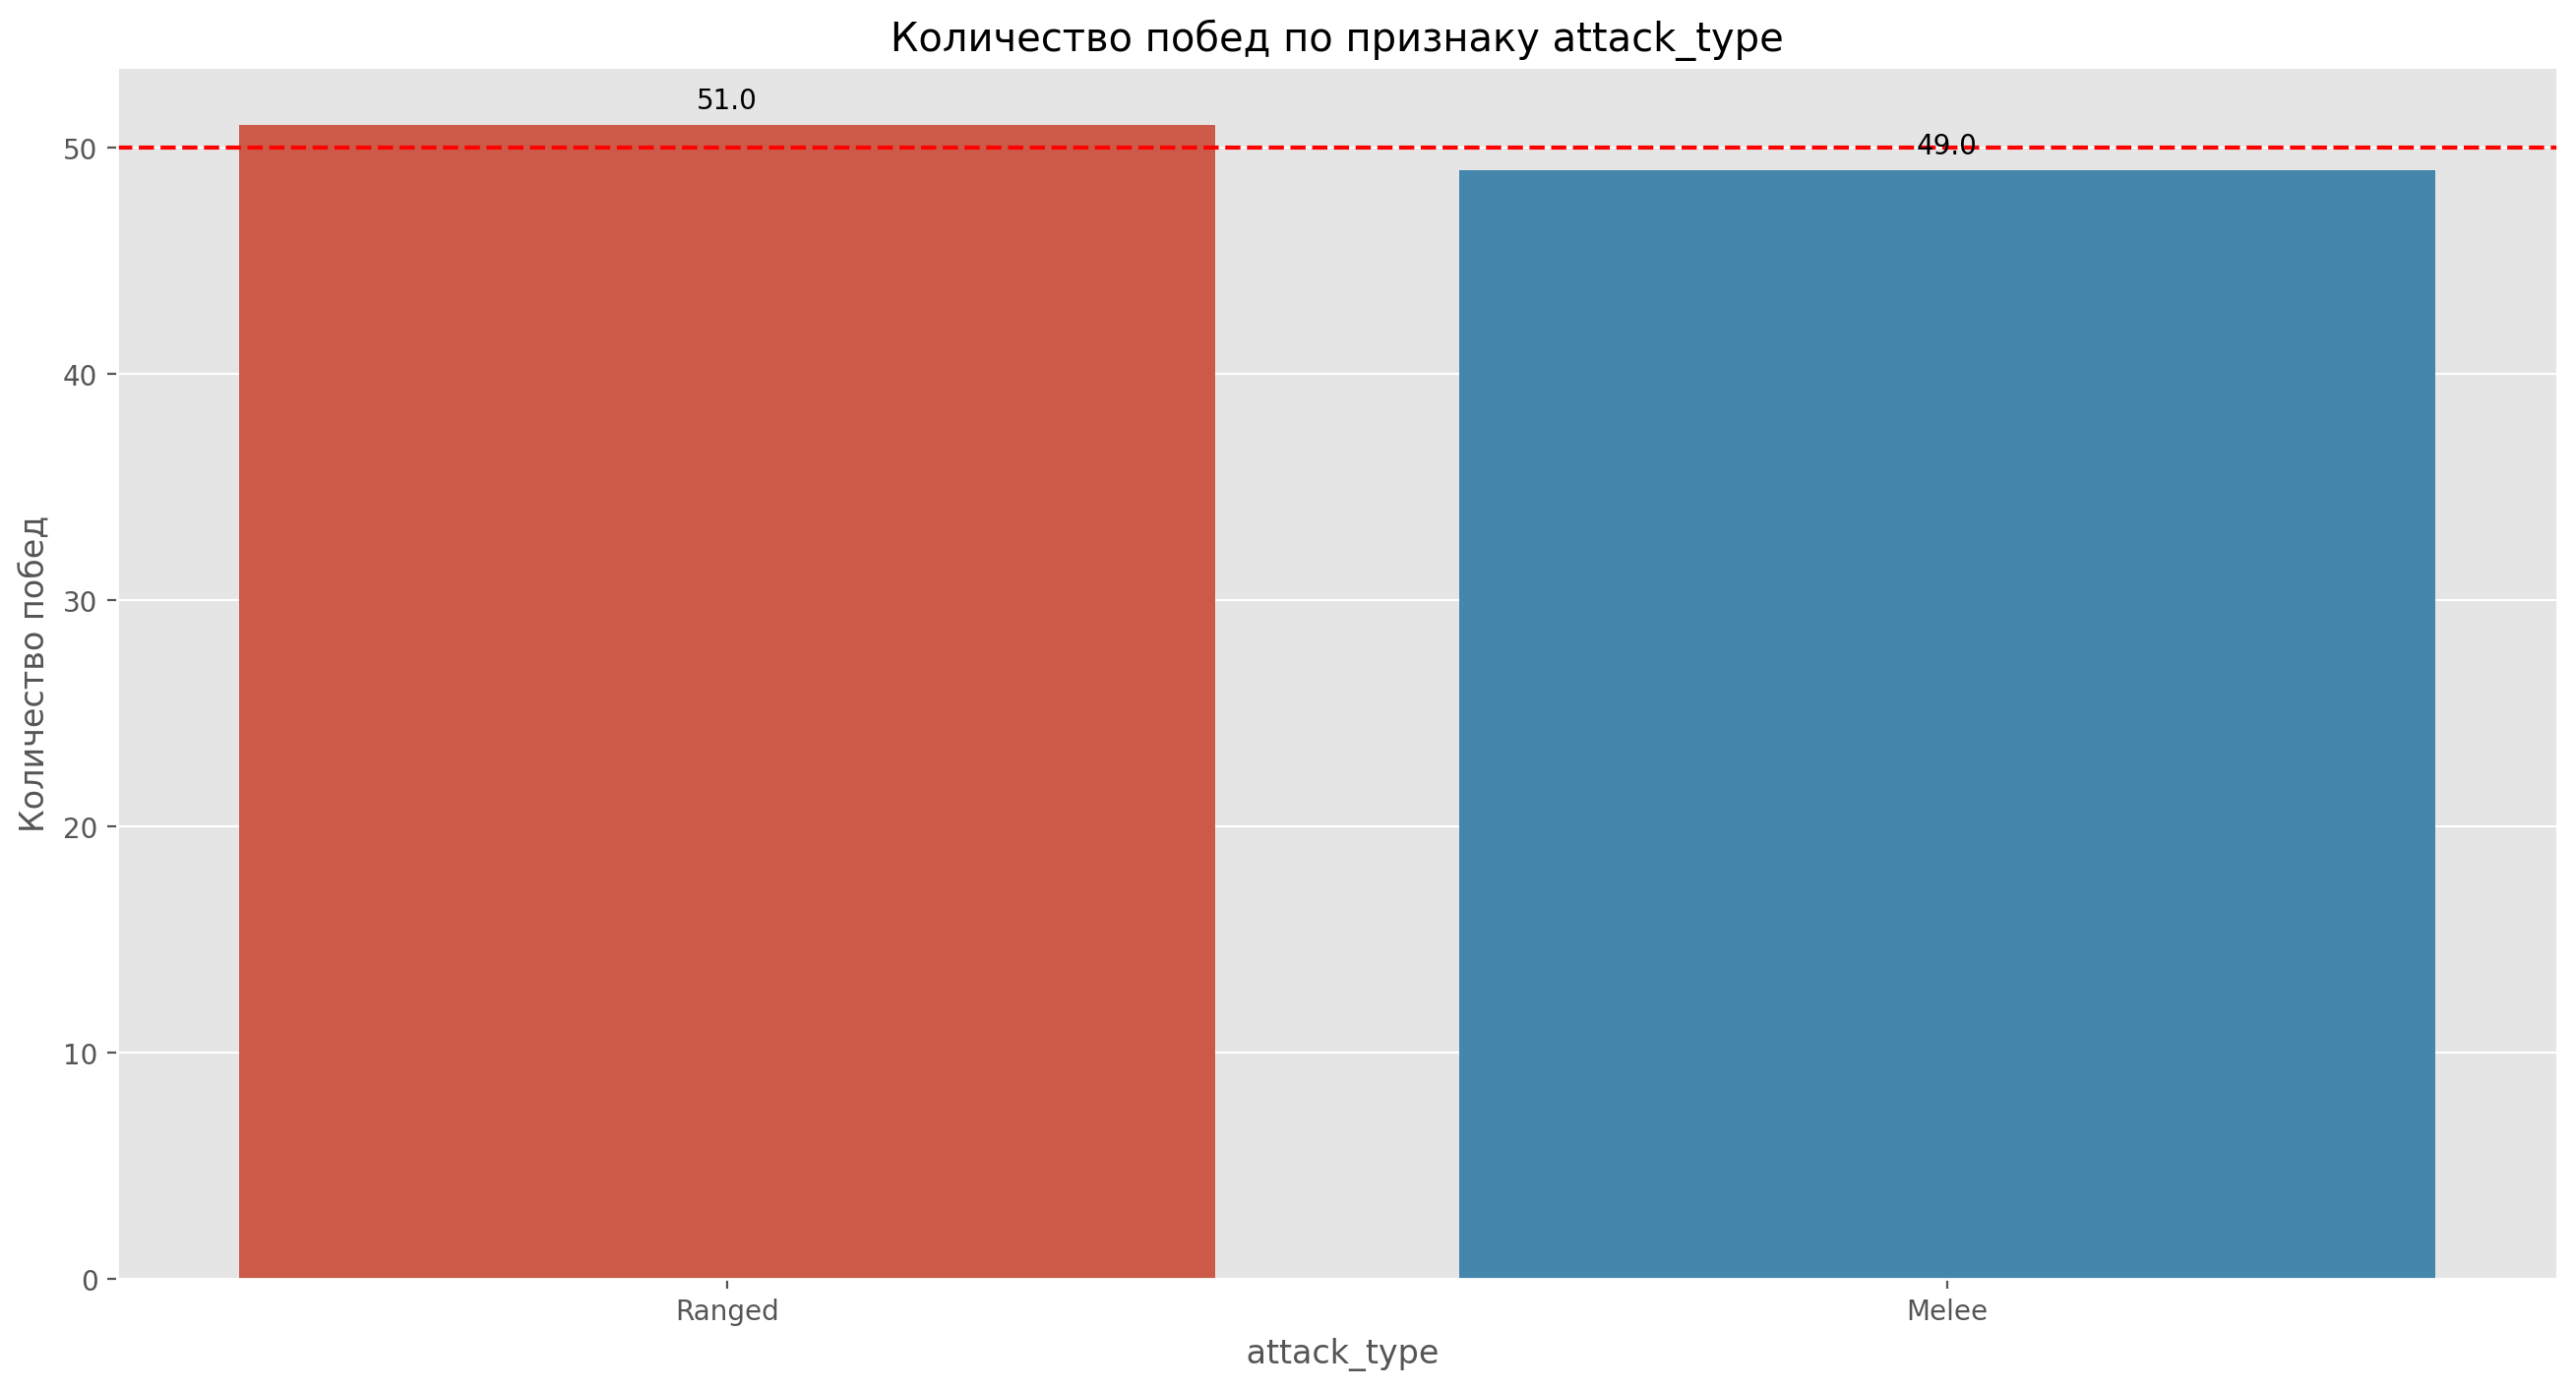

In [61]:
obraz_bi(data, 'attack_type')

In [62]:
obraz(data, 'roles')

count  \
roles                                                                     
['Support', 'Disabler', 'Nuker']                                   1031   
['Support', 'Disabler', 'Nuker', 'Initiator']                       654   
['Support', 'Nuker', 'Disabler', 'Escape']                          559   
['Carry', 'Escape']                                                 477   
['Carry', 'Nuker', 'Pusher']                                        475   
['Carry', 'Nuker', 'Disabler']                                      454   
['Carry', 'Disabler', 'Initiator', 'Durable', 'Nuker']              439   
['Carry', 'Nuker', 'Pusher', 'Initiator', 'Durable', 'Disabler']    431   
['Support', 'Nuker', 'Escape', 'Disabler']                          368   
['Support', 'Nuker', 'Disabler']                                    380   
['Carry', 'Support', 'Disabler', 'Escape', 'Nuker']                 354   
['Nuker', 'Carry']                                                  359   
['Carry', 'Nuker']                                                  334   
['Carry', 'Escape', 'Durable', 'Nuker', 'Disabler']                 307   
['Nuker', 'Durable', 'Escape']                                      323   
['Durable', 'Initiator', 'Disabler', 'Nuker', 'Escape']             279   
['Carry', 'Durable', 'Escape', 'Disabler']                          297   
['Initiator', 'Disabler', 'Durable', 'Nuker']                       270   
['Carry', 'Pusher', 'Durable', 'Disabler', 'Initiator', 'Nuker']    311   
['Support', 'Disabler', 'Initiator', 'Nuker']                       271   

                                                                    sum  \
roles                                                                     
['Support', 'Disabler', 'Nuker']                                  517.0   
['Support', 'Disabler', 'Nuker', 'Initiator']                     336.0   
['Support', 'Nuker', 'Disabler', 'Escape']                        260.0   
['Carry', 'Escape']                                               241.0   
['Carry', 'Nuker', 'Pusher']                                      234.0   
['Carry', 'Nuker', 'Disabler']                                    231.0   
['Carry', 'Disabler', 'Initiator', 'Durable', 'Nuker']            225.0   
['Carry', 'Nuker', 'Pusher', 'Initiator', 'Durable', 'Disabler']  206.0   
['Support', 'Nuker', 'Escape', 'Disabler']                        204.0   
['Support', 'Nuker', 'Disabler']                                  200.0   
['Carry', 'Support', 'Disabler', 'Escape', 'Nuker']               185.0   
['Nuker', 'Carry']                                                184.0   
['Carry', 'Nuker']                                                166.0   
['Carry', 'Escape', 'Durable', 'Nuker', 'Disabler']               159.0   
['Nuker', 'Durable', 'Escape']                                    153.0   
['Durable', 'Initiator', 'Disabler', 'Nuker', 'Escape']           148.0   
['Carry', 'Durable', 'Escape', 'Disabler']                        142.0   
['Initiator', 'Disabler', 'Durable', 'Nuker']                     140.0   
['Carry', 'Pusher', 'Durable', 'Disabler', 'Initiator', 'Nuker']  140.0   
['Support', 'Disabler', 'Initiator', 'Nuker']                     139.0   

                                                                  percent  \
roles                                                                       
['Support', 'Disabler', 'Nuker']                                     50.0   
['Support', 'Disabler', 'Nuker', 'Initiator']                        51.0   
['Support', 'Nuker', 'Disabler', 'Escape']                           47.0   
['Carry', 'Escape']                                                  51.0   
['Carry', 'Nuker', 'Pusher']                                         49.0   
['Carry', 'Nuker', 'Disabler']                                       51.0   
['Carry', 'Disabler', 'Initiator', 'Durable', 'Nuker']               51.0   
['Carry', 'Nuker', 'Pusher', 'Initiator', 'Durable', 'Disabler']     48

count     sum  percent  legs
legs                              
2     14116  6994.0     50.0     2
4      1709   919.0     54.0     4
0      1719   866.0     50.0     0
6       311   153.0     49.0     6
8        41    19.0     46.0     8

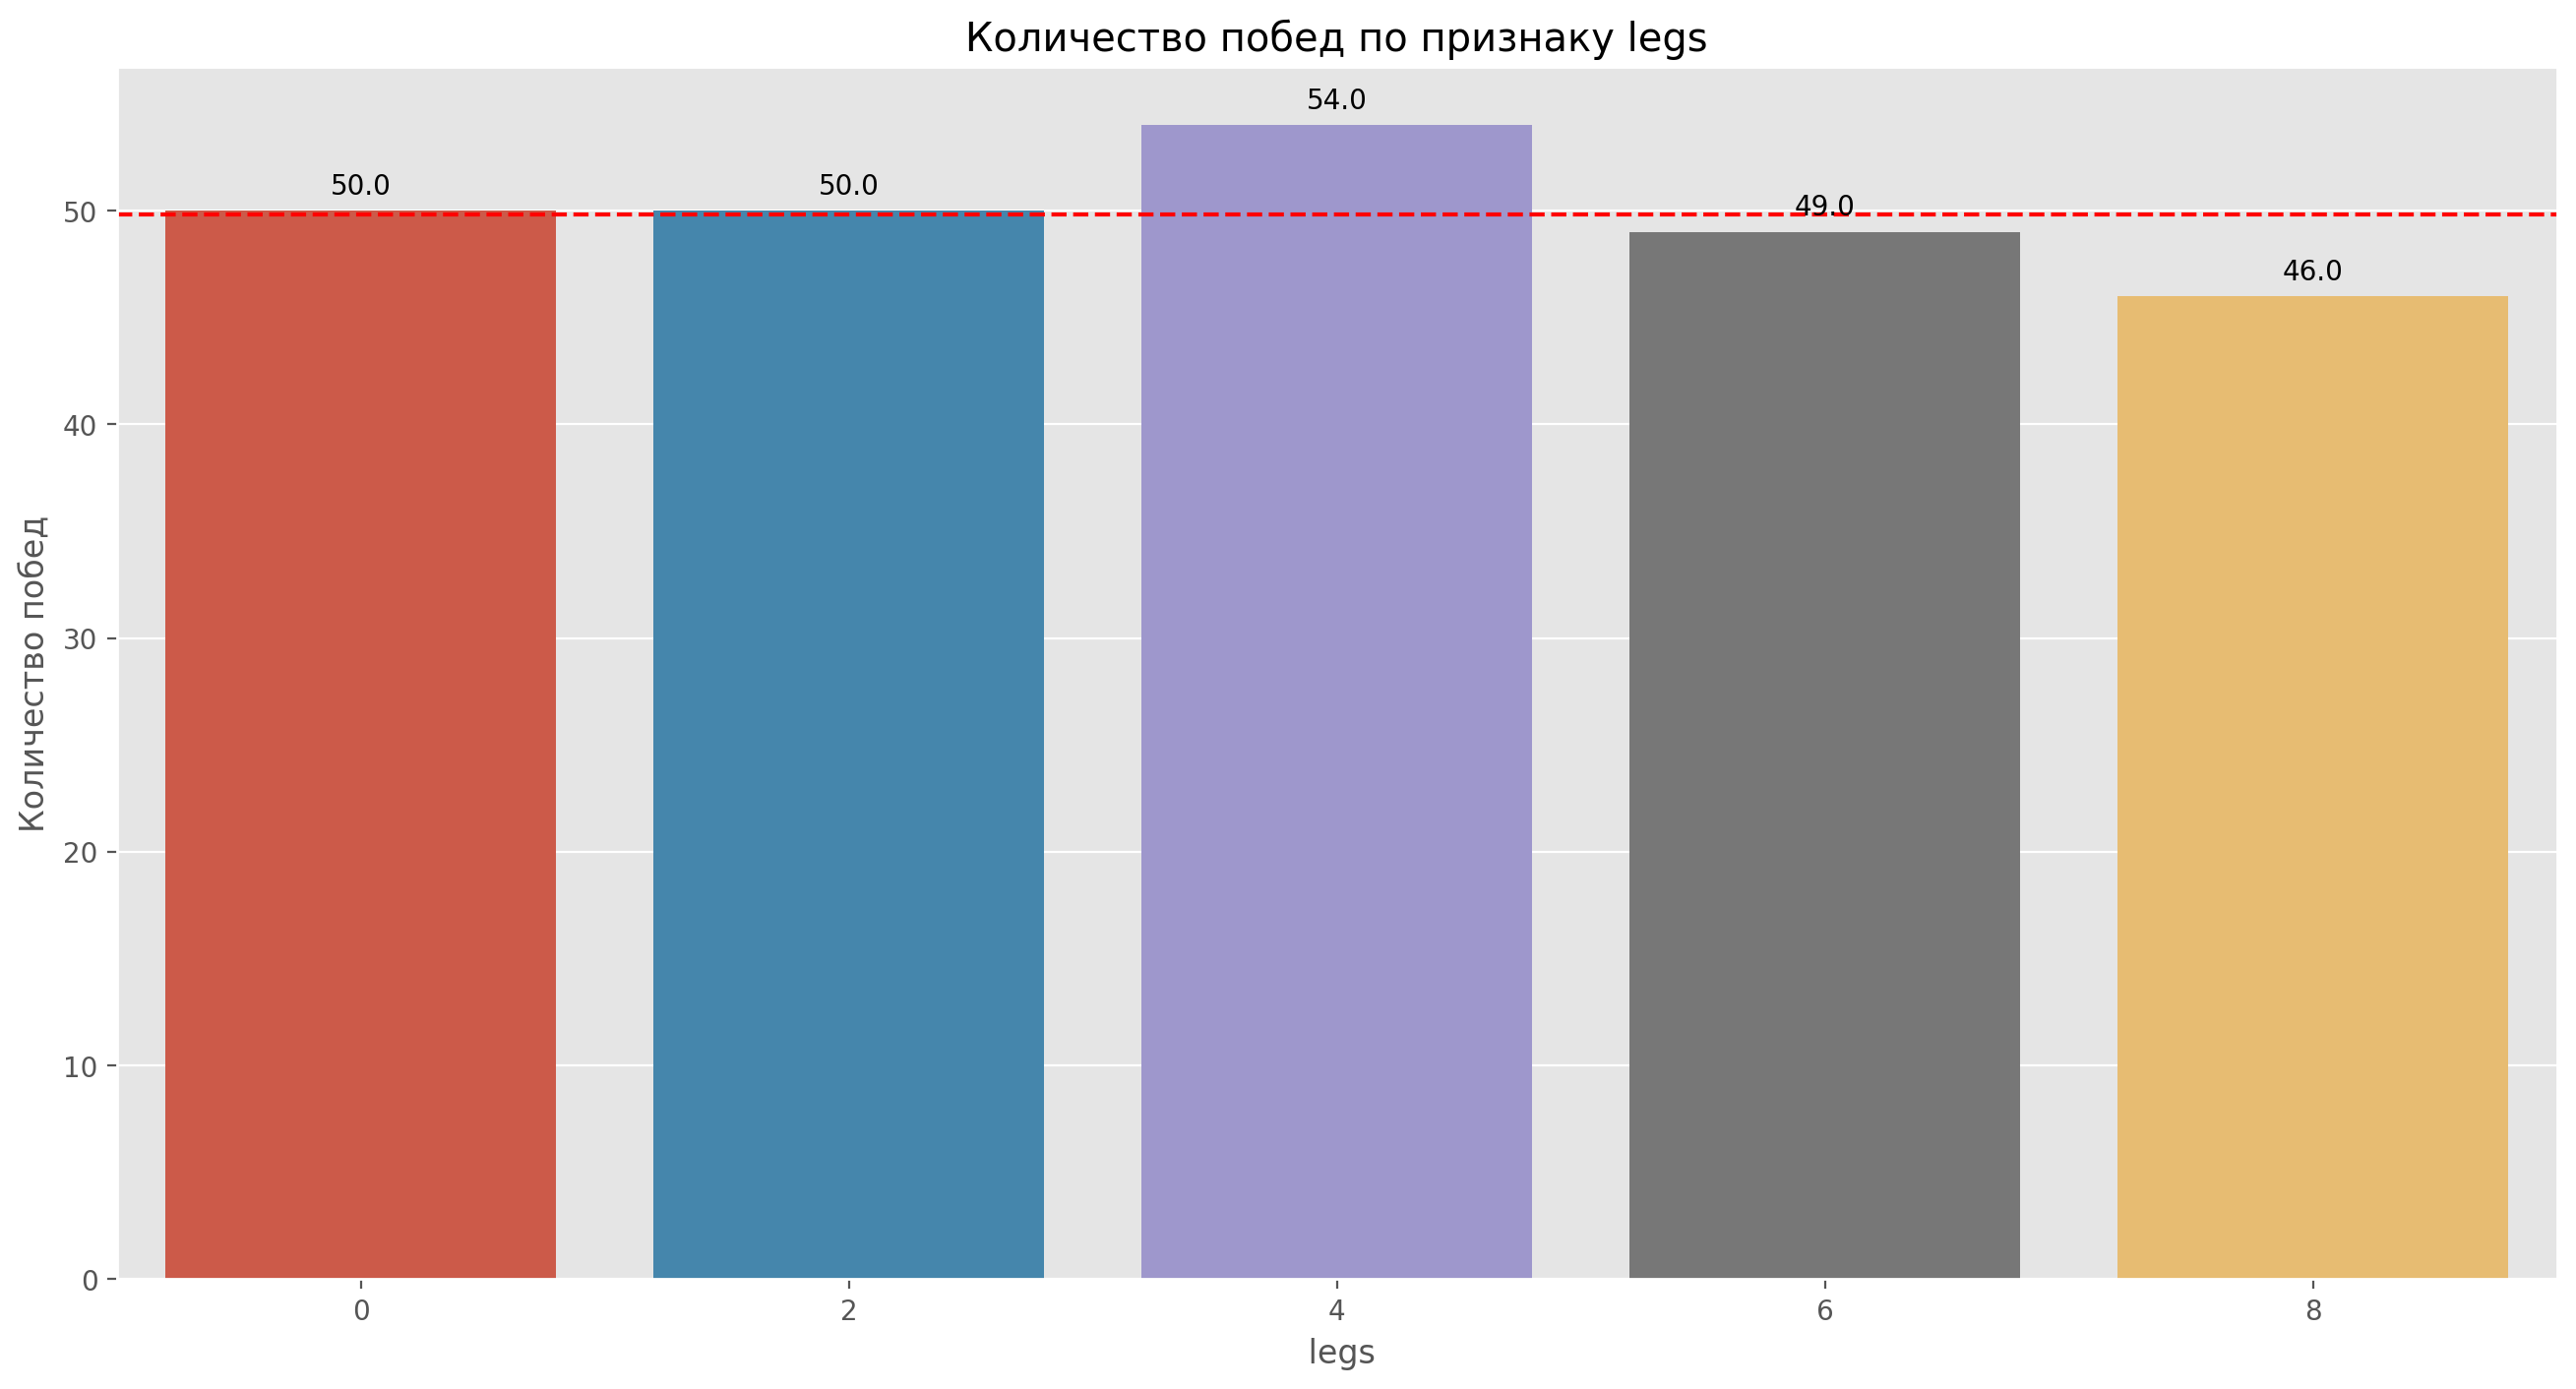

In [63]:
obraz_bi(data, 'legs')

count     sum  percent  day_vision
day_vision                                    
1800        17639  8819.0     50.0        1800
1600          203   102.0     50.0        1600
800            54    30.0     56.0         800

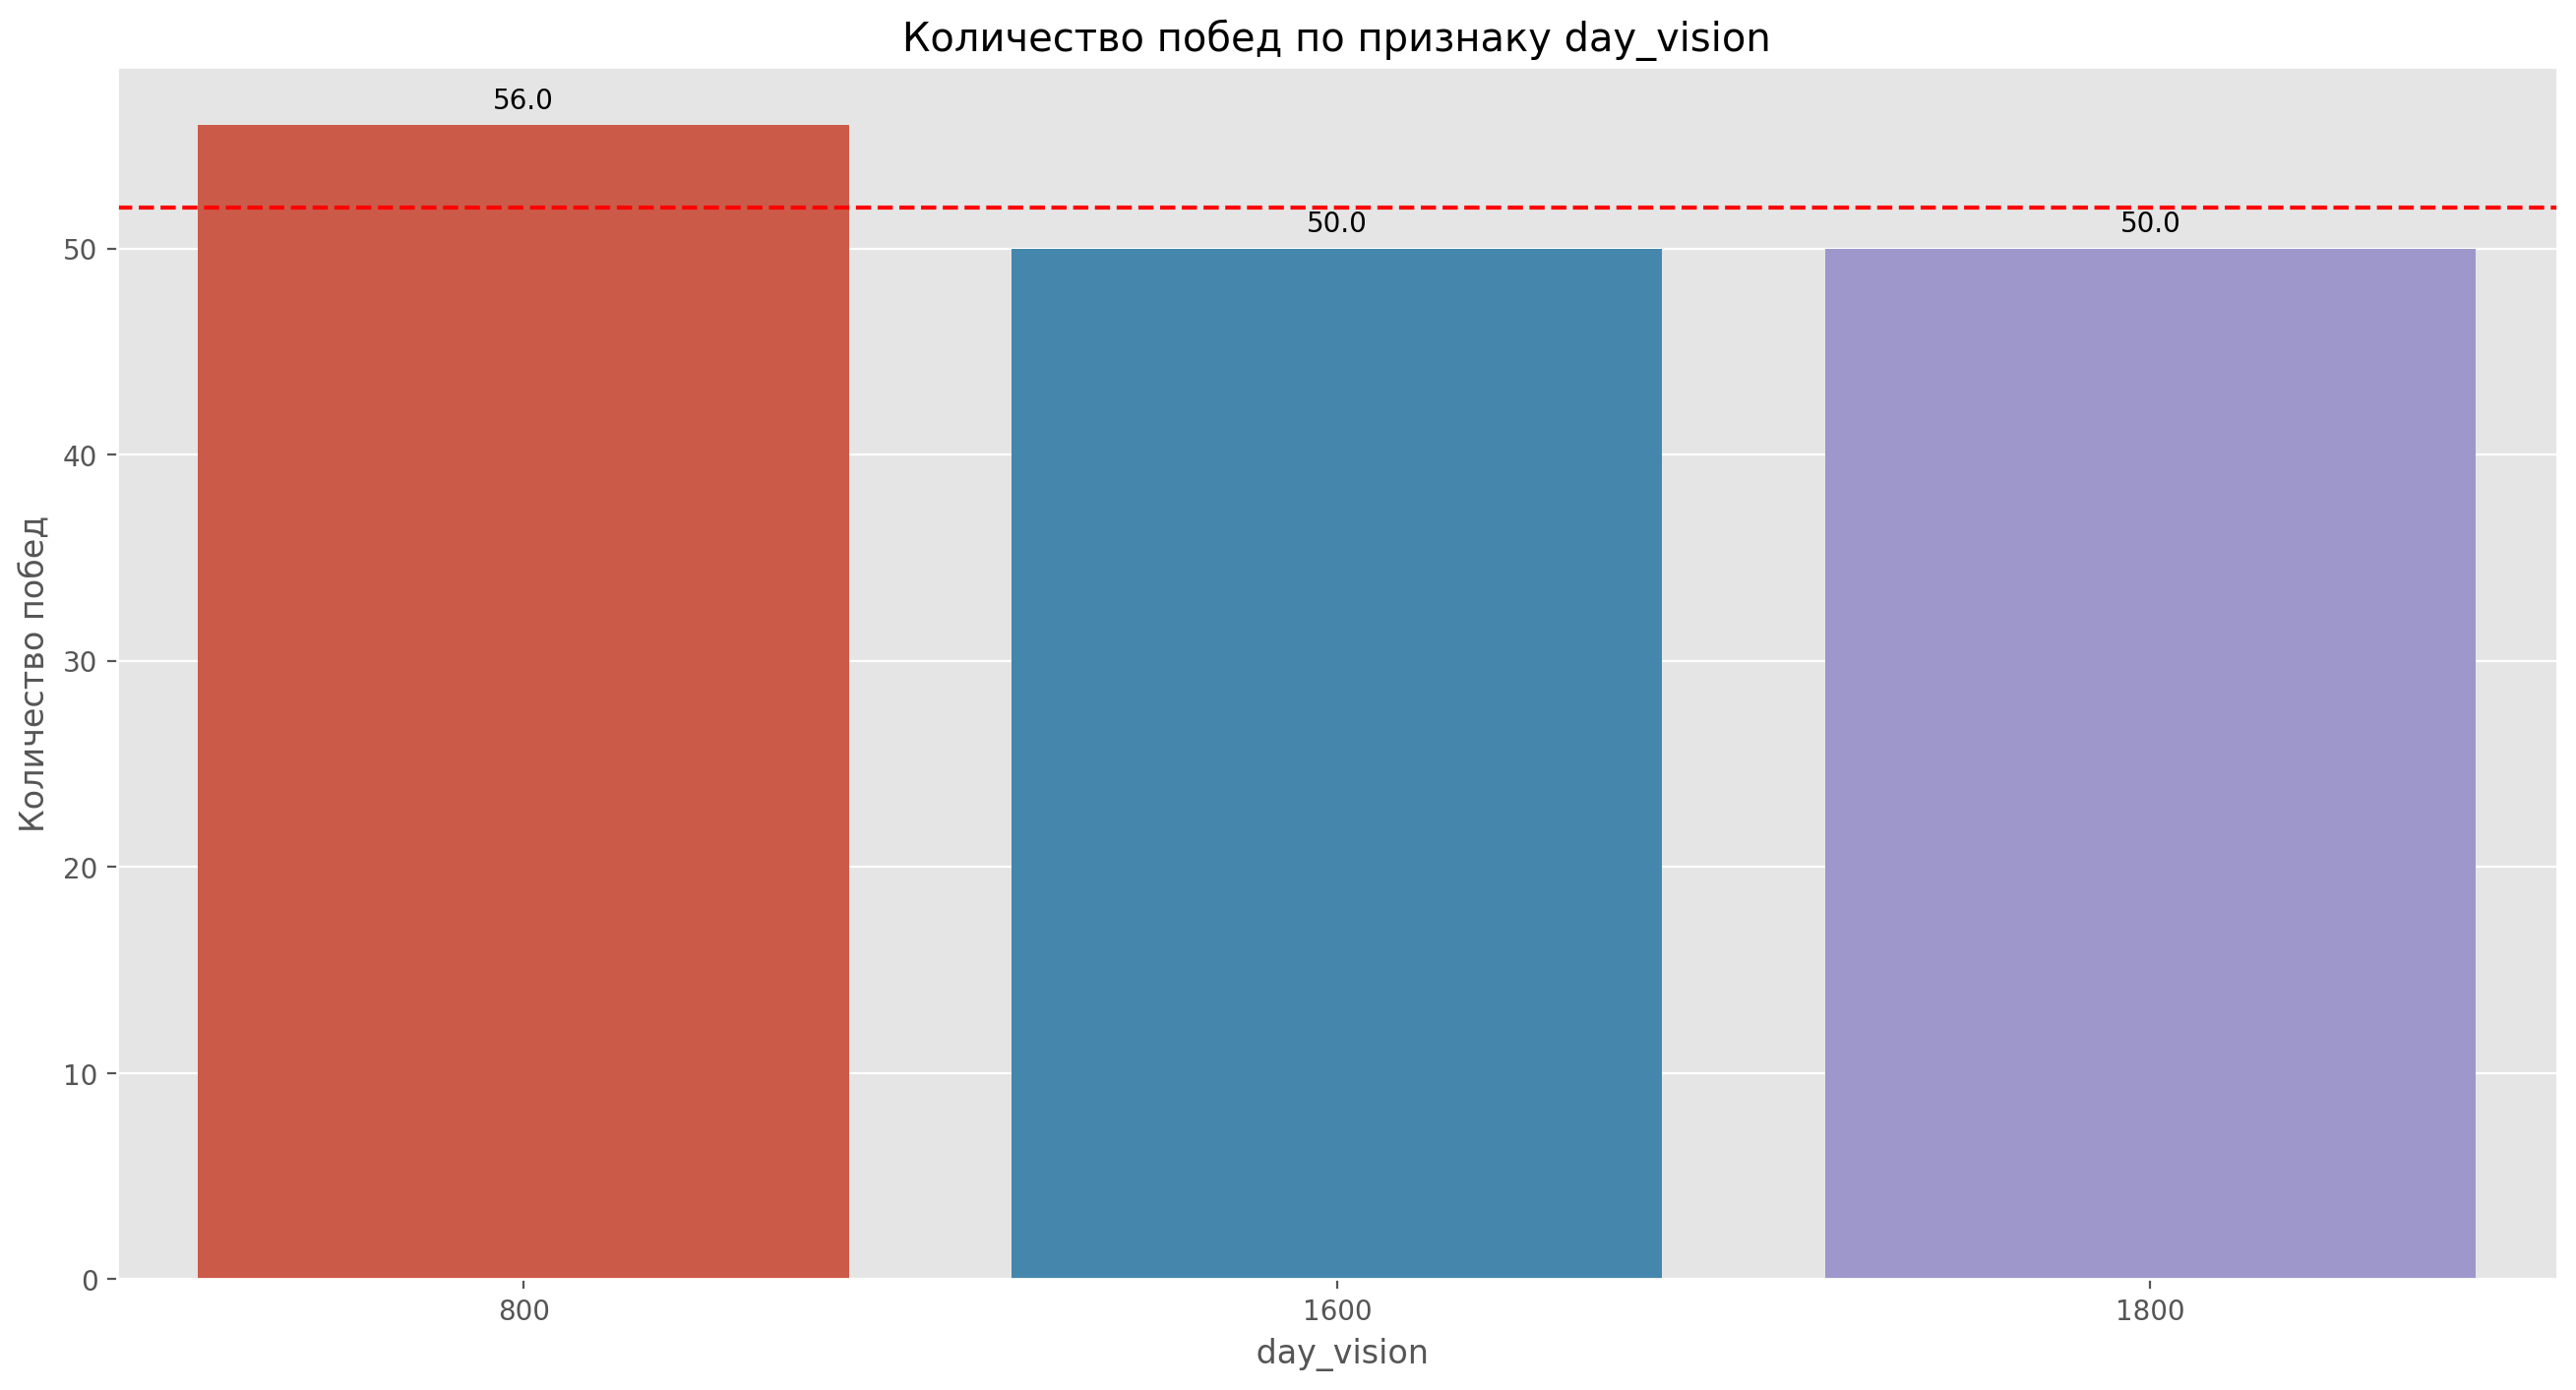

In [64]:
obraz_bi(data, 'day_vision')

count     sum  percent  night_vision
night_vision                                      
800           17300  8643.0     50.0           800
1200            218   122.0     56.0          1200
1400            166    78.0     47.0          1400
1800            145    71.0     49.0          1800
1000             67    37.0     55.0          1000

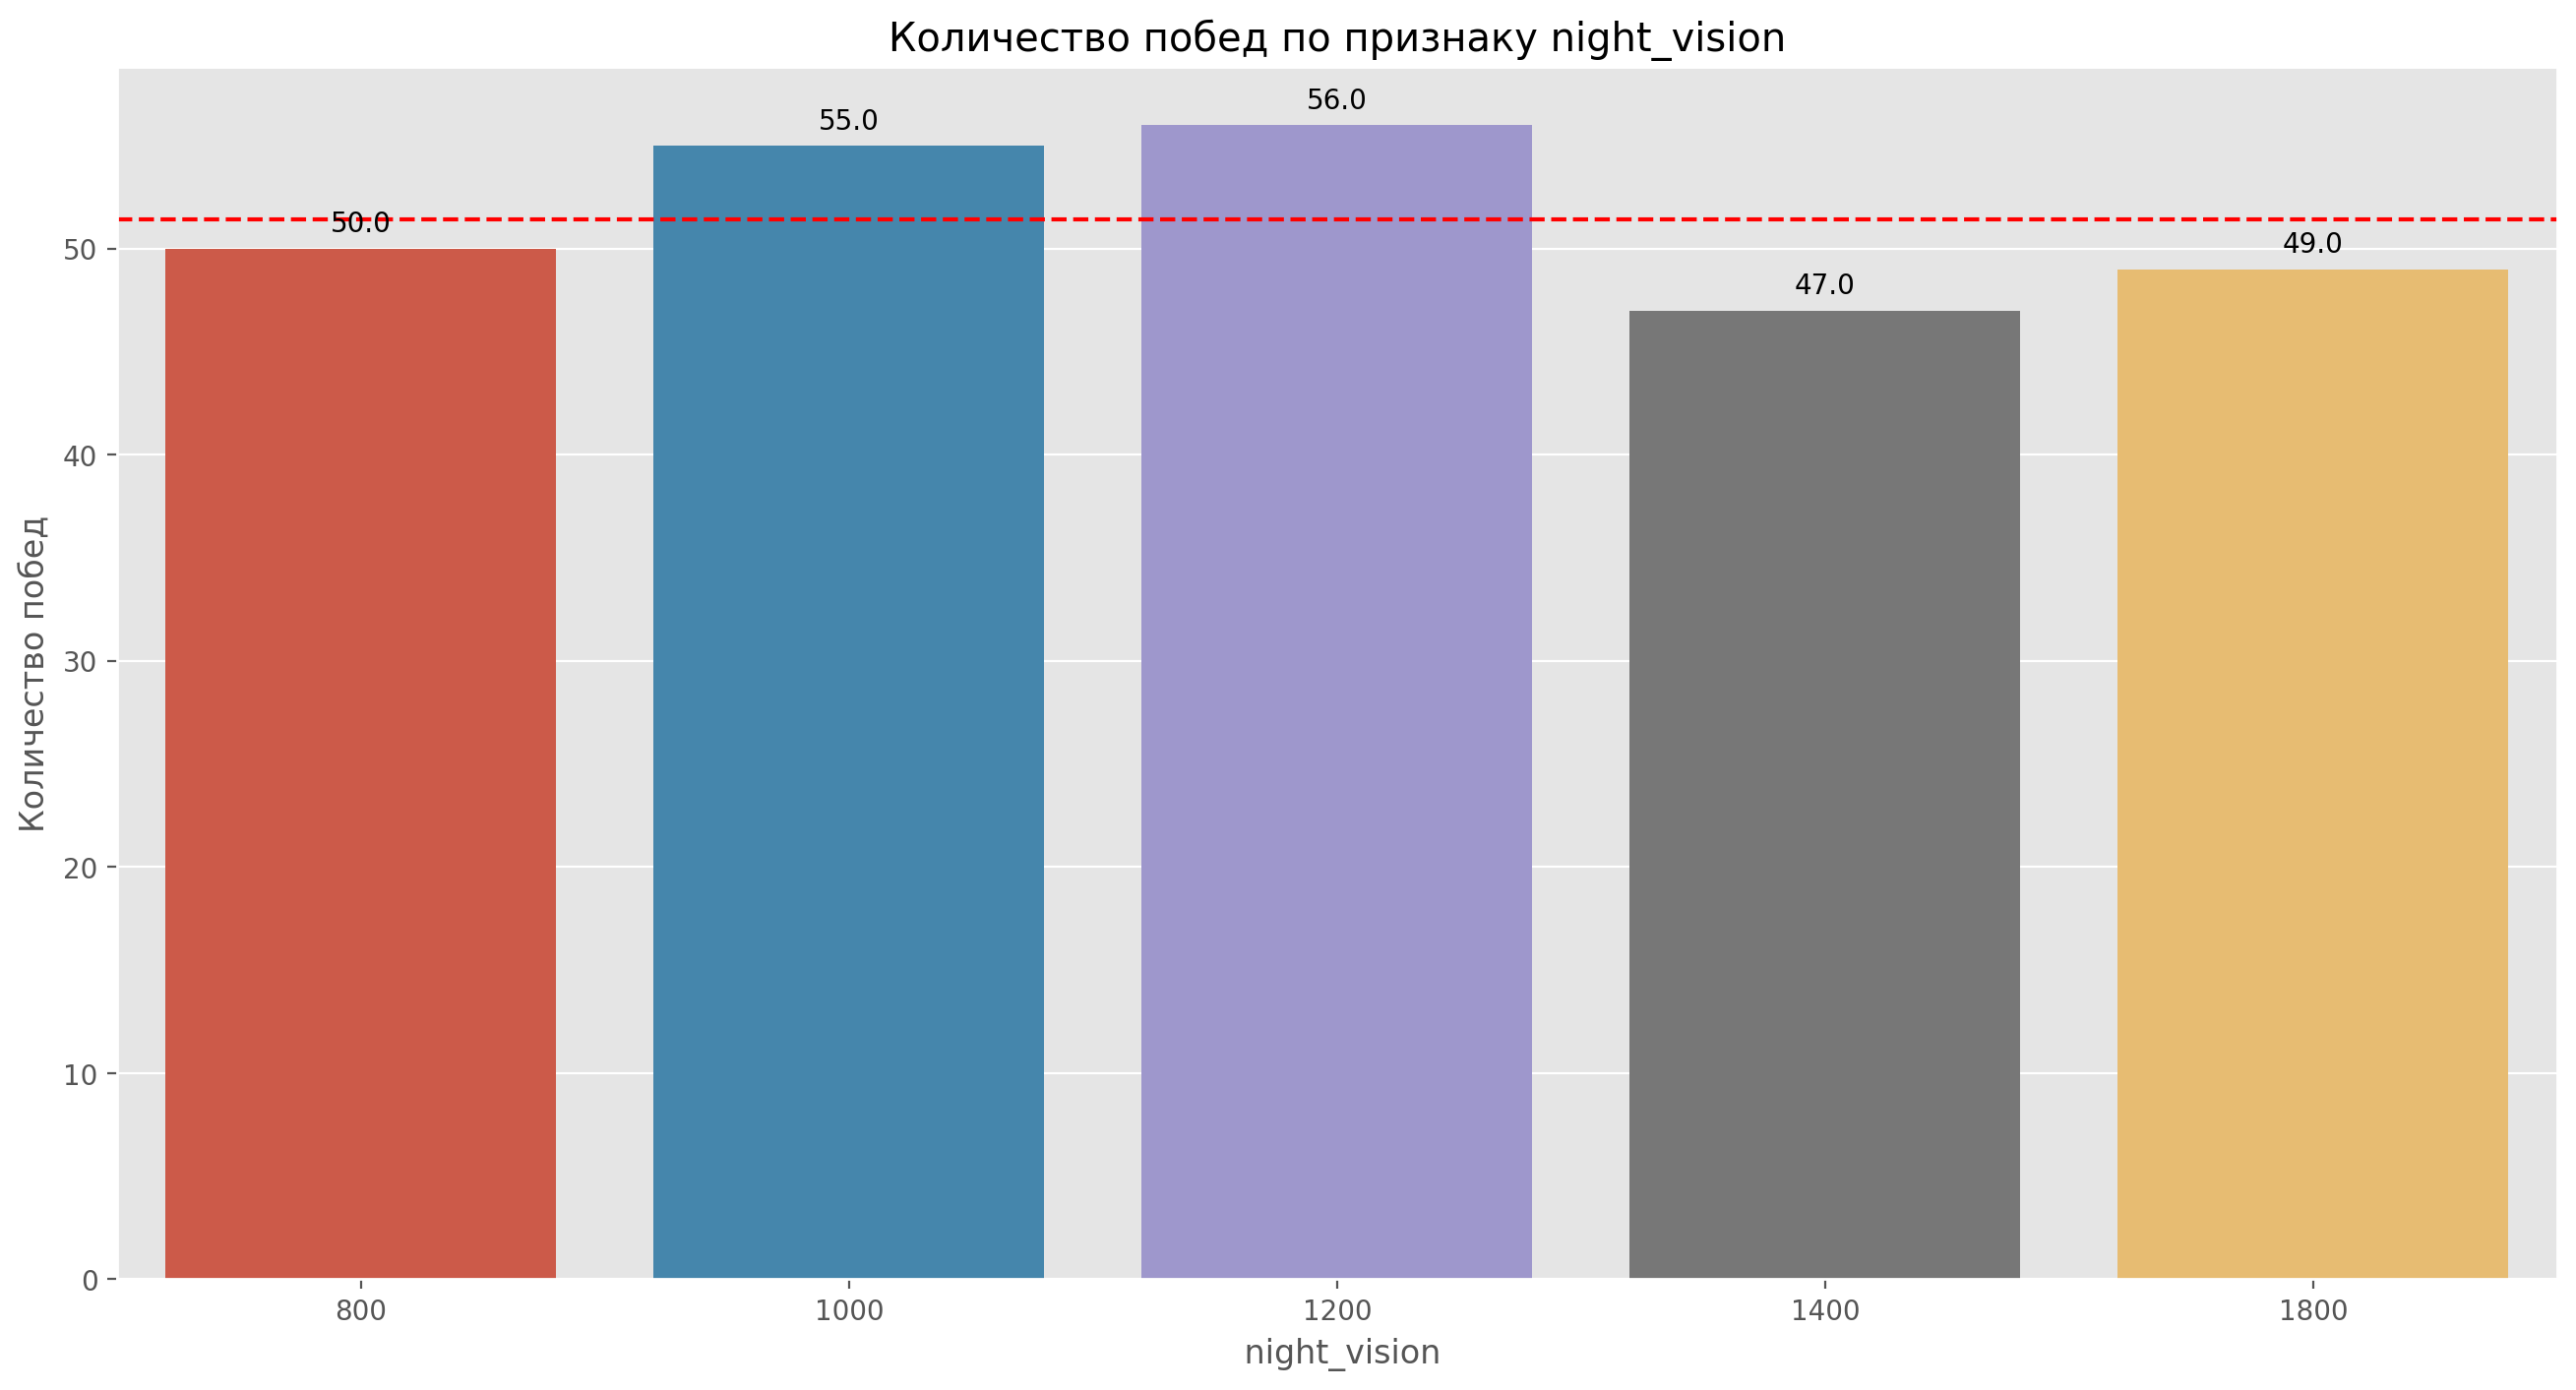

In [65]:
obraz_bi(data, 'night_vision')

**Выводы**

После изучения таблицы heroes , мы сделали следующие выводы:

По распределению признаков сложно что-то сказать, учитывая то что практически все признаки это базовые показатели. Но в то же время можно посмотреть влияние тех или иных показателей на победу или поражение игрока.

1. Больше всего побед в абсолютном выражении одержал Rubick — 246 побед, в процентном выражении - Leshrac — 54% от общего числа проведенных сессий.
2. Чаще всего используют ранжированый  тип атаки как в количественном так и в процентном выражении. Вообще большинство игроков избегают рукопашки.

3. Видим, что большинство побед одержали игроки у которых как основной атрибут героя стоит сила, далее игроки с прокачкой интеллекта, на последнем месте игроки — ловкачи.

4.Чаще всего используют роли ['Support', 'Disabler', 'Nuker'] — 1031 раз,и количество побед соответственно количество побед с этими ролями большинство — 517. В процентном выражении ['Support', 'Nuker', 'Escape', 'Disabler'] — 55%.

5. Большинство игроков предпочитают двуногих героев, всего использовали 14116 раз и одержали победу 6994 раз.

6. Большинство игроков используют радиус 1800 при дневном режиме и соответственно одержали при таком радиусе больше всего победивших

7. При ночном режиме, предпочитают радиус действия в 800 метров.

##  Проверка гипотез <a name="statanaliz"></a>

- **Проверим гипотезу отличия в параметрах игроков, которые победили  и теми, которые проиграли.**

Прежде всего разделим на две группы: на тех кто победил и тех кто проиграл.

In [66]:
df_win = players.query('win == 1')
display(df_win.head())
print('Длина датасета тех кто победил : ', len(df_win))

index    match_id  player_slot    steam_id persona_name  assists  deaths  \
0      0  7723956234            0  1533145710      Snémaât       10       3   
1      1  7723956234            1  1300455837        BeNnS        4       2   
2      2  7723956234            2   288327980       Flint-       10       8   
3      3  7723956234            3  1479402527     shogeyuu        9       3   
4      4  7723956234            4  1479790131       sonlin       12       6   

   denies  gold_per_min  hero_id  ...                 item_5 kills xp_per_min  \
0       7           615      123  ...               Mjollnir     6        696   
1       7           532       86  ...             Phylactery     9        611   
2       2           551       52  ...  Aegis of the Immortal     4        608   
3       8           383       51  ...           Arcane Boots     5        463   
4       3           336       88  ...           Unknown Item     5        417   

  is_radiant win kills_per_min  last_hits_per_min  hero_damage_per_min  \
0       True   1      0.195334           9.050461           585.545307   
1       True   1      0.293001           6.348345           622.333152   
2       True   1      0.130222           7.357569           478.567553   
3       True   1      0.162778           3.516007           313.640803   
4       True   1      0.162778           2.278893           521.345632   

   hero_healing_per_min  tower_damage_per_min  
0              0.000000            304.069452  
1              0.000000             41.280521  
2              0.000000            209.169832  
3              4.069452             45.968530  
4              0.000000             15.496473  

[5 rows x 25 columns]

Длина датасета тех кто победил :  8951


In [67]:
df_loss = players.query('win == 0')
display(df_loss.head())
print('Длина датасета тех кто проиграл: ', len(df_loss))

index    match_id  player_slot    steam_id persona_name  assists  deaths  \
5      5  7723956234          128  1651252190       LoVash        3       7   
6      6  7723956234          129  1651253581         Jeri        3       6   
7      7  7723956234          130  1651476638      Xyloria        6       6   
8      8  7723956234          131  1651174780       tomash        6       5   
9      9  7723956234          132  1651175928         bOzO        5       5   

   denies  gold_per_min  hero_id  ...              item_5 kills xp_per_min  \
5       4           431      107  ...              Bottle     3        493   
6       5           458      129  ...  Vladmir's Offering     2        539   
7       7           374       68  ...         Witch Blade     2        462   
8       3           236       79  ...           Wind Lace     3        352   
9      15           631       54  ...            Ogre Axe    10        793   

  is_radiant win kills_per_min  last_hits_per_min  hero_damage_per_min  \
5      False   0      0.097667           6.576234           349.549647   
6      False   0      0.065111           8.855128           204.253934   
7      False   0      0.065111           3.581118           241.497558   
8      False   0      0.097667           1.074335           359.186110   
9      False   0      0.325556           9.050461           539.153554   

   hero_healing_per_min  tower_damage_per_min  
5               0.00000              0.000000  
6               1.56267              0.748779  
7               0.00000              4.850787  
8               0.00000              0.000000  
9               0.00000             83.147043  

[5 rows x 25 columns]

Длина датасета тех кто проиграл:  8945


Прежде чем перейти к проверке гипотез нужно определится с методом. 

Мы видим что наши данные в двух группах различаются по количеству строк. В певой таблице их 8951, во второй - 8945. При этом оба набора достаточно велики. 

Критерии когда мы не можем использовать t-test.

1. t-тест предполагает, что дисперсии двух групп равны. 
2. t-тест требует, чтобы оба набора данных были достаточно велики (обычно n > 30). 
3. t-тест предполагает, что данные в каждой группе следуют нормальному распределению. 


Так же стоит отметить что чем больше набор данных тем ближе он к нормальному распределению. А вот по первому пункуту мы не знаем равны ли дисперсии выборок, поэтому при использовании t-теста зададим параметр equal_var=False. Таким образом ограничений по использованию t-теста нет.

 **Наши гипотезы:**

- H0: параметры игроков (убийства), что победили и что проиграли одинаковые.
- H1: параметры игроков (убийства), что победили и что проиграли разные.

alpha = 0.05

In [68]:
df_win.columns

Index(['index', 'match_id', 'player_slot', 'steam_id', 'persona_name',
       'assists', 'deaths', 'denies', 'gold_per_min', 'hero_id', 'item_0',
       'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'kills', 'xp_per_min',
       'is_radiant', 'win', 'kills_per_min', 'last_hits_per_min',
       'hero_damage_per_min', 'hero_healing_per_min', 'tower_damage_per_min'],
      dtype='object')

In [74]:
alpha = 0.05
win = df_win['kills']
loss = df_loss['kills']
# Проводим ttest для двух выборок

results = st.ttest_ind(win,loss,equal_var=False)

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


**Гипотезы:**

- H0: параметры игроков (Средний урон героя в минуту матча), что победили и что проиграли одинаковые.
- H1: параметры игроков (Средний урон героя в минуту матча), что победили и что проиграли разные.

In [75]:
alpha = 0.05

# Проводим ttest для двух выборок

results = st.ttest_ind(df_win['hero_damage_per_min'],
                       df_loss['hero_damage_per_min'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 4.511589731527999e-182
Отвергаем нулевую гипотезу


**Гипотезы:**

- H0: параметры игроков (Количество убитых союзных мобов), что победили и что проиграли одинаковые.
- H1: параметры игроков (Количество убитых союзных мобов), что победили и что проиграли разные.

In [76]:
alpha = 0.05

# Проводим ttest для двух выборок

results = st.ttest_ind(df_win['denies'],
                       df_loss['denies'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0450227748130898e-13
Отвергаем нулевую гипотезу


**Гипотезы:**

- H0: параметры игроков (Количество золота, которое игрок получает за минуту в матче), что победили и что проиграли одинаковые.
- H1: параметры игроков (Количество золота, которое игрок получает за минуту в матче), что победили и что проиграли разные.

In [78]:
alpha = 0.05

# Проводим ttest для двух выборок

results = st.ttest_ind(df_win['gold_per_min'],
                       df_loss['gold_per_min'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


**Гипотезы:**

- H0: параметры игроков (Среднее лечение героя в минуту матча), что победили и что проиграли одинаковые.
- H1: параметры игроков (Среднее лечение героя в минуту матча), что победили и что проиграли разные.

In [79]:
alpha = 0.05

# Проводим ttest для двух выборок

results = st.ttest_ind(df_win['hero_healing_per_min'],
                       df_loss['hero_healing_per_min'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.2092532392088927e-34
Отвергаем нулевую гипотезу


##  ОБЩИЕ ВЫВОДЫ <a name="resumefinal"></a>


Нам было предоставлены 3 таблицы:
- Информация об игроках  - players
- Информация о матчах — matches
-Информация о героях heroes 

После загрузки таблицы players получили следующие данные:
- Размер: (18020, 25)
- Количество дубликатов: 0
- Количество пропусков: personaname - 124

После загрузки таблицы matches получили следующие данные:
- Размер: (1802, 6)
- Количество дубликатов: 0
- Количество пропусков: 0

После загрузки таблицы heroes получили следующие данные:
- Размер: (18020, 6)
- Количество дубликатов: 0
- Количество пропусков: turn_rate - 11375


**Провели предобработку во всех 3 таблицах**. Данные были предоставлены в хорошем качестве. Удалили пропуски в  personaname из таблицы  players а также привели название столбцов к PEP8


Далее построили гистаграммы в разрезе побед и поражений и боксплоты для анализа числовых признаков. У каждого из признака есть выбросы, но они не критичны и вполне объясняемы спецификой данных. Также:

- Количество ассистов в матче — видим, что в среднем за матч игрок проводит 11.97 ассистов, с минимум близком к нулю и максимум 48. Игроки которые проводят менее 10 ассистов чаще всего проигрывают, .
- Количество смертей в матче -  в  среднем за матч игрок умирают 6 раз, с минимум близком к нулю и максимум 22. Игроки которые умирают менее 4 раз чаще всего выигрываю.
- Количество убитых союзных мобов - в среднем за матч игрок убивает приблизительно 6 союзных мобов, с минимум близком к нулю и максимум 54. Побеждают игроки которые убивают больше 10 союзных мобов.
- Количество золота - в среднем за минуту игрок получает 493.78
 золота, с минимум в 110 ед. и максимум 1151 ед. Побеждают игроки зарабатывающие от 300 до 400 ед. и свыше 600 ед.
- Количество убийств в матче - в среднем за матч игрок совершает приблизительно 6 убийств, с минимум близком к нулю и максимум 34 убийств. Побеждают игроки которые совершают больше 5 убийств.
- Количество опыта за минуту в матче - в среднем за минуту в матче игрок получает приблизительно 641.06 ед. опыта, с минимум близком 84 ед. и максимум 1782.00. Побеждают игроки которые получают больше 600 ед. опыта.
- Количество убийств за минуту матча - в среднем за минуту игрок совершает приблизительно  0.18 убийств, с минимум близком к нулю и максимум 1.34
 убийств. Побеждают игроки которые совершают больше 0.1 убийств.
- Количество последних ударов по мобам за минуту - в среднем за минуту совершается приблизительно  5.41 последних ударов, с минимум близком к нулю и максимум 22.08 ударов. Побеждают игроки которые совершают больше 6 ударов.
- Средний урон героя в минуту матча - в среднем за минуту игрок наносит 565.52 урона, с минимум в 25.46 ед. и максимум 2397.97 ед. Побеждают игроки которые наносят свыше 600 ед.
- Среднее лечение героя в минуту матча -  в среднем за минуту игрок лечится 25.31 раз, с минимум около нуля и максимум 1427.11 раз. Побеждают игроки которые лечатся свыше 100.
- Количество урона башен в минуту матча - в среднем за минуту башни наносят 72.37 ед., с минимум около нуля и максимум 932.78
ед. Побеждают игроки башни которых наносят свыше 50 ед.
- Длительность матча в секундах - в среднем матч длится около 2013 секунд, с минимум 439 и максимум 4730 секунд. Чаще всего побеждают игроки которые играют от 1200 до 1800 секунд.
- Время до первого убийства - в среднем проходит около 126 секунд до первого убийства, с минимум около 0 и максимум 703 секунды. Чаще всего проигравшие игроки первое убийство проводят вблизи минимума и судя по всему не всегда врага. Игроки одержавщие победу совершают первое убийство, чаще всего, в пределах 80-140 секунд.


Провели анализ категориальных признаков в разрезе побед/поражений. И получили следующие результаты:
1. По признаку 'persona_name':
- больше всего побед в числовом выражении у игрока «if you not rank100dont talkto me» - 119 побед, в процентном соотношении — 74%; на втором месте «Enma» - 94 побед и 72%;
на третьем «satori» -  тоже 94 побед с процентом повыше — 75%.

2. По признаку 'item_1':
- Чаще всего, как первый предмет экипировки,  игроки одержавшие большие число побед использовали
Blink Dagger — 684 побед с 49 % побед. Есть предметы которые дают процент побед выше, но их использовали 1-2 раза, и этот показатель не информативен; 
- далее предмет Magic Wand — 600 побед с 45%;
- на третьем месте Power Treads -481 победа с 52%.

3. По признаку 'item_2':
- Чаще всего, как второй предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 820 побед с 47 % побед. 
- на втором предмет Blink Dagger  — 717 побед с 51%.
- предмет Black King Bar  -526 победа с 53%.

4. По признаку 'item_3':
- Чаще всего, как третий предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 571 победа с 48 % побед. 
- на втором предмет Power Treads — 523 побед с 45 %.
- на третьем месте  предмет Blink Dagger  -498 победа с 55 %.

5. По признаку 'item_4':
- Чаще всего, как четвертый предмет экипировки,  игроки одержавшие большие число побед использовали
Magic Wand — 640 победа с 48 % побед. 
- на втором  предмет Unknown Item  — 566 побед с 45 %.
- на третьем месте  предмет Aghanim's Scepter  -421 победа с 57 %.

6. По признаку 'item_5':
- Чаще всего, как пятый предмет экипировки,  игроки одержавшие большие число побед использовали
Unknown Item — 834 победа с 46 % побед. 
- на втором предмет Magic Wand   — 566 побед с 49 %.
- на третьем месте  предмет Aghanim's Scepter  -477 победа с 61 %.

7. По признаку 'is_radiant':
- Светлая фракция — использовали - 8952 раз, одержала 4541 побед, в процентном выражении — 51%.
- Тёмная фракция — использовали - 8944 раз, одержала 4410 побед, в процентном выражении — 49%.

8. По признаку 'radiant_win':
- Колтичество побед составляет 50%.

Анализируя эти показатели можем сделать вывод о предпочтении игроков предмета Magic Wand , который используют во всех позициях и везде он входит в топ 3, а также о преференции игроков светлой фракции.

**После изучения таблицы heroes** , мы сделали следующие выводы:

По распределению признаков сложно что-то сказать, учитывая то что практически все признаки это базовые показатели. Но в то же время можно посмотреть влияние тех или иных показателей на победу или поражение игрока.

1. Больше всего побед в абсолютном выражении одержал Rubick — 246 побед, в процентном выражении - Leshrac — 54% от общего числа проведенных сессий.
2. Чаще всего используют ранжированый  тип атаки как в количественном так и в процентном выражении. Вообще большинство игроков избегают рукопашки.

3. Видим, что большинство побед одержали игроки у которых как основной атрибут героя стоит сила, далее игроки с прокачкой интеллекта, на последнем месте игроки — ловкачи.

4.Чаще всего используют роли ['Support', 'Disabler', 'Nuker'] — 1031 раз,и количество побед соответственно количество побед с этими ролями большинство — 517. В процентном выражении ['Support', 'Nuker', 'Escape', 'Disabler'] — 55%.

5. Большинство игроков предпочитают двуногих героев, всего использовали 14116 раз и одержали победу 6994 раз.

6. Большинство игроков используют радиус 1800 при дневном режиме и соответственно одержали при таком радиусе больше всего победивших

7. При ночном режиме, предпочитают радиус действия в 800 метров.


**Проверили гипотезу отличия в параметрах игроков, которые победили  и теми, которые проиграли.**

Прежде всего разделили на две группы: на тех кто победил и тех кто проиграл.

 **Наши гипотезы:**
1.
- H0: параметры игроков (убийства), что победили и что проиграли одинаковые.
- H1: параметры игроков (убийства), что победили и что проиграли разные.

2.
- H0: параметры игроков (Средний урон героя в минуту матча), что победили и что проиграли одинаковые.
- H1: параметры игроков (Средний урон героя в минуту матча), что победили и что проиграли разные.

3.
- H0: параметры игроков (Количество убитых союзных мобов), что победили и что проиграли одинаковые.
- H1: параметры игроков (Количество убитых союзных мобов), что победили и что проиграли разные.

4.
- H0: параметры игроков (Количество золота, которое игрок получает за минуту в матче), что победили и что проиграли одинаковые.
- H1: параметры игроков (Количество золота, которое игрок получает за минуту в матче), что победили и что проиграли разные.

5.
**Гипотезы:**

- H0: параметры игроков (Среднее лечение героя в минуту матча), что победили и что проиграли одинаковые .
- H1: параметры игроков (Среднее лечение героя в минуту матча), что победили и что проиграли разные.

Во всех случаях мы отвергли нулевую гипотезу.

 P/S  Найти лучшего игрока в процентном соотношении не считаю целесобразным, поскольку считаю что эта информация не будет отображать действительность. Есть Игроки которые провели 10 игр и одержали 9 побед, процент побед высок и составляет 90%, но его сложно сравнивать с игроком , который провел 1500 и одержал 1000 побед. 